In [1]:
import os
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly 
import plotly.plotly as py
import plotly.graph_objs as go
from IPython.display import HTML
plotly.tools.set_credentials_file(username='analiselp', api_key='udECHGkQwiOSw4pNPsCh')

In [2]:
sns.set()
america_colors = ["#eeef09", "#1f77b4", "#0d560d", "#3a3838"]
europe_ns_colors = ["#0c3ec9", "#b5070a", "#ff7f0e", "#b70b82"]
europe_we_colors = ["#8c8c8c", "#4c2503", "#e377c2", "#112049"]
age_colors = ["#1f77b4", "#9467bd", "#03c403", "#e377c2", "#4c2503", "#3a3838"]
aao_colors = ["#a0a00c", "#9467bd", "#6008af", "#03c403"]
south_america_colors = ["#eeef09", "#1f77b4"]
central_america_colors = ["#0d560d"]
north_america_colors = ["#3a3838"]
eastern_europe_colors = ["#e377c2", "#112049"]
northern_europe_colors = ["#ff7f0e", "#b70b82"]
southern_europe_colors = ["#0c3ec9", "#b5070a"]
western_europe_colors = ["#8c8c8c", "#4c2503"]
asia_colors = ["#9467bd", "#6008af"]
africa_colors = ["#03c403"]
oceania_colors = ["#a0a00c"]
male_female_colors = ["#d62728", "#2ca02c"]

In [3]:
#Para manter a ordem das cores:

"""
Australia = "#a0a00c" = Mostarda
Brazil = "#eeef09" = Amarelo
Chile = "#1f77b4" = Azul Claro
Germany = "#8c8c8c" = Cinza
Israel = "#9467bd" = Lilás
Italy = "#0c3ec9" = Azul
Japan = "#6008af" = Roxo
Mexico = "#0d560d" = Verde
Netherlands = "#4c2503" = Marrom
Poland = "#e377c2" = Rosa
Russia = "#112049" = Azul Marinho
South Africa = "#03c403" = Verde Claro
Spain = "#b5070a" = Vermelho
Sweden = "#ff7f0e" = Laranja
United Kingdom = "#b70b82" = Rosa Choque
United States = "#3a3838" = Cinza Escuro
"""

'\nAustralia = "#a0a00c" = Mostarda\nBrazil = "#eeef09" = Amarelo\nChile = "#1f77b4" = Azul Claro\nGermany = "#8c8c8c" = Cinza\nIsrael = "#9467bd" = Lilás\nItaly = "#0c3ec9" = Azul\nJapan = "#6008af" = Roxo\nMexico = "#0d560d" = Verde\nNetherlands = "#4c2503" = Marrom\nPoland = "#e377c2" = Rosa\nRussia = "#112049" = Azul Marinho\nSouth Africa = "#03c403" = Verde Claro\nSpain = "#b5070a" = Vermelho\nSweden = "#ff7f0e" = Laranja\nUnited Kingdom = "#b70b82" = Rosa Choque\nUnited States = "#3a3838" = Cinza Escuro\n'

In [4]:
suicide_csv = "../csvs/suicide.csv"
hdi_csv = "../csvs/hdi.csv"
country_continent_csv = "../csvs/countryContinent.csv"
total_population_csv = "../csvs/totalPopulationCountries.csv"
total_populationF_csv = "../csvs/totalPopulationF.csv"
total_populationM_csv = "../csvs/totalPopulationM.csv"
gender_inequality_csv = "../csvs/genderInequality.csv"
users_internet_csv = "../csvs/totalUsersInternet.csv"
employmentto_population_csv = "../csvs/employmenttoPopulationRatio(%ages15andOlder).csv"

In [5]:
#Lendo csv.
suicide_df = pd.read_csv(suicide_csv, sep=";")
hdi_df = pd.read_csv(hdi_csv, sep=";")
country_continent_df = pd.read_csv(country_continent_csv)
total_population_df = pd.read_csv(total_population_csv)
total_populationF_df = pd.read_csv(total_populationF_csv, sep=";")
total_populationM_df = pd.read_csv(total_populationM_csv, sep=";")
gender_inequality_df = pd.read_csv(gender_inequality_csv)
users_internet_df = pd.read_csv(users_internet_csv, sep=";")
employmentto_population_df = pd.read_csv(employmentto_population_csv)

In [6]:
#Fazendo cópias do Dataframe para trabalhar com as cópias.
suicide = suicide_df.copy()
hdi = hdi_df.copy()
country_continent = country_continent_df.copy()
total_population = total_population_df.copy()
total_populationF = total_populationF_df.copy()
total_populationM = total_populationM_df.copy()
gender_inequality = gender_inequality_df.copy()
users_internet = users_internet_df.copy()
employmentto_population = employmentto_population_df.copy()

In [7]:
#Fazendo drop em colunas que não serão ultilizadas.
country_continent.drop("code_2", axis=1, inplace=True)
country_continent.drop("code_3", axis=1, inplace=True)
country_continent.drop("country_code", axis=1, inplace=True)
country_continent.drop("iso_3166_2", axis=1, inplace=True)
country_continent.drop("region_code", axis=1, inplace=True)
country_continent.drop("sub_region_code", axis=1, inplace=True)

In [8]:
#Junatando suicidio com continentes, para obter os nomes dos continentes e sub-regiões.
add_continent = pd.merge(suicide,country_continent,on=["country"], how="inner")

#Juntando continentes(gerado no merge anterior) com o idh, para obter a coluna de idh.
add_hdi = pd.merge(add_continent,hdi, on=["country","year"], how="inner")

#Adicionando a coluna de população total.
add_total_population = pd.merge(add_hdi,total_population, on=["country","year"], how="inner")

#Adicionando a coluna de população total Feminina.
add_total_populationF = pd.merge(add_total_population, total_populationF,on=["country","year"], how="inner")

#Adicionando a coluna de população total Masculina.
add_total_populationM = pd.merge(add_total_populationF, total_populationM,on=["country","year"], how="inner")

#Adicionando a coluna de desigualdade de gênero.
add_gender_inequality = pd.merge(add_total_populationM, gender_inequality,on=["country","year"], how="inner")

#Adicionando a coluna de total de usuários de internet.
add_users_internet = pd.merge(add_gender_inequality, users_internet,on=["country","year"], how="inner")

#Adicionando a coluna de taxa de empregados a partir de 15 anos.
result = pd.merge(add_users_internet,employmentto_population,on=["country","year"], how="inner")

In [9]:
#America
mexico= result[(result["country"] == "Mexico") & (result["year"] > 2005)]
brazil= result[(result["country"] == "Brazil") & (result["year"] > 2005)]
unitedStates= result[(result["country"] == "United States") & (result["year"] > 2005)]
chile= result[(result["country"] == "Chile") & (result["year"] > 2005)]

#Asia, africa e oceania 
japan = result[(result["country"] == "Japan") & (result["year"] > 2005)]
australia = result[(result["country"] == "Australia") & (result["year"] > 2005)]
southAfrica = result[(result["country"] == "South Africa") & (result["year"] > 2005)]
israel = result[(result["country"] == "Israel") & (result["year"] > 2005)]

#Europa
sweden = result[(result["country"] == "Sweden") & (result["year"] > 2005)]
poland = result[(result["country"] == "Poland") & (result["year"] > 2005)]
netherlands = result[(result["country"] == "Netherlands") & (result["year"] > 2005)]
germany = result[(result["country"] == "Germany") & (result["year"] > 2005)]
unitedKingdom = result[(result["country"] == "United Kingdom") & (result["year"] > 2005)]
italy = result[(result["country"] == "Italy") & (result["year"] > 2005)]
spain = result[(result["country"] == "Spain") & (result["year"] > 2005)]
russia = result[(result["country"] == "Russian Federation") & (result["year"] > 2005)]

In [10]:
mexico.head()

country  year     sex          age  suicides_no  population  \
4032  Mexico  2010  female  05-14 years           73    11534311   
4033  Mexico  2010  female  15-24 years          350    10827976   
4034  Mexico  2010  female  25-34 years          177     9676184   
4035  Mexico  2010  female  35-54 years          231    13887708   
4036  Mexico  2010  female  55-74 years           62     5735458   

      suicides/100kpop       gdp-year  gdp-per-capita continent  \
4032              0.63  1057801282051            9991  Americas   
4033              3.23  1057801282051            9991  Americas   
4034              1.83  1057801282051            9991  Americas   
4035              1.66  1057801282051            9991  Americas   
4036              1.08  1057801282051            9991  Americas   

           sub_region    hdi  totalPopulation  totalPopulationFemale  \
4032  Central America  0.743      117318941.0             58930624.0   
4033  Central America  0.743      117318941.0             58930624.0   
4034  Central America  0.743      117318941.0             58930624.0   
4035  Central America  0.743      117318941.0             58930624.0   
4036  Central America  0.743      117318941.0             58930624.0   

      totalPopulationMale  genderInequality  totalUsersInternet  \
4032           58388317.0             399.0                31.1   
4033           58388317.0             399.0                31.1   
4034           58388317.0             399.0                31.1   
4035           58388317.0             399.0                31.1   
4036           58388317.0             399.0                31.1   

      rateEmployment15andOlder  
4032                      58.1  
4033                      58.1  
4034                      58.1  
4035                      58.1  
4036                      58.1

In [11]:
#Criação de frames por Continente

frames = [mexico, brazil, chile, unitedStates]
america = pd.concat(frames, keys=['a', 'b', 'c', 'd'])

frames = [japan, israel, australia, southAfrica]
asiaAfricaOceania= pd.concat(frames, keys=['a', 'b', 'c', 'd'])

frames = [sweden, unitedKingdom, italy, spain]
europe_northern_southern = pd.concat(frames, keys=['a', 'b', 'c', 'd'])

frames = [poland, netherlands, germany, russia]
europe_western_eastern = pd.concat(frames, keys=['a', 'b', 'c', 'd'])

In [12]:
#Criação de frames por sub região.

frames = [brazil, chile]
south_america = pd.concat(frames, keys=['x', 'y'])

frames = [poland, russia]
eastern_europe = pd.concat(frames, keys=['x', 'y'])

frames = [sweden, unitedKingdom]
northern_europe = pd.concat(frames, keys=['x', 'y'])

frames = [italy, spain]
southern_europe = pd.concat(frames, keys=['x', 'y'])

frames = [ germany, netherlands]
western_europe = pd.concat(frames, keys=['x', 'y'])

frames = [israel, japan]
asia = pd.concat(frames, keys=['x', 'y'])

In [13]:
#America
mexico_male = mexico[(mexico["sex"] == "male")]
mexico_female = mexico[(mexico["sex"] == "female")]

unitedStates_male = unitedStates[(unitedStates["sex"] == "male")]
unitedStates_female = unitedStates[(unitedStates["sex"] == "female")]

brazil_male = brazil[(brazil["sex"] == "male")]
brazil_female = brazil[(brazil["sex"] == "female")]

chile_male = chile[(chile["sex"] == "male")]
chile_female = chile[(chile["sex"] == "female")]

#Asia, africa e Oceania
japan_male = japan[(japan["sex"] == "male")]
japan_female = japan[(japan["sex"] == "female")]

israel_male = israel[(israel["sex"] == "male")]
israel_female = israel[(israel["sex"] == "female")]

southAfrica_male = southAfrica[(southAfrica["sex"] == "male")]
southAfrica_female = southAfrica[(southAfrica["sex"] == "female")]

australia_male = australia[(australia["sex"] == "male")]
australia_female = australia[(australia["sex"] == "female")]

#Europa

netherlands_male = netherlands[(netherlands["sex"] == "male")]
netherlands_female = netherlands[(netherlands["sex"] == "female")]

unitedKingdom_male = unitedKingdom[(unitedKingdom["sex"] == "male")]
unitedKingdom_female = unitedKingdom[(unitedKingdom["sex"] == "female")]

spain_male = spain[(spain["sex"] == "male")]
spain_female = spain[(spain["sex"] == "female")]
  
italy_male = italy[(italy["sex"] == "male")]
italy_female = italy[(italy["sex"] == "female")]

germany_male = germany[(germany["sex"] == "male")]
germany_female = germany[(germany["sex"] == "female")]

poland_male = poland[(poland["sex"] == "male")]
poland_female = poland[(poland["sex"] == "female")]

russia_male = russia[(russia["sex"] == "male")]
russia_female = russia[(russia["sex"] == "female")]

sweden_male = sweden[(sweden["sex"] == "male")]
sweden_female = sweden[(sweden["sex"] == "female")]

In [14]:
#Frames de sexo separados por continente.

america_male = america[(america["sex"] == "male")]
america_female = america[(america["sex"] == "female")]

asiaAfricaOceania_male = asiaAfricaOceania[(asiaAfricaOceania["sex"] == "male")]
asiaAfricaOceania_female = asiaAfricaOceania[(asiaAfricaOceania["sex"] == "female")]

europe_ns_male = europe_northern_southern[(europe_northern_southern["sex"] == "male")]
europe_ns_female = europe_northern_southern[(europe_northern_southern["sex"] == "female")]

europe_we_male = europe_western_eastern[(europe_western_eastern["sex"] == "male")]
europe_we_female = europe_western_eastern[(europe_western_eastern["sex"] == "female")]

In [15]:
#Frames de sexo separados por sub região.

south_america_male = south_america[(south_america["sex"] == "male")]
south_america_female = south_america[(south_america["sex"] == "female")]

eastern_europe_male = eastern_europe[(eastern_europe["sex"] == "male")]
eastern_europe_female = eastern_europe[(eastern_europe["sex"] == "female")]

northern_europe_male = northern_europe[(northern_europe["sex"] == "male")]
northern_europe_female = northern_europe[(northern_europe["sex"] == "female")]

southern_europe_male = southern_europe[(southern_europe["sex"] == "male")]
southern_europe_female = southern_europe[(southern_europe["sex"] == "female")]

western_europe_male = western_europe[(western_europe["sex"] == "male")]
western_europe_female = western_europe[(western_europe["sex"] == "female")]

asia_male = asia[(asia["sex"] == "male")]
asia_female = asia[(asia["sex"] == "female")]

In [16]:
#Agrupando por países

#America
gbr = brazil.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
gch = chile.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
gme = mexico.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
gus = unitedStates.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()

#Asia, africa e Oceania
gjp = japan.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
gsa = southAfrica.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
gis = israel.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
gau = australia.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()

#Europa
gru = russia.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
gsw = sweden.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
gpo = poland.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
gge = germany.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
git = italy.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
gsp = spain.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
guk = unitedKingdom.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
gne = netherlands.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()

In [17]:
#Agrupando por países sem considerar o sexo

#America
tgbr = brazil.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
tgbr['suicides_no'] = list((tgbr['suicides_no']/tgbr['totalPopulation'])*100000)
tgbr['gdp-year'] = list(tgbr['gdp-year']/tgbr['totalPopulation'])

tgch = chile.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
tgch['suicides_no'] = list((tgch['suicides_no']/tgch['totalPopulation'])*100000)
tgch['gdp-year'] = list(tgch['gdp-year']/tgch['totalPopulation'])

tgme = mexico.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
tgme['suicides_no'] = list((tgme['suicides_no']/tgme['totalPopulation'])*100000)
tgme['gdp-year'] = list(tgme['gdp-year']/tgme['totalPopulation'])

tgus = unitedStates.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
tgus['suicides_no'] = list((tgus['suicides_no']/tgus['totalPopulation'])*100000)
tgus['gdp-year'] = list(tgus['gdp-year']/tgus['totalPopulation'])

#Asia, africa e Oceania
tgjp = japan.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
tgjp['suicides_no'] = list((tgjp['suicides_no']/tgjp['totalPopulation'])*100000)
tgjp['gdp-year'] = list(tgjp['gdp-year']/tgjp['totalPopulation'])

tgsa = southAfrica.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
tgsa['suicides_no'] = list((tgsa['suicides_no']/tgsa['totalPopulation'])*100000)
tgsa['gdp-year'] = list(tgsa['gdp-year']/tgsa['totalPopulation'])

tgis = israel.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
tgis['suicides_no'] = list((tgis['suicides_no']/tgis['totalPopulation'])*100000)
tgis['gdp-year'] = list(tgis['gdp-year']/tgis['totalPopulation'])

tgau = australia.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
tgau['suicides_no'] = list((tgau['suicides_no']/tgau['totalPopulation'])*100000)
tgau['gdp-year'] = list(tgau['gdp-year']/tgau['totalPopulation'])

#Europa

tgru = russia.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
tgru['suicides_no'] = list((tgru['suicides_no']/tgru['totalPopulation'])*100000)
tgru['gdp-year'] = list(tgru['gdp-year']/tgru['totalPopulation'])

tgsw = sweden.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
tgsw['suicides_no'] = list((tgsw['suicides_no']/tgsw['totalPopulation'])*100000)
tgsw['gdp-year'] = list(tgsw['gdp-year']/tgsw['totalPopulation'])

tgpo = poland.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
tgpo['suicides_no'] = list((tgpo['suicides_no']/tgpo['totalPopulation'])*100000)
tgpo['gdp-year'] = list(tgpo['gdp-year']/tgpo['totalPopulation'])

tgge = germany.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
tgge['suicides_no'] = list((tgge['suicides_no']/tgge['totalPopulation'])*100000)
tgge['gdp-year'] = list(tgge['gdp-year']/tgge['totalPopulation'])

tgit = italy.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
tgit['suicides_no'] = list((tgit['suicides_no']/tgit['totalPopulation'])*100000)
tgit['gdp-year'] = list(tgit['gdp-year']/tgit['totalPopulation'])

tgsp = spain.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
tgsp['suicides_no'] = list((tgsp['suicides_no']/tgsp['totalPopulation'])*100000)
tgsp['gdp-year'] = list(tgsp['gdp-year']/tgsp['totalPopulation'])

tguk = unitedKingdom.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
tguk['suicides_no'] = list((tguk['suicides_no']/tguk['totalPopulation'])*100000)
tguk['gdp-year'] = list(tguk['gdp-year']/tguk['totalPopulation'])

tgne = netherlands.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
tgne['suicides_no'] = list((tgne['suicides_no']/tgne['totalPopulation'])*100000)
tgne['gdp-year'] = list(tgne['gdp-year']/tgne['totalPopulation'])

In [181]:
def generate_chart_lin(df0, df1, df2, df3, df4,df5,df6, df7, df8, df9,df10,df11,df12, df13, df14,df15,
                               col_y, col_value, x_limit, x_label, y_label, legend, title):
    plt.plot(df0[col_y],df0[col_value], color='yellow' )
    plt.plot (df1[col_y],df1[col_value], color='red' )
    plt.plot (df2[col_y],df2[col_value], color='sienna' )
    plt.plot (df3[col_y],df3[col_value], color='cadetblue' )
    plt.plot (df4[col_y],df4[col_value], color='darkred' )
    plt.plot (df5[col_y],df5[col_value], color='green' )
    plt.plot (df6[col_y],df6[col_value], color='darkorange' )
    plt.plot (df7[col_y],df7[col_value], color='c' )
    plt.plot (df8[col_y],df8[col_value], color='y' )
    plt.plot (df9[col_y],df9[col_value], color='r' )
    plt.plot (df10[col_y],df10[col_value], color='blue' )
    plt.plot (df11[col_y],df11[col_value], color='lightgreen' )
    plt.plot (df12[col_y],df12[col_value], color='violet' )
    plt.plot (df13[col_y],df13[col_value], color='darkcyan' )
    plt.plot (df14[col_y],df14[col_value], color='olive' )
    plt.plot (df15[col_y],df15[col_value], color='aqua' )
    plt.xlim(x_limit)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(legend)
    plt.title(title)
    plt.show()
    # Referência: https://mharias.com/2017/08/24/352/

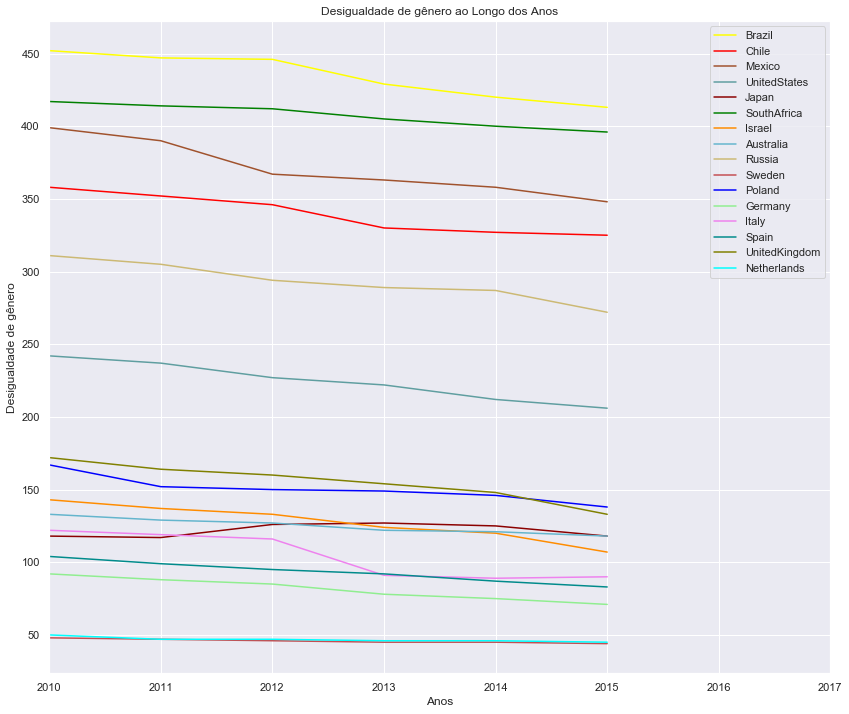

In [182]:
generate_chart_lin(tgbr, tgch,tgme,tgus,tgjp,tgsa,tgis,tgau,tgru,tgsw,tgpo,tgge,tgit,tgsp,tguk,tgne,
                           'year',"genderInequality",[2010,2017],'Anos', 'Desigualdade de gênero', 
                           ['Brazil','Chile','Mexico','UnitedStates','Japan','SouthAfrica',
                            'Israel','Australia','Russia','Sweden', 'Poland',
                            'Germany','Italy', 'Spain','UnitedKingdom', 'Netherlands'], 
                            'Desigualdade de gênero ao Longo dos Anos' )

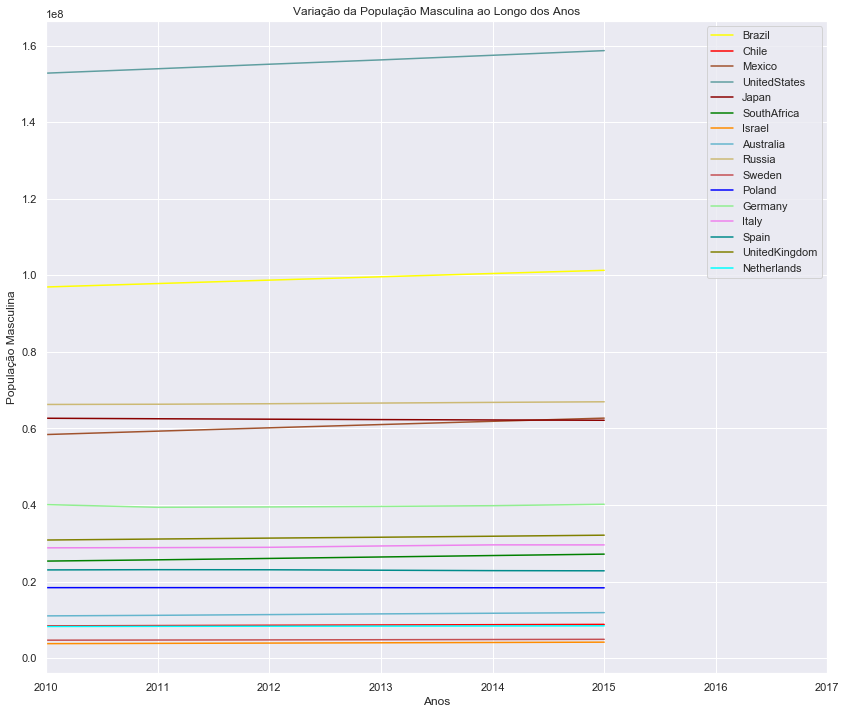

In [172]:
generate_chart_lin(tgbr, tgch,tgme,tgus,tgjp,tgsa,tgis,tgau,tgru,tgsw,tgpo,tgge,tgit,tgsp,tguk,tgne,
                           'year',"totalPopulationMale",[2010,2017],'Anos', 'População Masculina', 
                           ['Brazil','Chile','Mexico','UnitedStates','Japan','SouthAfrica',
                            'Israel','Australia','Russia','Sweden', 'Poland',
                            'Germany','Italy', 'Spain','UnitedKingdom', 'Netherlands'], 
                            'Variação da População Masculina ao Longo dos Anos' )

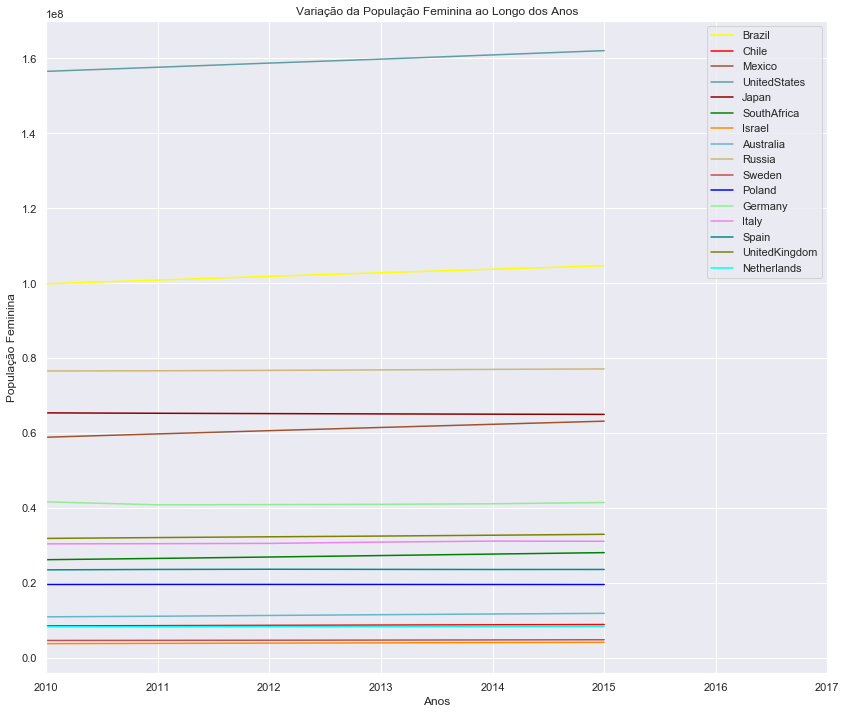

In [173]:
generate_chart_lin(tgbr, tgch,tgme,tgus,tgjp,tgsa,tgis,tgau,tgru,tgsw,tgpo,tgge,tgit,tgsp,tguk,tgne,
                           'year',"totalPopulationFemale",[2010,2017],'Anos', 'População Feminina', 
                           ['Brazil','Chile','Mexico','UnitedStates','Japan','SouthAfrica',
                            'Israel','Australia','Russia','Sweden', 'Poland',
                            'Germany','Italy', 'Spain','UnitedKingdom', 'Netherlands'], 
                            'Variação da População Feminina ao Longo dos Anos' )

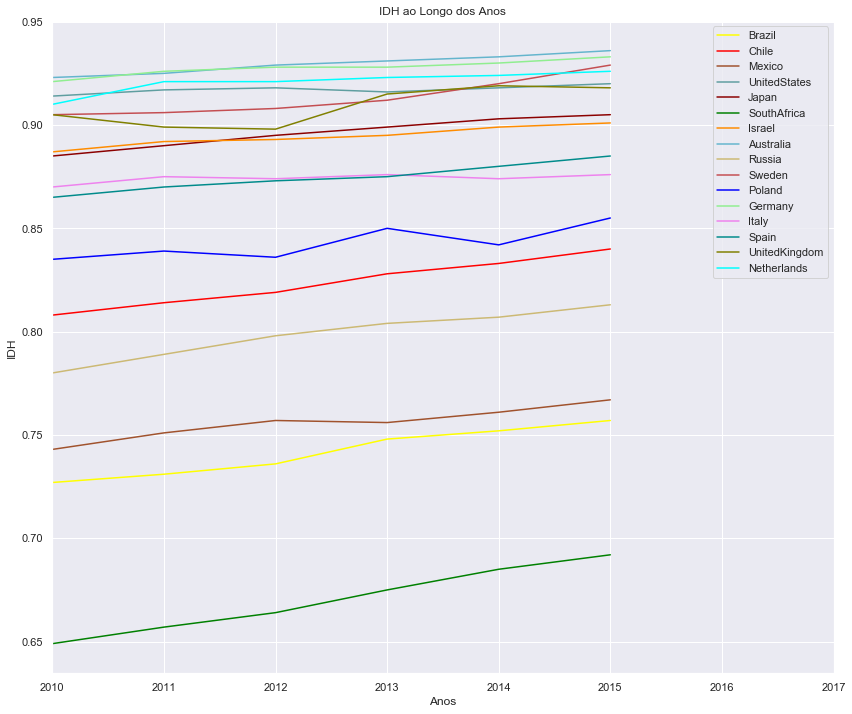

In [174]:
generate_chart_lin(tgbr, tgch,tgme,tgus,tgjp,tgsa,tgis,tgau,tgru,tgsw,tgpo,tgge,tgit,tgsp,tguk,tgne,
                           'year',"hdi",[2010,2017],'Anos', 'IDH', 
                           ['Brazil','Chile','Mexico','UnitedStates','Japan','SouthAfrica',
                            'Israel','Australia','Russia','Sweden', 'Poland',
                            'Germany','Italy', 'Spain','UnitedKingdom', 'Netherlands'], 
                            'IDH ao Longo dos Anos' )

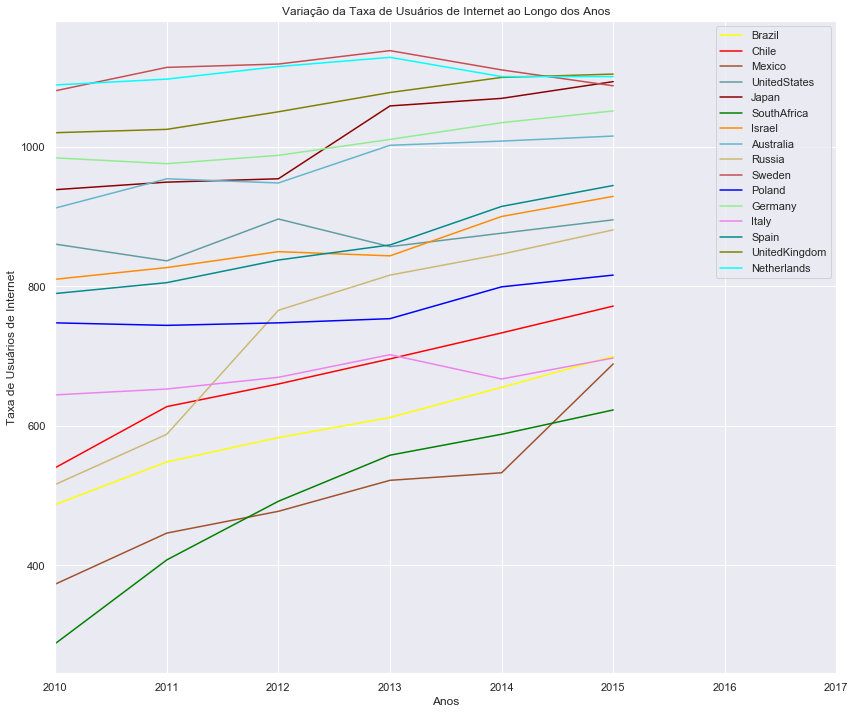

In [175]:
generate_chart_lin(tgbr, tgch,tgme,tgus,tgjp,tgsa,tgis,tgau,tgru,tgsw,tgpo,tgge,tgit,tgsp,tguk,tgne,
                           'year',"totalUsersInternet",[2010,2017],'Anos', 'Taxa de Usuários de Internet', 
                           ['Brazil','Chile','Mexico','UnitedStates','Japan','SouthAfrica',
                            'Israel','Australia','Russia','Sweden', 'Poland',
                            'Germany','Italy', 'Spain','UnitedKingdom', 'Netherlands'], 
                            'Variação da Taxa de Usuários de Internet ao Longo dos Anos' )

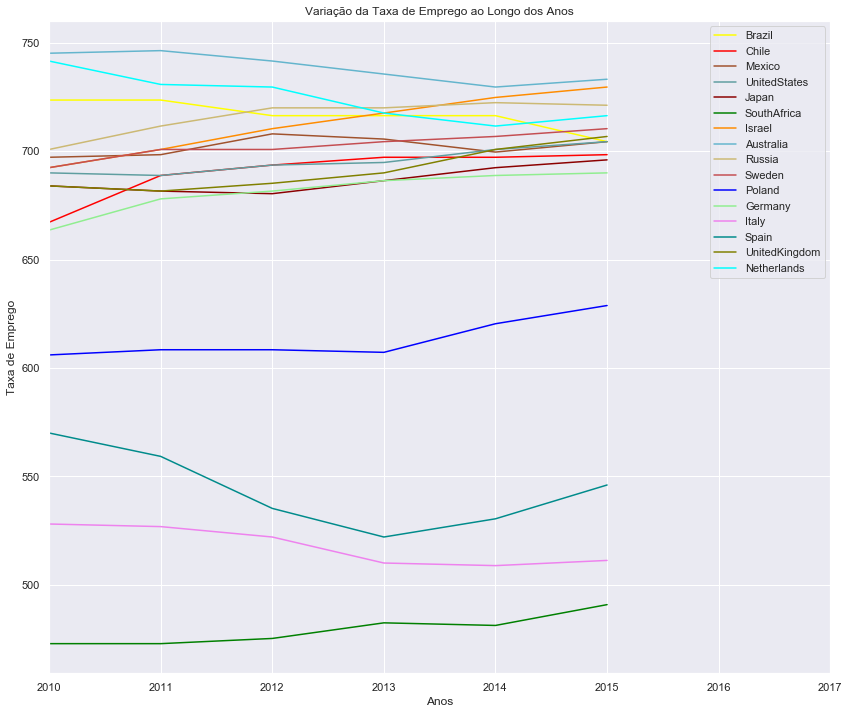

In [176]:
generate_chart_lin(tgbr, tgch,tgme,tgus,tgjp,tgsa,tgis,tgau,tgru,tgsw,tgpo,tgge,tgit,tgsp,tguk,tgne,
                           'year',"rateEmployment15andOlder",[2010,2017],'Anos', 'Taxa de Emprego', 
                           ['Brazil','Chile','Mexico','UnitedStates','Japan','SouthAfrica',
                            'Israel','Australia','Russia','Sweden', 'Poland',
                            'Germany','Italy', 'Spain','UnitedKingdom', 'Netherlands'], 
                            'Variação da Taxa de Emprego ao Longo dos Anos' )

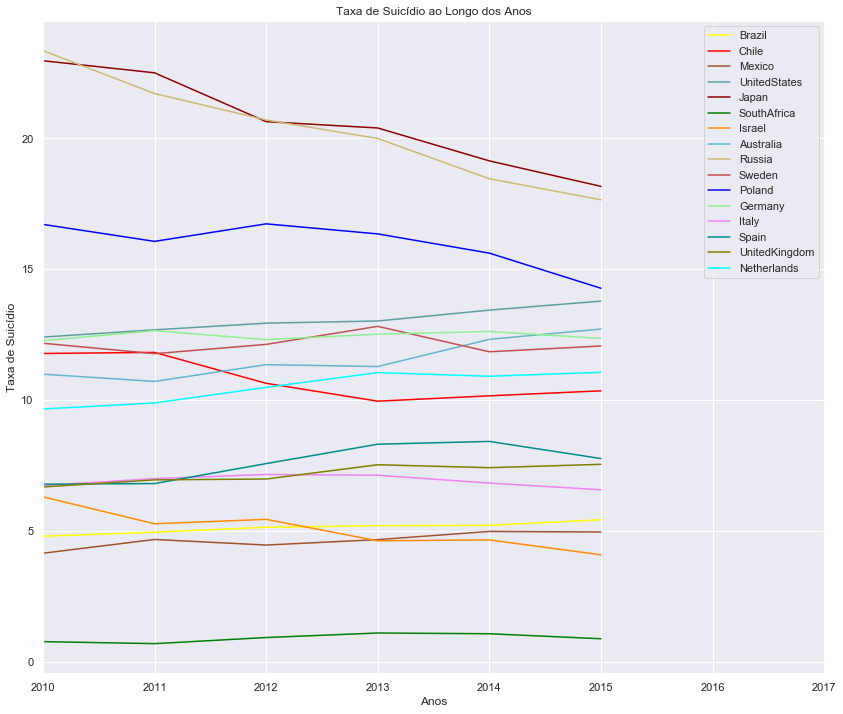

In [177]:
generate_chart_lin(tgbr, tgch,tgme,tgus,tgjp,tgsa,tgis,tgau,tgru,tgsw,tgpo,tgge,tgit,tgsp,tguk,tgne,
                           'year',"suicides_no",[2010,2017],'Anos', 'Taxa de Suicídio', 
                           ['Brazil','Chile','Mexico','UnitedStates','Japan','SouthAfrica',
                            'Israel','Australia','Russia','Sweden', 'Poland',
                            'Germany','Italy', 'Spain','UnitedKingdom', 'Netherlands'], 
                            'Taxa de Suicídio ao Longo dos Anos' )

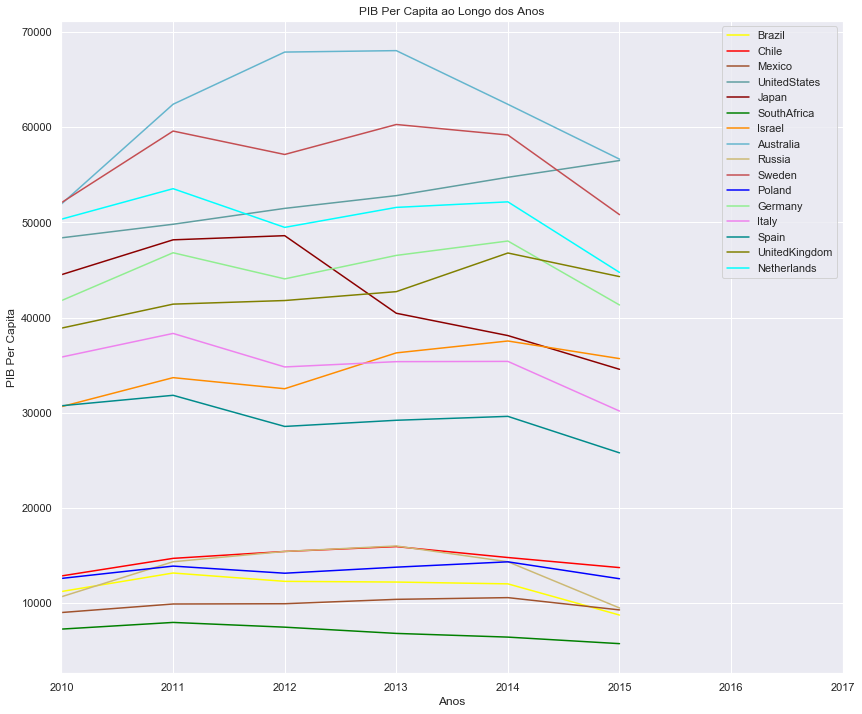

In [178]:
generate_chart_lin(tgbr, tgch,tgme,tgus,tgjp,tgsa,tgis,tgau,tgru,tgsw,tgpo,tgge,tgit,tgsp,tguk,tgne,
                           'year',"gdp-year",[2010,2017],'Anos', 'PIB Per Capita', 
                           ['Brazil','Chile','Mexico','UnitedStates','Japan','SouthAfrica',
                            'Israel','Australia','Russia','Sweden', 'Poland',
                            'Germany','Italy', 'Spain','UnitedKingdom', 'Netherlands'], 
                            'PIB Per Capita ao Longo dos Anos' )

In [27]:
#Agrupando por Continente

gamerica = america.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation","totalUsersInternet","rateEmployment15andOlder", "continent"], as_index=False).sum()
gaao = asiaAfricaOceania.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation","totalUsersInternet","rateEmployment15andOlder", "continent"], as_index=False).sum()
geurons = europe_northern_southern.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation","totalUsersInternet","rateEmployment15andOlder", "continent"], as_index=False).sum()
geurowe = europe_western_eastern.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation","totalUsersInternet","rateEmployment15andOlder", "continent"], as_index=False).sum()

In [28]:
# unindo todos os paises com seus respectivos continentes:
allcountrys = pd.concat([geurons, gamerica,gaao, geurowe], sort= True)
allcountrys = allcountrys.sort_values(by=['country','year'])
allcountrys['suicides_no'] = list((allcountrys['suicides_no']/allcountrys['totalPopulation'])*100000)
allcountrys['gdp-year'] = list(allcountrys['gdp-year']/allcountrys['totalPopulation'])

In [29]:
def generate_3d_bouble_chart(df, x_column, y_column, z_column, text, color_column, title_color_column, title_chart, file_name):
    trace1 = go.Scatter3d(
        x=df[x_column],
        y=df[y_column],
        z=df[z_column],
        text=df[text],
        mode='markers',
        marker=dict(
            sizemode='diameter',
            sizeref=750,
            color = df[color_column],
            colorscale = 'Viridis',
            colorbar = dict(title = title_color_column),
            line=dict(color='rgb(140, 140, 170)')
        )
    )

    data=[trace1]

    layout=go.Layout(height=800, width=800, title=title_chart)

    fig=go.Figure(data=data, layout=layout)
    py.iplot(fig, filename=file_name)
   
    #Referência: https://plot.ly/python/3d-bubble-charts/

In [180]:
# Taxa de suicídio:
generate_3d_bouble_chart(allcountrys,'year','continent','totalPopulation',
                         'country','suicides/100kpop','Suicidio por cada<br>100 mil Habitantes',
                         'Relação:<br>Tamanho da População X Taxa de Suicídio ao Longo do Tempo', 'analise_taxa')
# Desigualdade de gênero:
generate_3d_bouble_chart(allcountrys,'year','continent','totalPopulation',
                         'country','genderInequality','Desigualdade<br>de genero',
                         'Relação:<br>Tamanho da População X Desigualdade de genero ao Longo do Tempo', 'analise_genero_eq')
# PIB Per Capita:
generate_3d_bouble_chart(allcountrys,'year','continent','totalPopulation',
                         'country','gdp-year','PIB<br>Per Capita',
                         'Relação:<br>Tamanho da População X PIB Per Capita ao Longo do Tempo', 'analise_gdp')
# IDH
generate_3d_bouble_chart(allcountrys,'year','continent','totalPopulation',
                         'country','hdi','IDH',
                         'Relação:<br>Tamanho da População X Índice de Desenvolvimento Humano ao Longo do Tempo', 'analise_idh')
# Taxa de Usuários com Internet
generate_3d_bouble_chart(allcountrys,'year','continent','totalPopulation',
                         'country','totalUsersInternet','Taxa de Usuários com Internet',
                         'Relação:<br>Tamanho da População X Taxa de Usuários com Internet ao Longo do Tempo', 'analise_int')
# Taxa de Emprego
generate_3d_bouble_chart(allcountrys,'year','continent','totalPopulation',
                         'country','rateEmployment15andOlder','Taxa de Emprego',
                         'Relação:<br>Tamanho da População X Taxa de Emprego ao Longo do Tempo', 'analise_emp')
# Taxa de Suicidio x Taxa de Emprego
generate_3d_bouble_chart(allcountrys,'year','continent','suicides_no',
                         'country','rateEmployment15andOlder','Taxa de Emprego',
                         'Relação:<br>Tamanho de Suicídio X Taxa de Emprego ao Longo do Tempo', 'analise_suicide_emp')

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [31]:
#Agrupando por sub região

south_america_group = south_america.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
eastern_europe_group = eastern_europe.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
northern_europe_group = northern_europe.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
southern_europe_group = southern_europe.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
western_europe_group = western_europe.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
asia_group = asia.groupby(["year","country","totalPopulationFemale","totalPopulationMale","gdp-year","gdp-per-capita","hdi"], as_index=False).sum()

In [32]:
def axis_x_center(length=1):
    start = -(length//2) if length%2 == 0 else -((length//2))
    end = (length//2) if length%2 == 0 else ((length//2)+1)
    
    return [x for x in range(start, end)]

In [33]:
#Função para gerar gráfico de taxa de suicídio por gênero.
# Os comentários abaixo podem ser aplicados paras as demais funções semelhantes.
def generate_chart_suicide_gen(df, axis_y, axis_x, title, list_colors, wd = 0.15):
    list_colors = list_colors
    
    plt.ylabel(axis_y) # label do eixo y
    plt.xlabel(axis_x) # label do eixo x
    plt.title(title) # titulo do gráfico
    plt.rcParams["figure.figsize"] = (10,8)
    ax = plt.subplot() # Necessário para plotar o tipo de gráfico que será utilizado.
    
    country_sex = list(df["sex"].unique())  # Pega os valores unicos da coluna do df.
    year_df = list(df["year"].unique())  # Pega os valores unicos da coluna do df.
    country_year = np.asarray(year_df) # Converte em um array do numpy.
    
    list_num = axis_x_center(len(country_sex))  # Centraliza os labels dos paises. - # Centraliza os labels do eixo x.
    plt.xlim(country_year[0]+(wd*(list_num[0]-3)), country_year[-1]+(wd*(list_num[-1]+3)))  # alterar as larguras dos limites no eixo x.
    plt.xticks(country_year) #  #seta os labels do eixo x
    
    for index in range(len(country_sex)):
        if country_sex[index] == "female":
            country_list = list((df["suicides_no"][df["sex"] == country_sex[index]]/df["totalPopulationFemale"][df["sex"] == country_sex[index]])*100000)
            # Linha anterior: Monta a lista que será passada no gráfico com os dados que se quer para o gráfico. Irá variar para cada tipo de dado que quer mostrar no gráfico.
            country_list = np.asarray(country_list) # Converte em um array do numpy.
        elif country_sex[index] == "male":
            country_list = list((df["suicides_no"][df["sex"] == country_sex[index]]/df["totalPopulationMale"][df["sex"] == country_sex[index]])*100000)
            # Linha anterior: Monta a lista que será passada no gráfico com os dados que se quer para o gráfico. Irá variar para cada tipo de dado que quer mostrar no gráfico.
            country_list = np.asarray(country_list) # Converte em um array do numpy.
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_sex[index], color=list_colors[index])
        # Parâmetros da linha anterior: label eixo x (ex: anos), (eixo y), largura, alinhamento, as barras, lista de cores.
        ax.legend(loc="upper left") # legendas do grafico.


    plt.show()

In [34]:
#Função para gerar gráfico de taxa de suicídio por idade.
def generate_chart_suicide_age(df, axis_y, axis_x, title, list_colors, wd = 0.15):
    list_colors = list_colors
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    plt.rcParams["figure.figsize"] = (14,12)
    ax = plt.subplot()
    
    country_age = list(df["age"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_age)) # Centraliza os labels do eixo x
    plt.xlim(country_year[0]+(wd*(list_num[0]-6)), country_year[-1]+(wd*(list_num[-1]+3))) # alterar as larguras dos limites no eixo x.
    plt.xticks(country_year) #seta os labels do eixo x
    
    for index in range(len(country_age)):
        country_list = list(df["suicides/100kpop"][df["age"] == country_age[index]])
        country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_age[index], color=list_colors[index])
       # label eixo x (ex: anos), (eixo y), largura, alinhamento, las barras, lista de cores.
        ax.legend(loc="upper left") # legendas do grafico.
    plt.show()

In [35]:
#Função para gerar gráfico de taxa de suicídio total por país.
def generate_chart_suicide_total(df, axis_y, axis_x, title, list_colors, wd = 0.15):
    list_colors = list_colors
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    plt.rcParams["figure.figsize"] = (14,12)
    ax = plt.subplot()
    
    country_name = list(df["country"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_name)) 
    plt.xlim(country_year[0]+(wd*(list_num[0]-3)), country_year[-1]+(wd*(list_num[-1]+3)))
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_list = list((df["suicides_no"][df["country"] == country_name[index]]/df["totalPopulation"][df["country"] == country_name[index]])*100000)
        country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper right")


    plt.show()

In [36]:
#Função para gerar gráfico de taxa de idh total por país.
def generate_chart_hdi_total(df, axis_y, axis_x, title, list_colors, wd = 0.15):
    list_colors = list_colors
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    plt.ylim(0.6, 1)
    plt.rcParams["figure.figsize"] = (14,12)
    ax = plt.subplot()
    
    country_name = list(df["country"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_name))
    plt.xlim(country_year[0]+(wd*(list_num[0]-3)), country_year[-1]+(wd*(list_num[-1]+2)))
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_hdi = list(df["hdi"][df["country"] == country_name[index]])
        country_hdi = np.asarray(country_hdi)
        ax.bar(country_year+(wd*list_num[index]), country_hdi, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper left")


    plt.show() 

In [37]:
#Função para gerar gráfico de Desigualdade de Gênero por país.
def generate_chart_gender_inequality(df, axis_y, axis_x, title, list_colors, wd = 0.15):
    list_colors = list_colors
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    plt.rcParams["figure.figsize"] = (14,12)
    ax = plt.subplot()
    
    country_name = list(df["country"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_name))
    plt.xlim(country_year[0]+(wd*(list_num[0]-2)), country_year[-1]+(wd*(list_num[-1]+2)))
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_list = list((df["genderInequality"][df["country"] == country_name[index]]))
        country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper right")


    plt.show()

In [38]:
#Função para gerar gráfico do PIB por país.
def generate_chart_gdp_year(df, axis_y, axis_x, title, list_colors, wd = 0.15):
    list_colors = list_colors
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    plt.rcParams["figure.figsize"] = (14,12)
    ax = plt.subplot()
    
    country_name = list(df["country"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_name))
    plt.xlim(country_year[0]+(wd*(list_num[0]-2)), country_year[-1]+(wd*(list_num[-1]+2)))
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_list = list(df["gdp-year"][df["country"] == country_name[index]])
        country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper left")


    plt.show()

In [39]:
#Função para gerar gráfico de população total por país.
def generate_chart_total_pop(df, axis_y, axis_x, title, list_colors, wd = 0.15):
    list_colors = list_colors
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    plt.rcParams["figure.figsize"] = (14,12)
    ax = plt.subplot()
    
    country_name = list(df["country"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_name))
    plt.xlim(country_year[0]+(wd*(list_num[0]-2)), country_year[-1]+(wd*(list_num[-1]+2)))
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_list = list(df["totalPopulation"][df["country"] == country_name[index]])
        country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper left")


    plt.show()

In [40]:
#Função para gerar gráfico de taxa de PIB per capita por país.
def generate_chart_gdp_pc(df, axis_y, axis_x, title, list_colors,wd = 0.15):
    list_colors = list_colors
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    plt.rcParams["figure.figsize"] = (14,12)
    ax = plt.subplot()
    
    country_name = list(df["country"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_name)) 
    plt.xlim(country_year[0]+(wd*(list_num[0]-3)), country_year[-1]+(wd*(list_num[-1]+3))) 
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_list = list((df["gdp-year"][df["country"] == country_name[index]]/df["totalPopulation"][df["country"] == country_name[index]]))
        country_list = np.asarray(country_list)  # converter uma lista num array numpy.
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper left")


    plt.show()

In [41]:
def generate_chart_rate_population_age(df, axis_y, axis_x, title, population_sex, list_colors,wd = 0.15):
    list_colors = list_colors
    population_sex = population_sex
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    plt.rcParams["figure.figsize"] = (15,10)
    ax = plt.subplot()
    
    country_age = list(df["age"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_age)) 
    plt.xlim(country_year[0]+(wd*(list_num[0]-3)), country_year[-1]+(wd*(list_num[-1]+3))) 
    plt.xticks(country_year)
    
    for index in range(len(country_age)):
        country_list = list((df["population"][df["age"] == country_age[index]]) / (df[population_sex][df["age"] == country_age[index]])*100)
        country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_age[index], color=list_colors[index])
        ax.legend(loc="upper left")


    plt.show()

In [42]:
def generate_chart_rate_population_gen(df, axis_y, axis_x, title, list_colors, limy1= 45, limy2= 54, wd = 0.15):
    list_colors = list_colors
    
    plt.ylabel(axis_y) 
    plt.xlabel(axis_x) 
    plt.title(title)
    plt.ylim(limy1,limy2)
    plt.rcParams["figure.figsize"] = (10,8)
    ax = plt.subplot() 
    
    country_sex = list(df["sex"].unique()) 
    year_df = list(df["year"].unique()) 
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_sex))  
    plt.xlim(country_year[0]+(wd*(list_num[0]-3)), country_year[-1]+(wd*(list_num[-1]+3))) 
    plt.xticks(country_year) 
    
    for index in range(len(country_sex)):
        if country_sex[index] == "female":
            country_list = list((df["totalPopulationFemale"][df["sex"] == country_sex[index]]/df["totalPopulation"][df["sex"] == country_sex[index]])*100)
            country_list = np.asarray(country_list) 
        elif country_sex[index] == "male":
            country_list = list((df["totalPopulationMale"][df["sex"] == country_sex[index]]/df["totalPopulation"][df["sex"] == country_sex[index]])*100)
            country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_sex[index], color=list_colors[index])
        ax.legend(loc="upper left")


    plt.show()

In [43]:
#Função para gerar gráfico de taxa de usuários de internet por país.
def generate_chart_users_internet(df, axis_y, axis_x, title, list_colors, wd = 0.15):
    list_colors = list_colors
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    plt.rcParams["figure.figsize"] = (14,12)
    ax = plt.subplot()
    
    country_name = list(df["country"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_name))
    plt.xlim(country_year[0]+(wd*(list_num[0]-5)), country_year[-1]+(wd*(list_num[-1]+2)))
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_list = list(df["totalUsersInternet"][df["country"] == country_name[index]])
        country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper left")


    plt.show()

In [44]:
#Função para gerar gráfico de taxa de Empregados por país.
def generate_chart_employment(df, axis_y, axis_x, title, list_colors,  ylim1=50, ylim2=60, wd = 0.15):
    list_colors = list_colors
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    plt.ylim(ylim1,ylim2)
    ax = plt.subplot()
    
    country_name = list(df["country"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_name))
    plt.xlim(country_year[0]+(wd*(list_num[0]-5)), country_year[-1]+(wd*(list_num[-1]+2)))
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_list = list(df["rateEmployment15andOlder"][df["country"] == country_name[index]])
        country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper left")


    plt.show()

In [45]:
def generate_growth_pop_age_lin(df, col_y, col_f, col_m, x_limit, x_label, y_label, legend, title):
    plt.plot(df[col_y],df[col_f], color='red' )
    plt.plot (df[col_y],df[col_m], color='green' )
    plt.xlim(x_limit)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(legend)
    plt.title(title)
    plt.show()

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



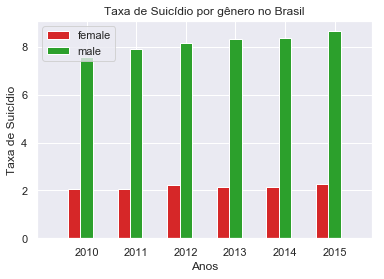

In [46]:
generate_chart_suicide_gen(gbr, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero no Brasil",male_female_colors, 0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



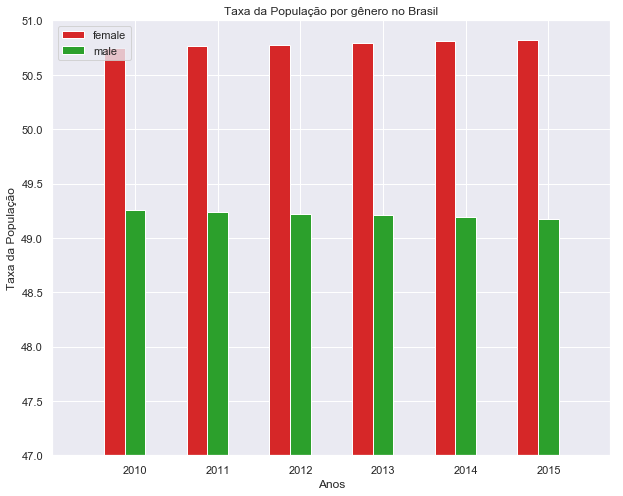

In [47]:
generate_chart_rate_population_gen(gbr, "Taxa da População", "Anos", "Taxa da População por gênero no Brasil",male_female_colors,47,51,0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



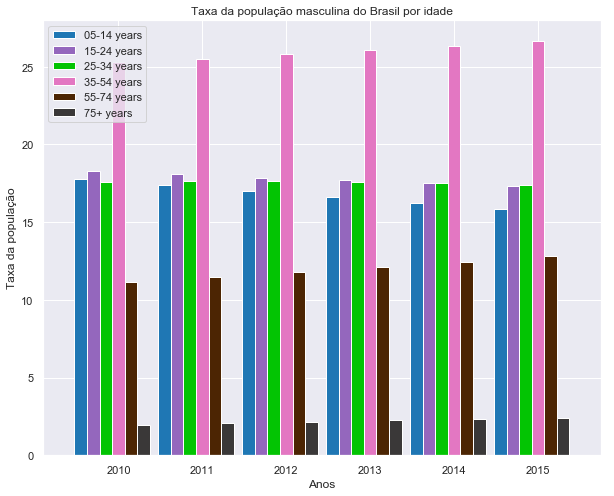

In [48]:
generate_chart_rate_population_age(brazil_male, "Taxa da população", "Anos", "Taxa da população masculina do Brasil por idade", "totalPopulationMale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



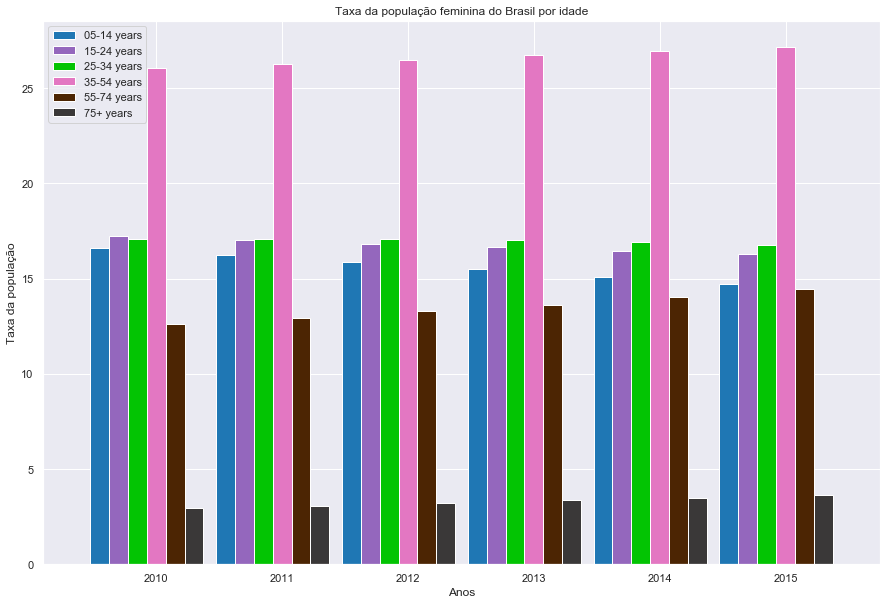

In [49]:
generate_chart_rate_population_age(brazil_female, "Taxa da população", "Anos", "Taxa da população feminina do Brasil por idade", "totalPopulationFemale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



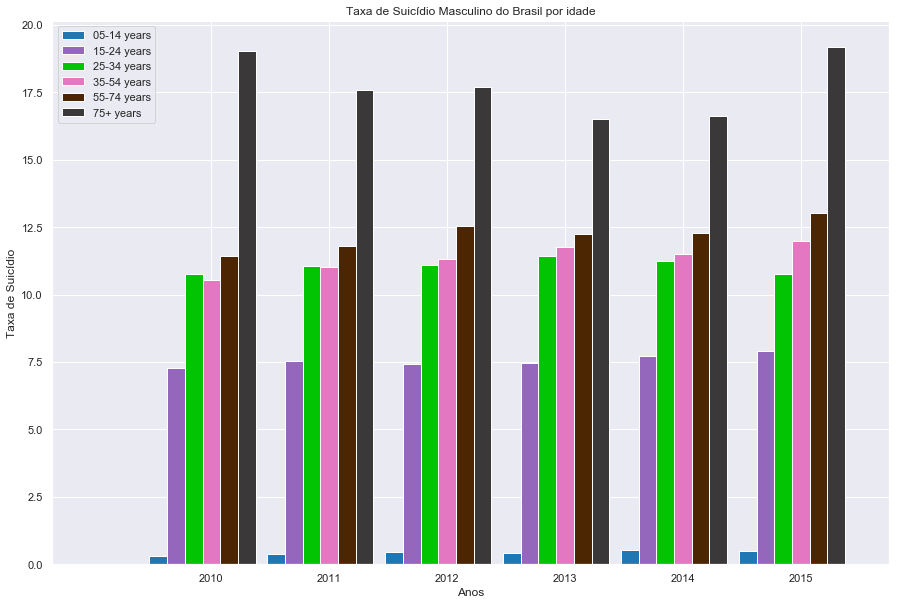

In [50]:
generate_chart_suicide_age(brazil_male, "Taxa de Suicídio", "Anos", "Taxa de Suicídio Masculino do Brasil por idade", age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



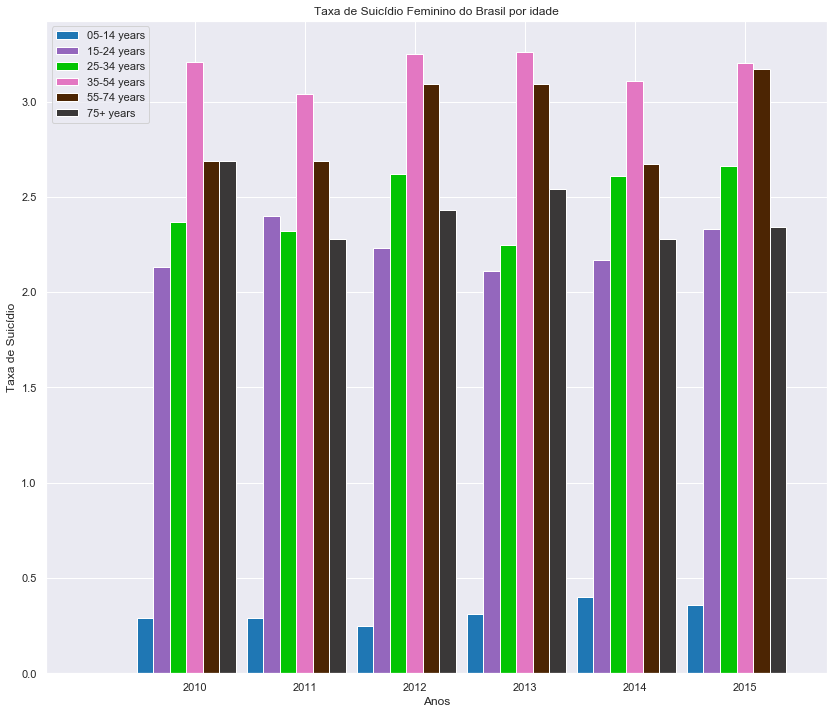

In [51]:
generate_chart_suicide_age(brazil_female, "Taxa de Suicídio", "Anos", "Taxa de Suicídio Feminino do Brasil por idade", age_colors, 0.15)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



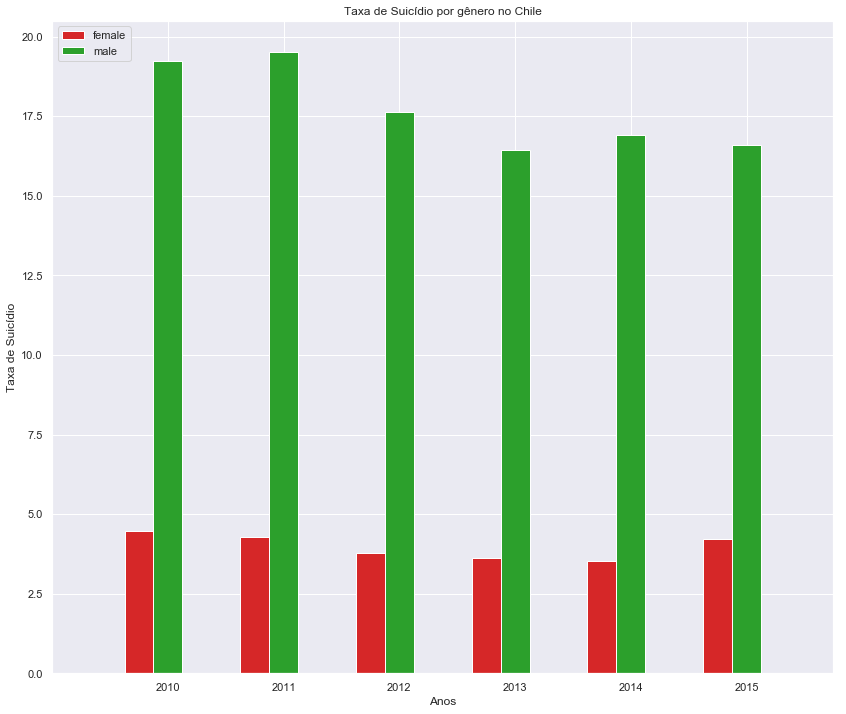

In [52]:
generate_chart_suicide_gen(gch, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero no Chile",male_female_colors, 0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



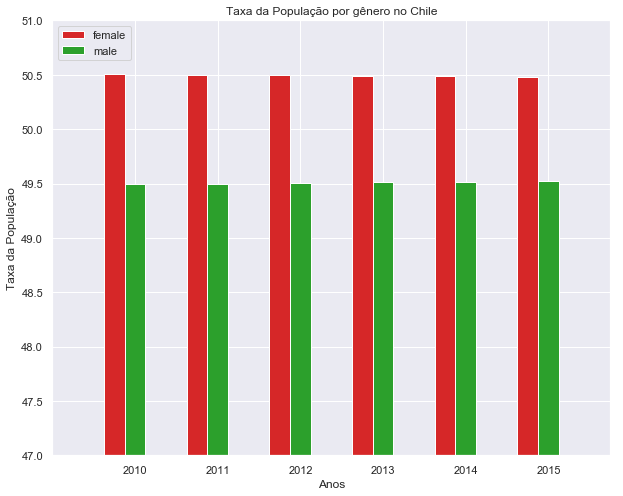

In [53]:
generate_chart_rate_population_gen(gch, "Taxa da População", "Anos", "Taxa da População por gênero no Chile",male_female_colors,47,51,0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



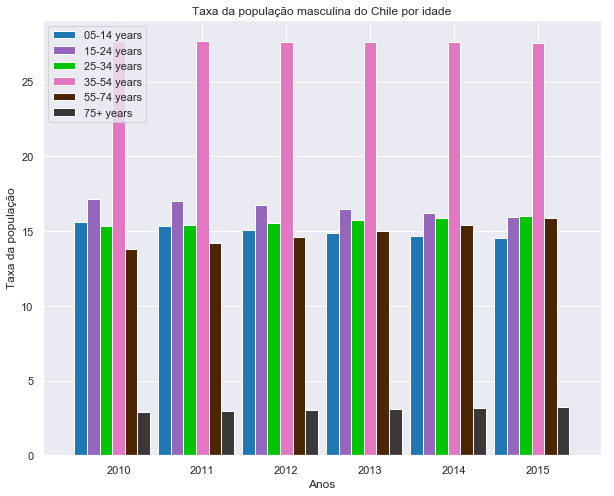

In [54]:
generate_chart_rate_population_age(chile_male, "Taxa da população", "Anos", "Taxa da população masculina do Chile por idade", "totalPopulationMale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



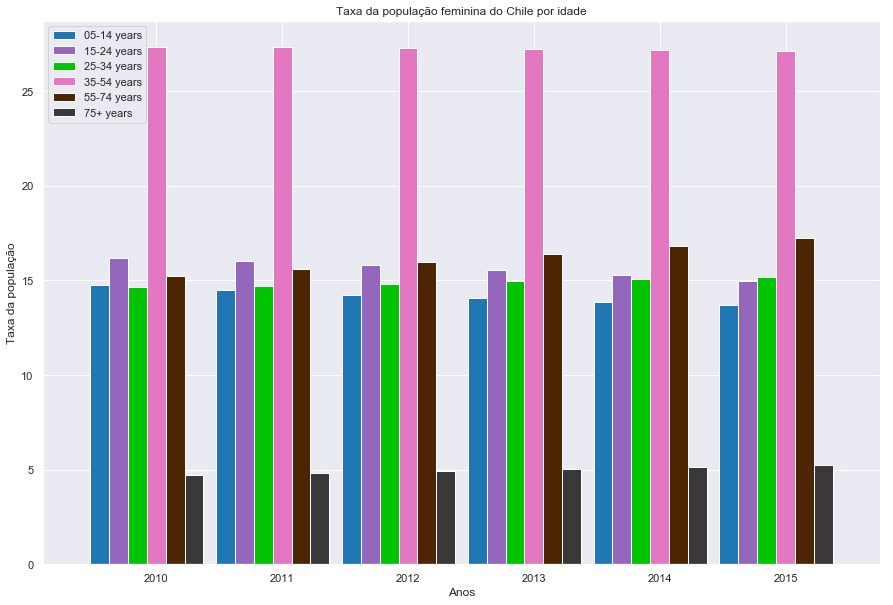

In [55]:
generate_chart_rate_population_age(chile_female, "Taxa da população", "Anos", "Taxa da população feminina do Chile por idade", "totalPopulationFemale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



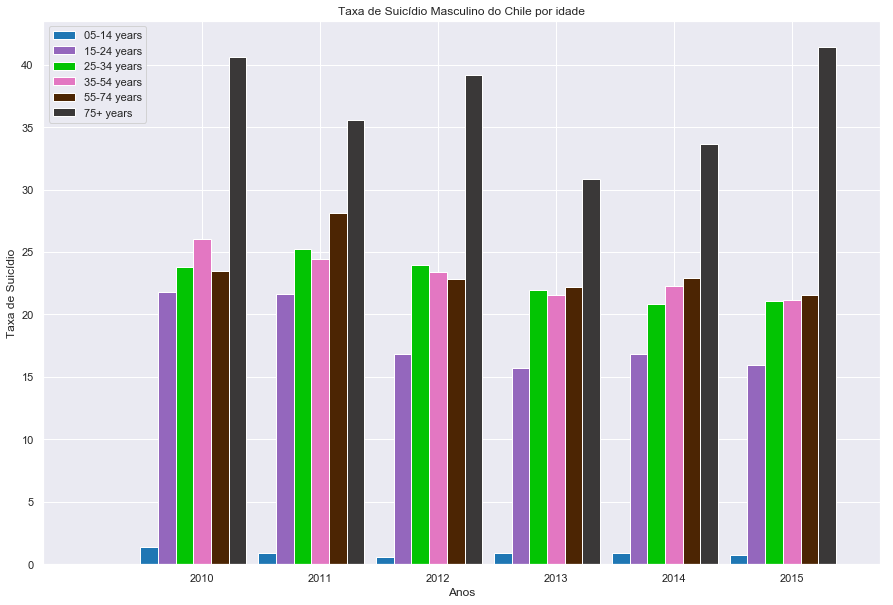

In [56]:
generate_chart_suicide_age(chile_male, "Taxa de Suicídio", "Anos", "Taxa de Suicídio Masculino do Chile por idade", age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



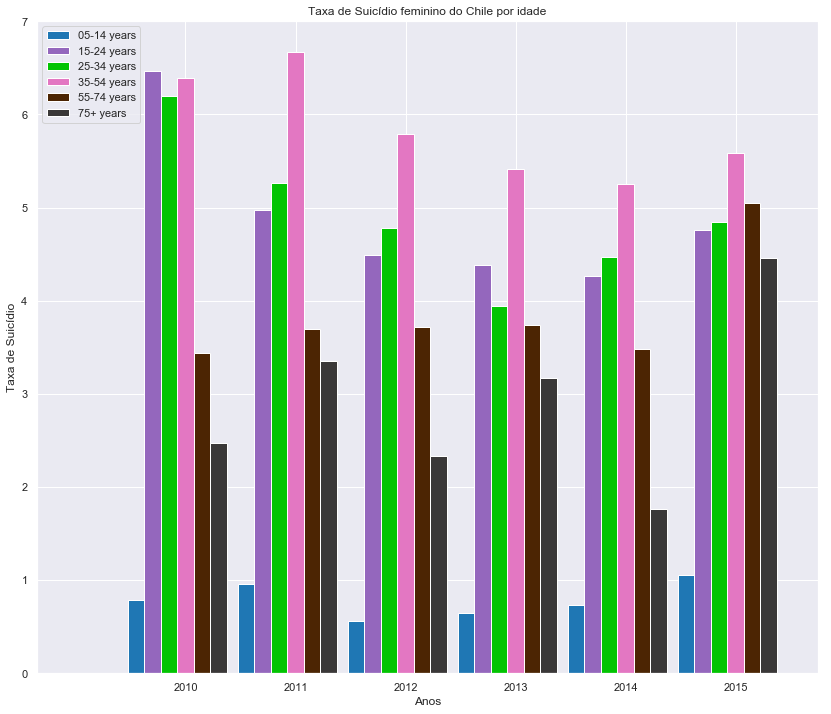

In [57]:
generate_chart_suicide_age(chile_female, "Taxa de Suicídio", "Anos", "Taxa de Suicídio feminino do Chile por idade", age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



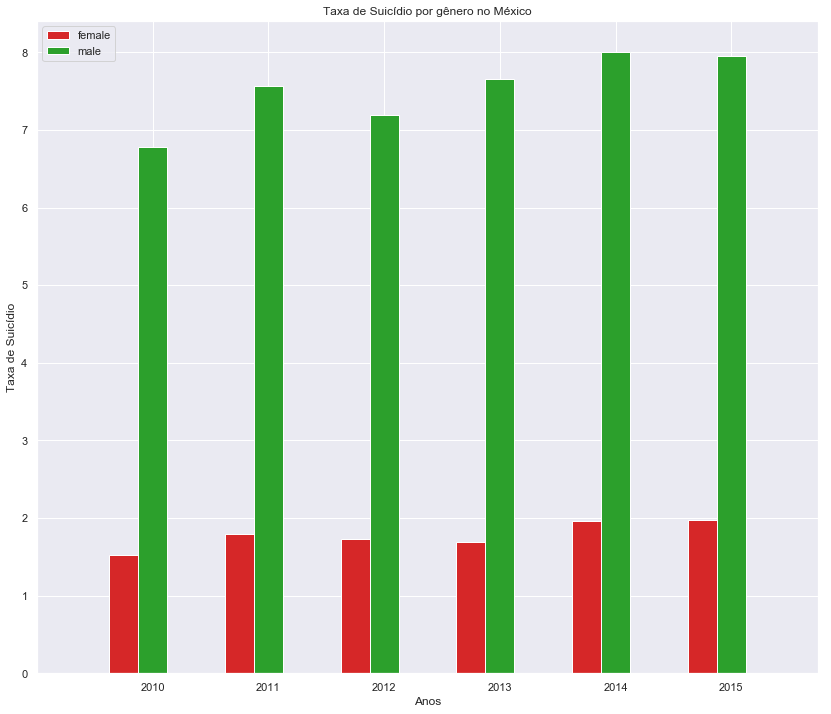

In [58]:
generate_chart_suicide_gen(gme, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero no México",male_female_colors, 0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



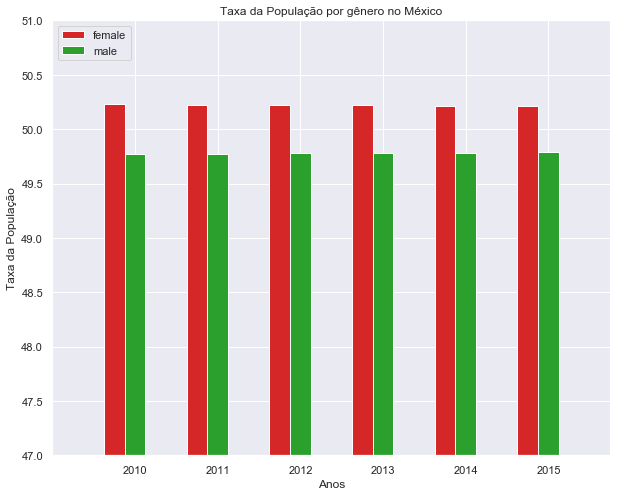

In [59]:
generate_chart_rate_population_gen(gme, "Taxa da População", "Anos", "Taxa da População por gênero no México",male_female_colors,47,51,0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



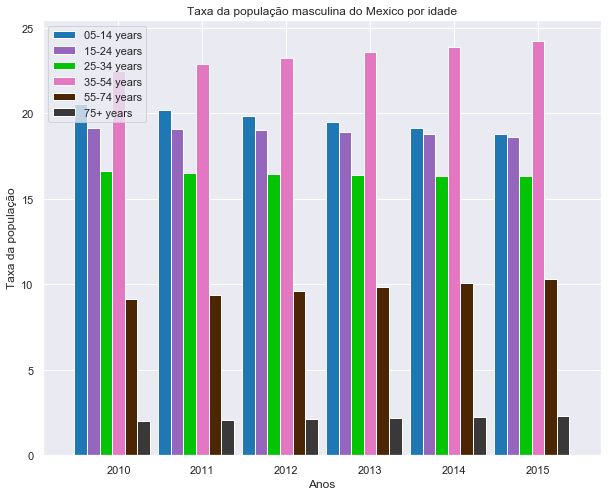

In [60]:
generate_chart_rate_population_age(mexico_male, "Taxa da população", "Anos", "Taxa da população masculina do Mexico por idade", "totalPopulationMale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



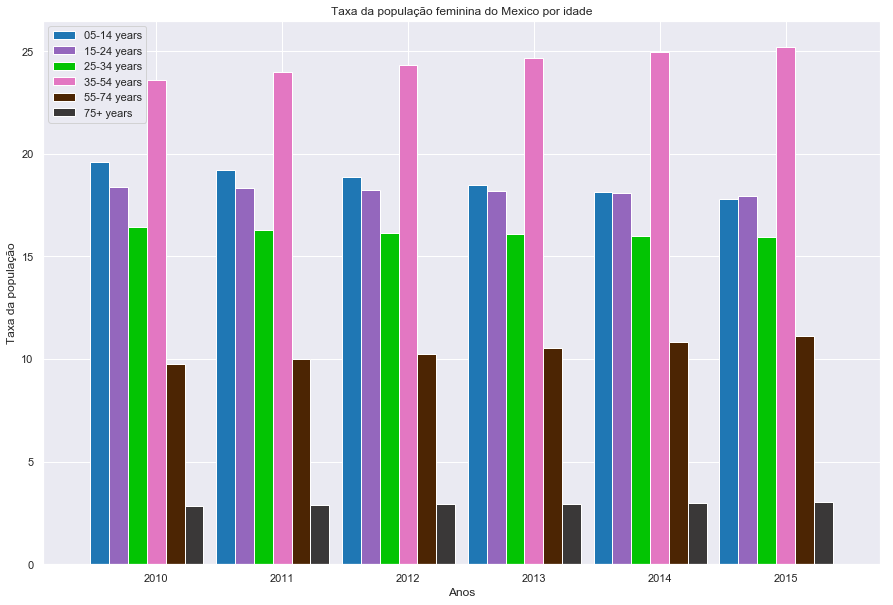

In [61]:
generate_chart_rate_population_age(mexico_female, "Taxa da população", "Anos", "Taxa da população feminina do Mexico por idade", "totalPopulationFemale",age_colors)


C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



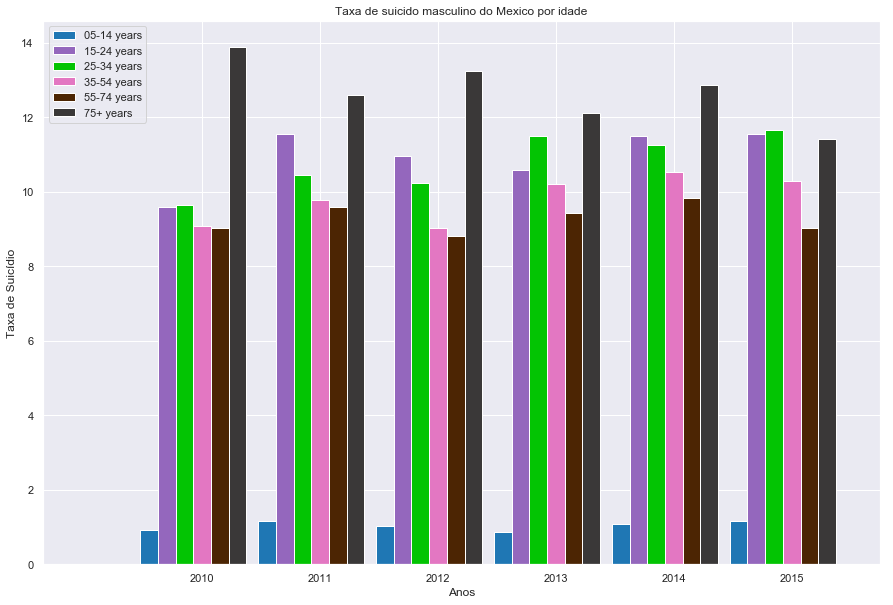

In [62]:
generate_chart_suicide_age(mexico_male, "Taxa de Suicídio", "Anos", "Taxa de suicido masculino do Mexico por idade",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



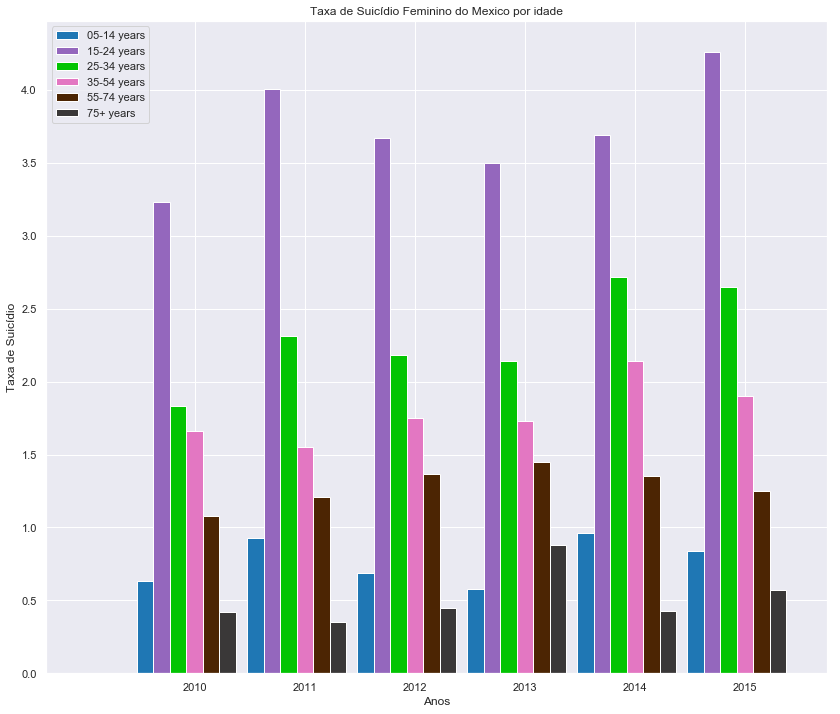

In [63]:
generate_chart_suicide_age(mexico_female, "Taxa de Suicídio", "Anos", "Taxa de Suicídio Feminino do Mexico por idade",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



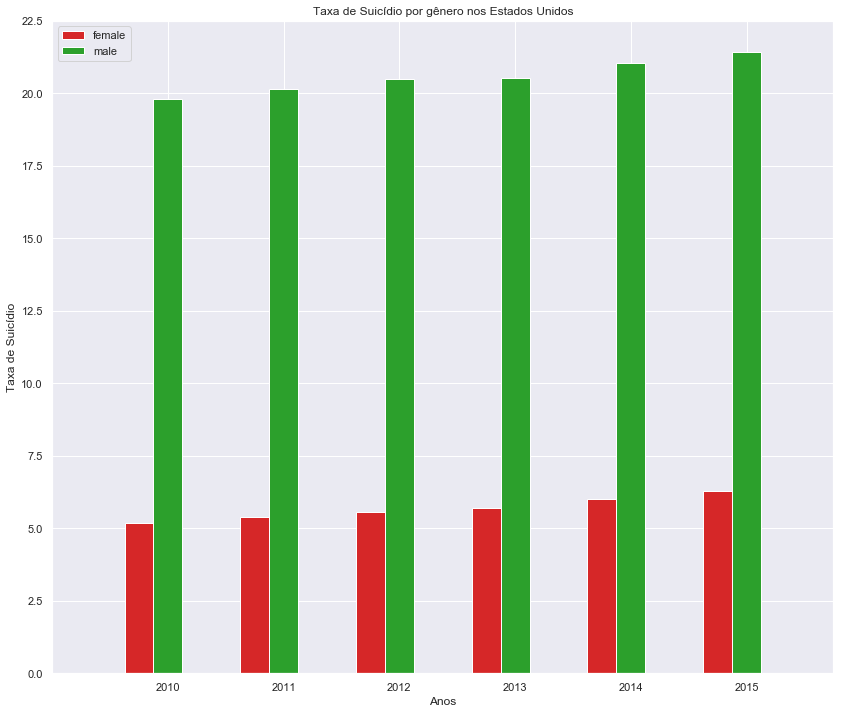

In [64]:
generate_chart_suicide_gen(gus, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero nos Estados Unidos",male_female_colors, 0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



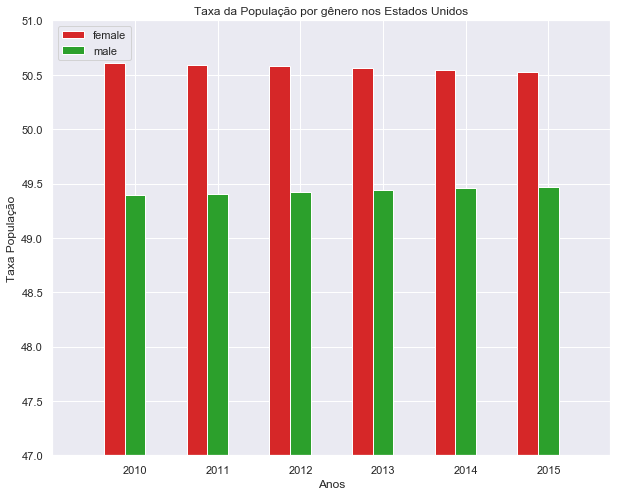

In [65]:
generate_chart_rate_population_gen(gus, "Taxa População", "Anos", "Taxa da População por gênero nos Estados Unidos",male_female_colors,47,51,0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



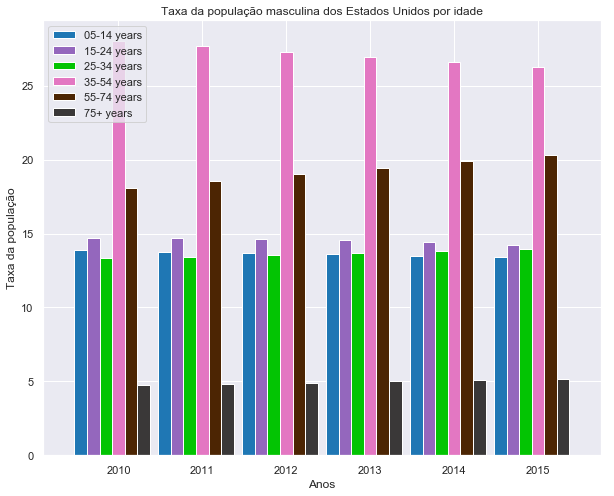

In [66]:
generate_chart_rate_population_age(unitedStates_male, "Taxa da população", "Anos", "Taxa da população masculina dos Estados Unidos por idade", "totalPopulationMale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



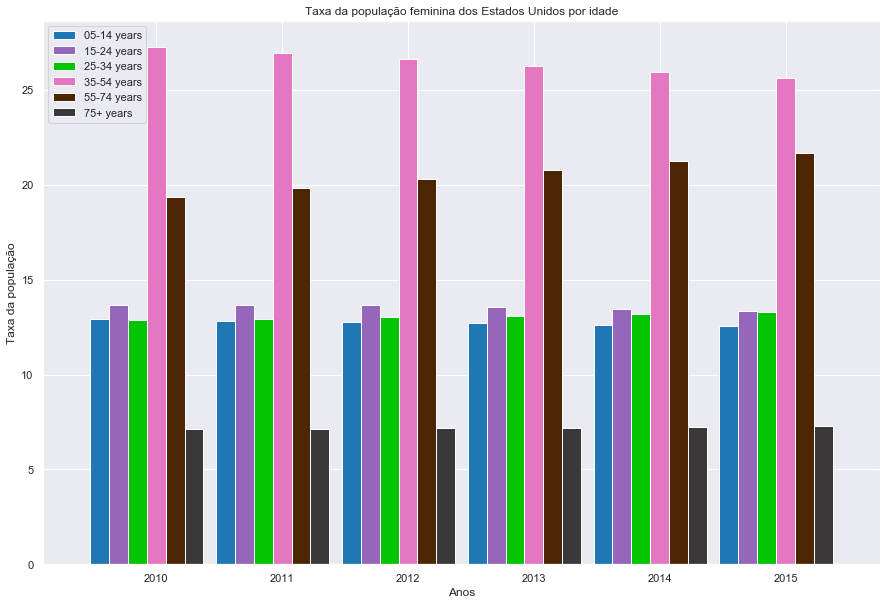

In [67]:
generate_chart_rate_population_age(unitedStates_female, "Taxa da população", "Anos", "Taxa da população feminina dos Estados Unidos por idade", "totalPopulationFemale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



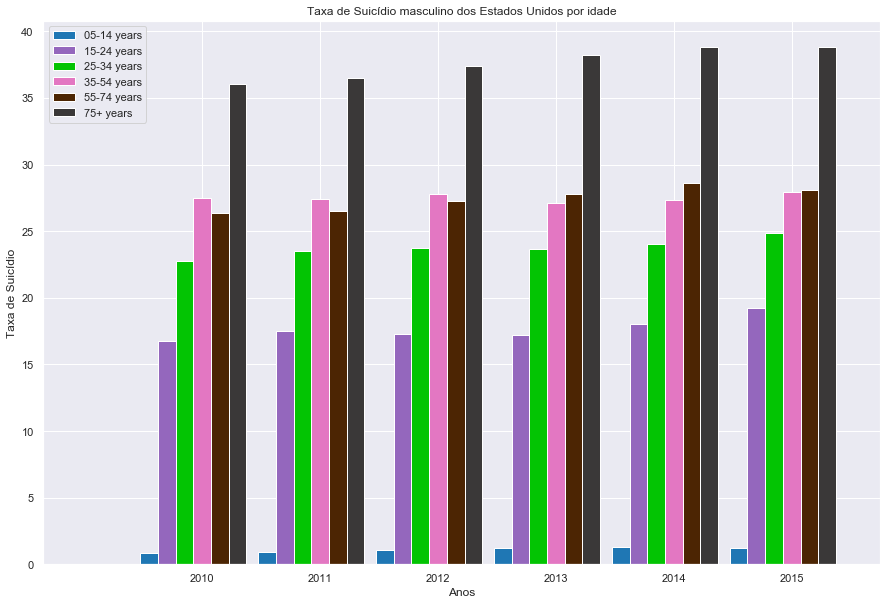

In [68]:
generate_chart_suicide_age(unitedStates_male, "Taxa de Suicídio", "Anos", "Taxa de Suicídio masculino dos Estados Unidos por idade",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



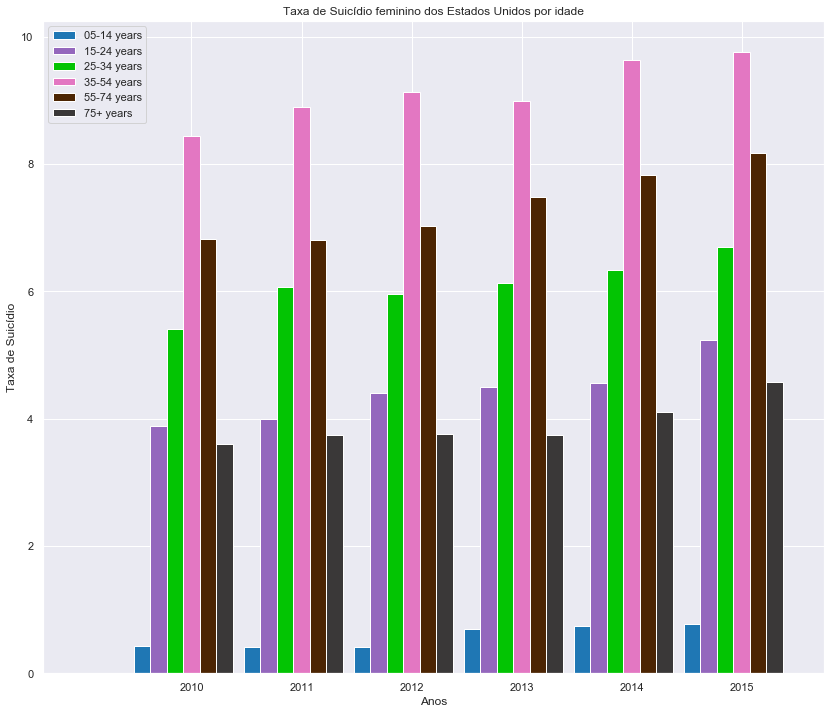

In [69]:
generate_chart_suicide_age(unitedStates_female, "Taxa de Suicídio", "Anos", "Taxa de Suicídio feminino dos Estados Unidos por idade",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



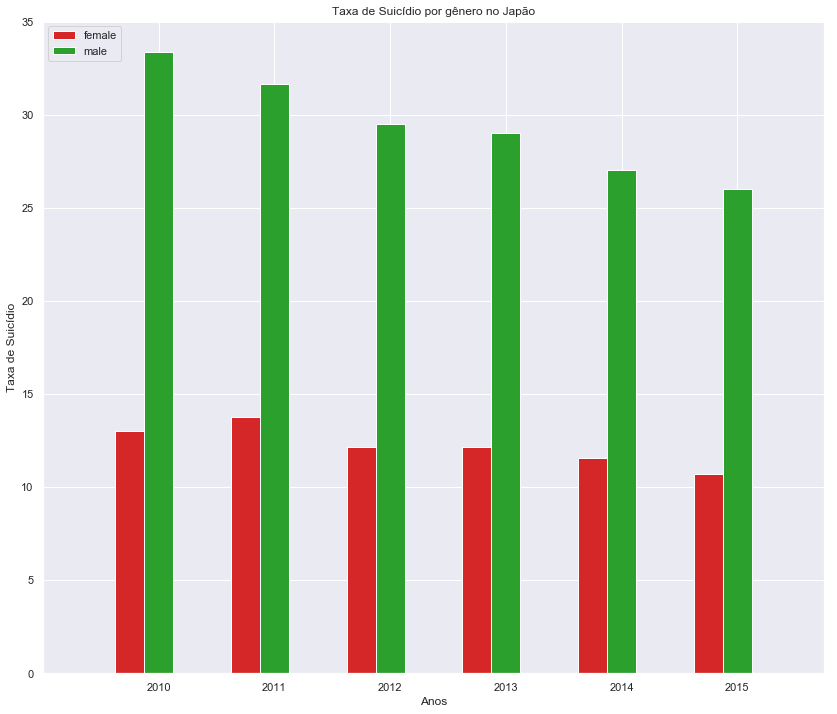

In [70]:
generate_chart_suicide_gen(gjp, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero no Japão",male_female_colors, 0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



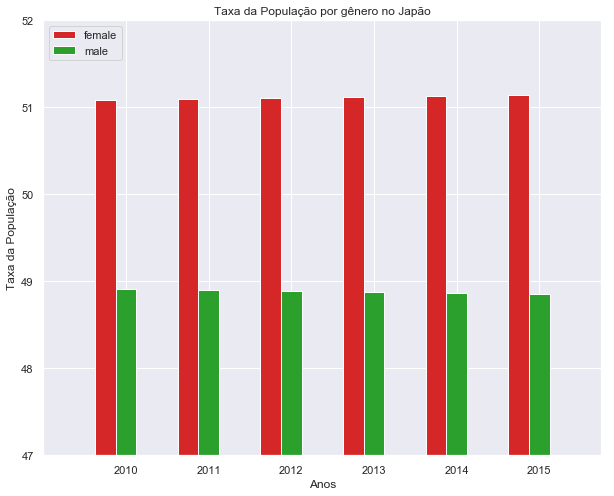

In [71]:
generate_chart_rate_population_gen(gjp, "Taxa da População", "Anos", "Taxa da População por gênero no Japão",male_female_colors,47,52,0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



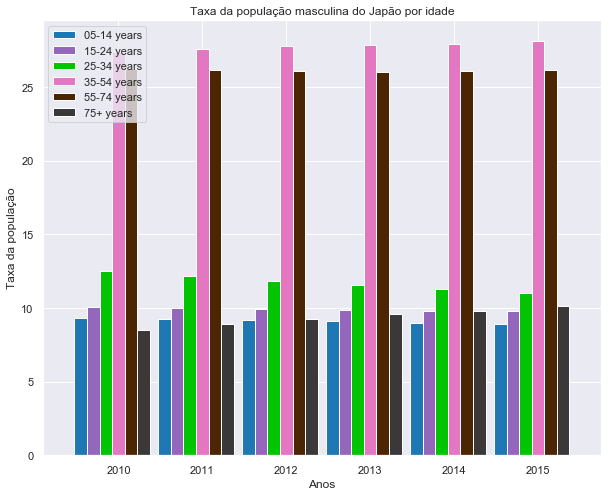

In [72]:
generate_chart_rate_population_age(japan_male, "Taxa da população", "Anos", "Taxa da população masculina do Japão por idade", "totalPopulationMale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



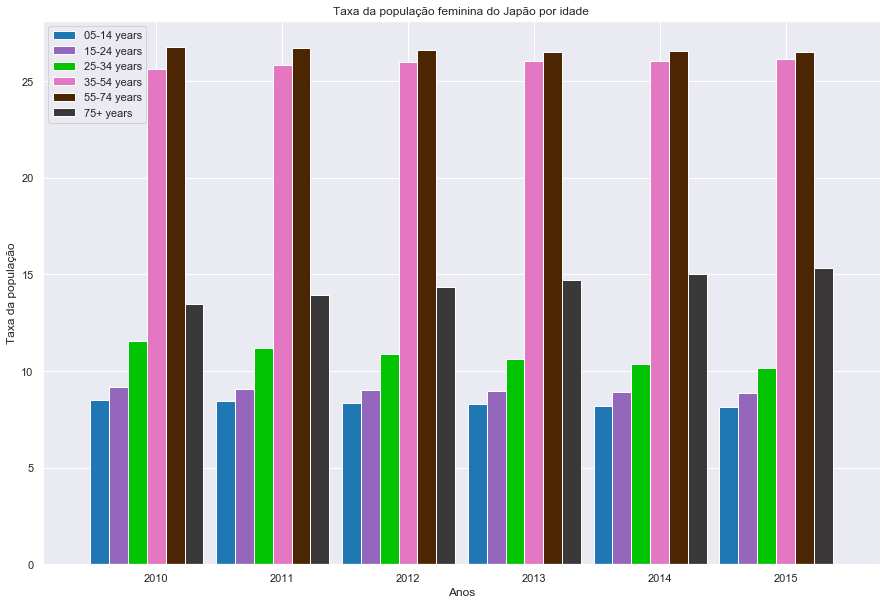

In [73]:
generate_chart_rate_population_age(japan_female, "Taxa da população", "Anos", "Taxa da população feminina do Japão por idade", "totalPopulationFemale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



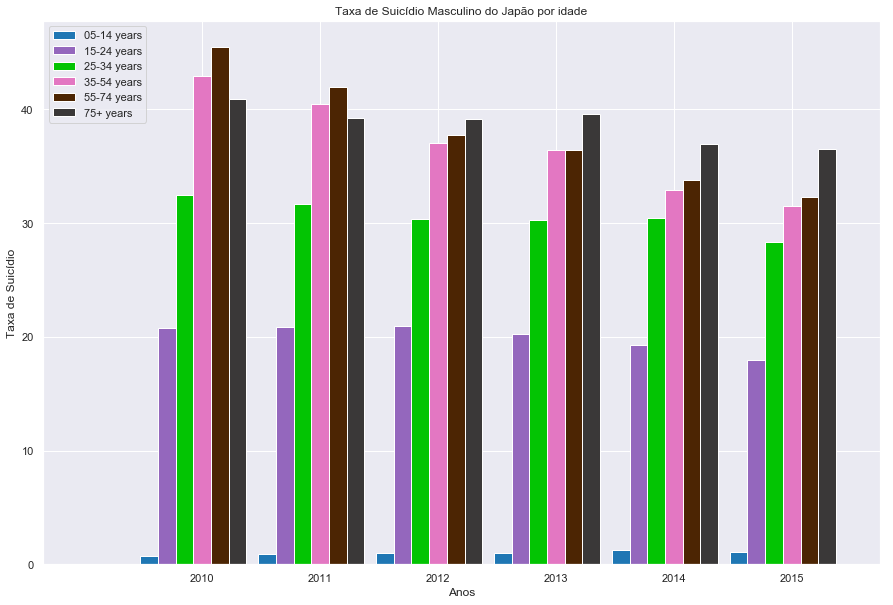

In [74]:
generate_chart_suicide_age(japan_male, "Taxa de Suicídio", "Anos", "Taxa de Suicídio Masculino do Japão por idade",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



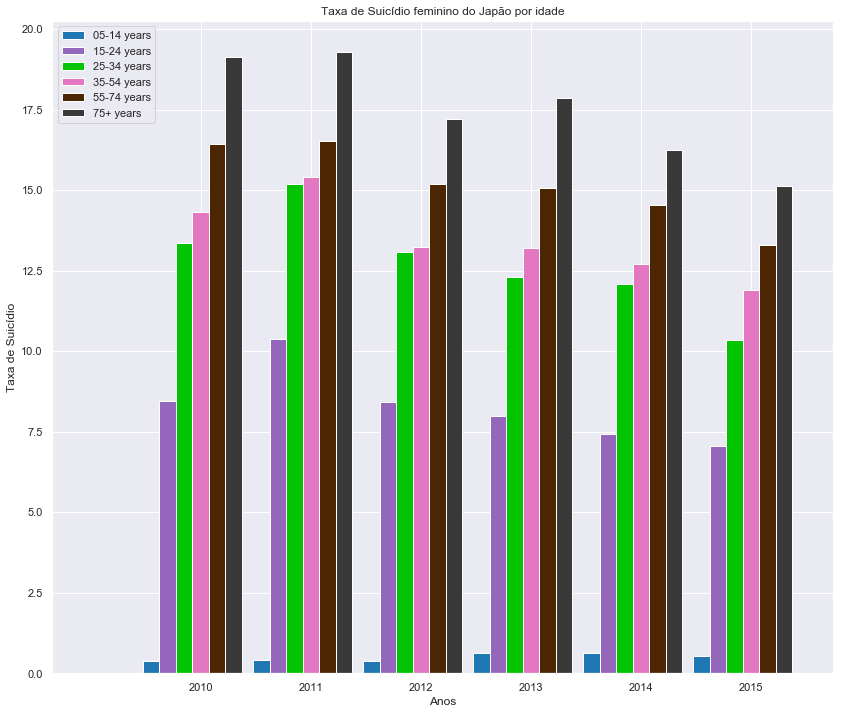

In [75]:
generate_chart_suicide_age(japan_female, "Taxa de Suicídio", "Anos", "Taxa de Suicídio feminino do Japão por idade",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



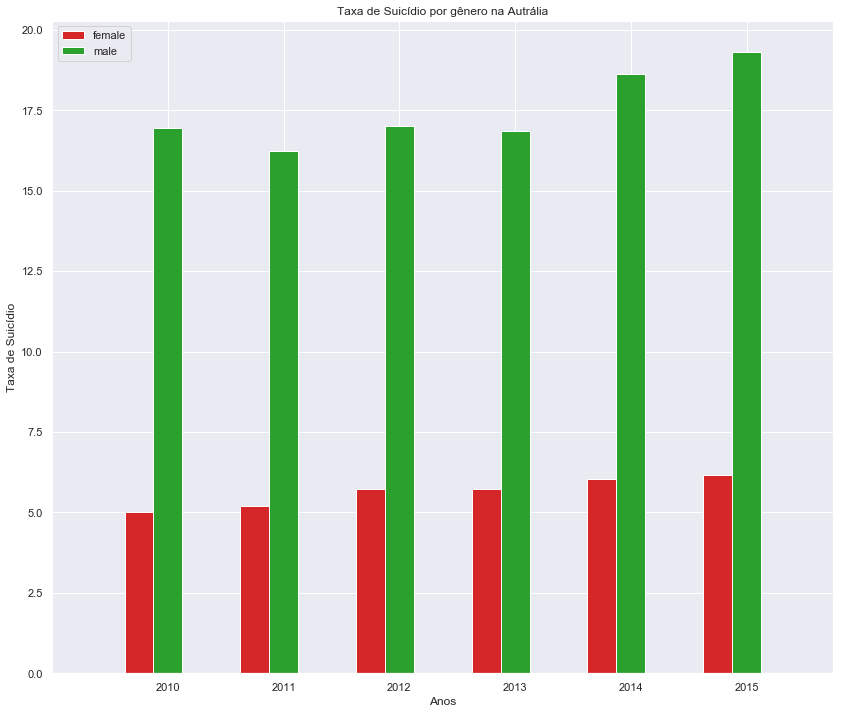

In [76]:
generate_chart_suicide_gen(gau, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero na Autrália",male_female_colors, 0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



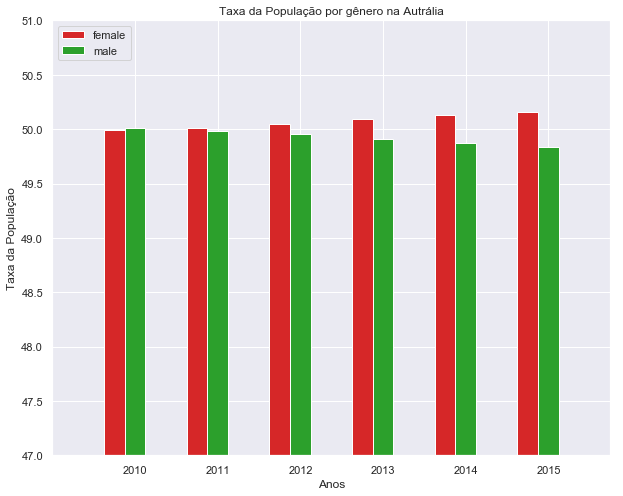

In [77]:
generate_chart_rate_population_gen(gau, "Taxa da População", "Anos", "Taxa da População por gênero na Autrália",male_female_colors,47,51,0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



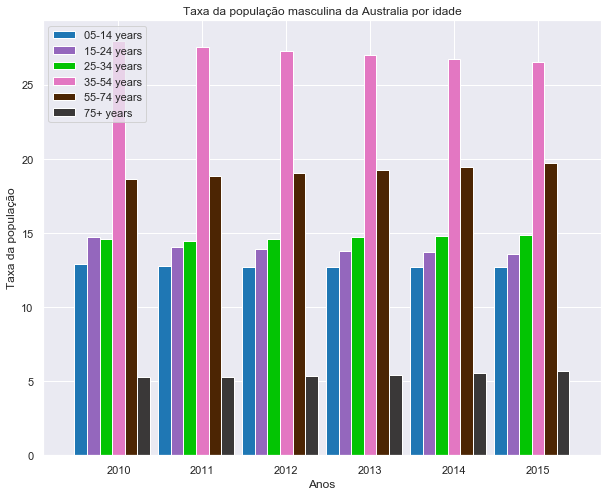

In [78]:
generate_chart_rate_population_age(australia_male, "Taxa da população", "Anos", "Taxa da população masculina da Australia por idade", "totalPopulationMale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



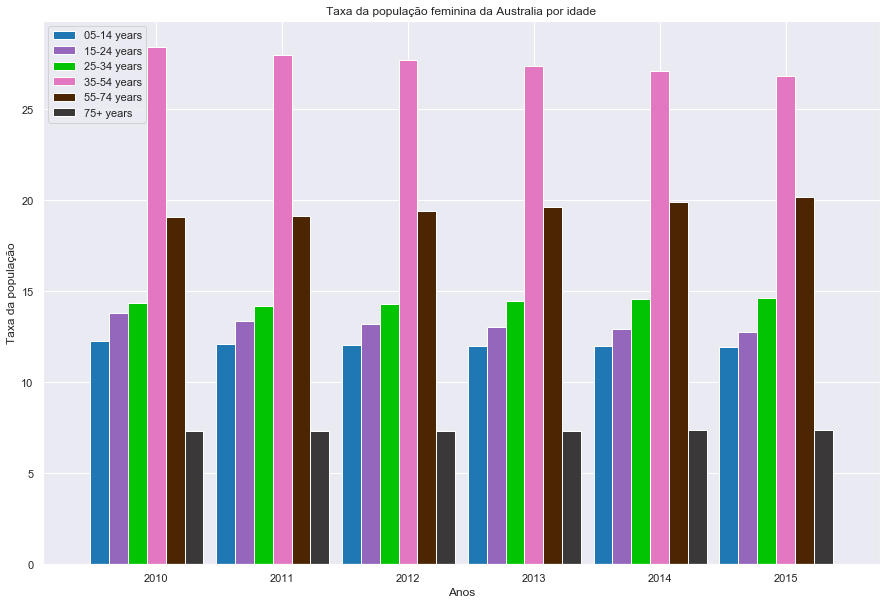

In [79]:
generate_chart_rate_population_age(australia_female, "Taxa da população", "Anos", "Taxa da população feminina da Australia por idade", "totalPopulationFemale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



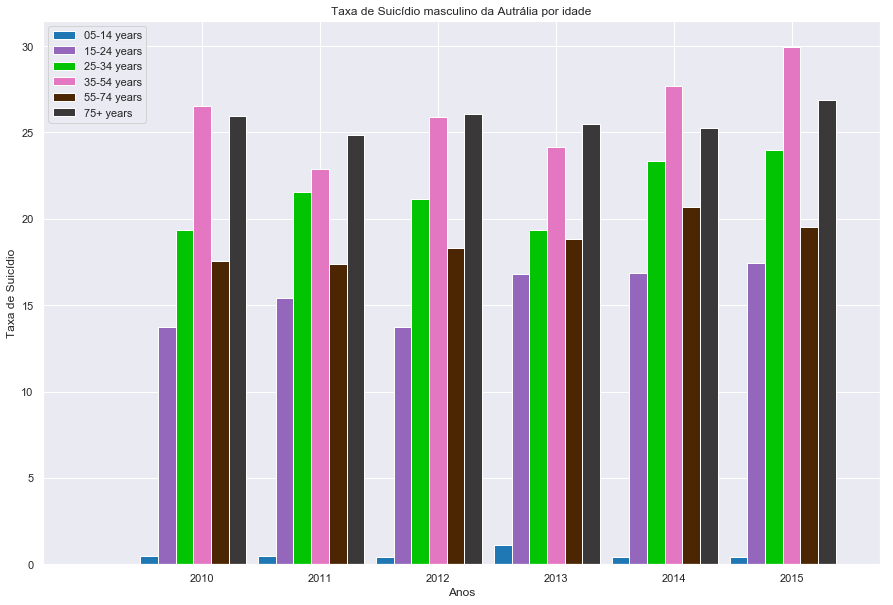

In [80]:
generate_chart_suicide_age(australia_male, "Taxa de Suicídio", "Anos", "Taxa de Suicídio masculino da Autrália por idade",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



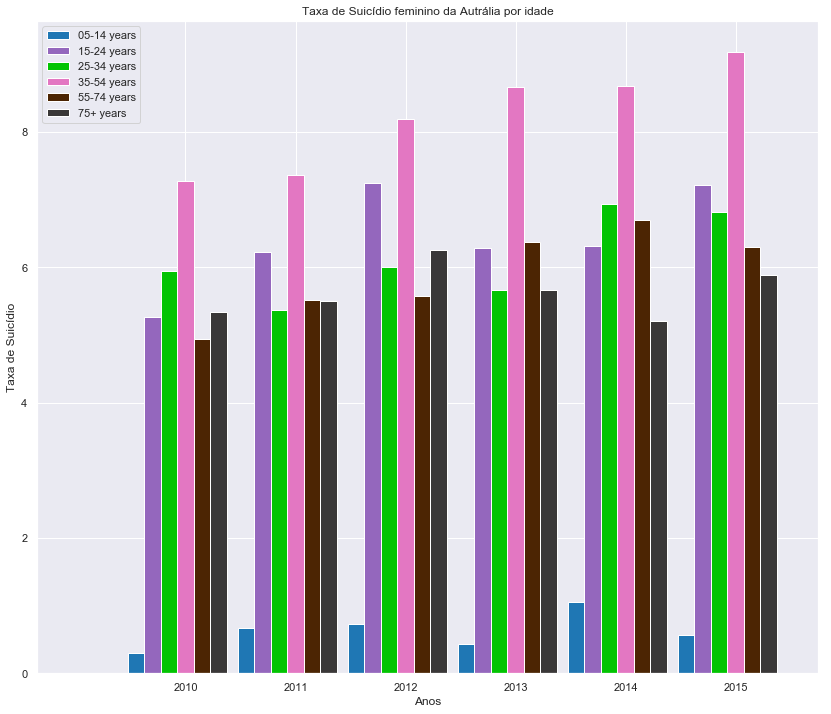

In [81]:
generate_chart_suicide_age(australia_female, "Taxa de Suicídio", "Anos", "Taxa de Suicídio feminino da Autrália por idade",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



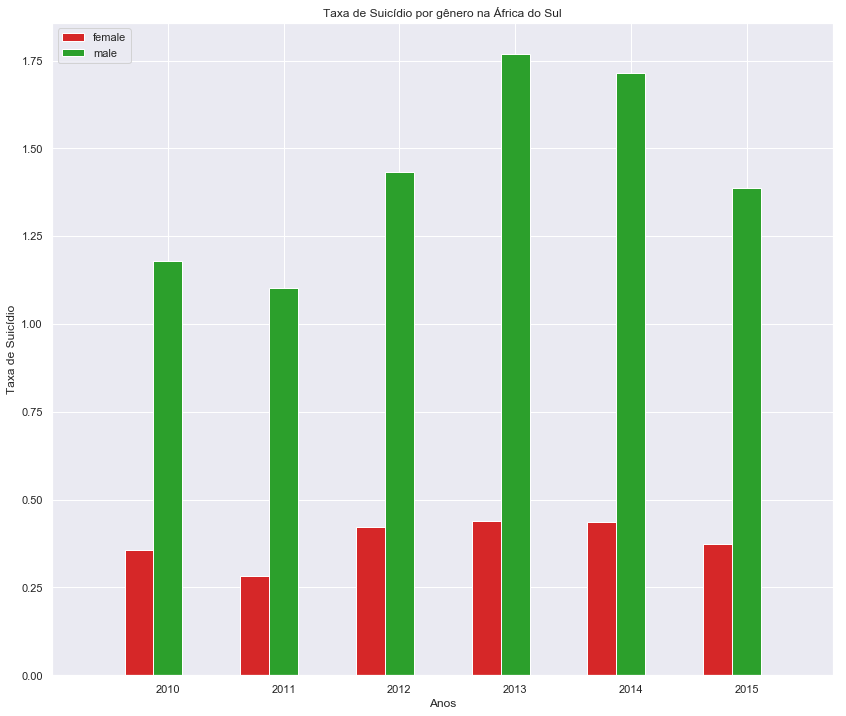

In [82]:
generate_chart_suicide_gen(gsa, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero na África do Sul",male_female_colors, 0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



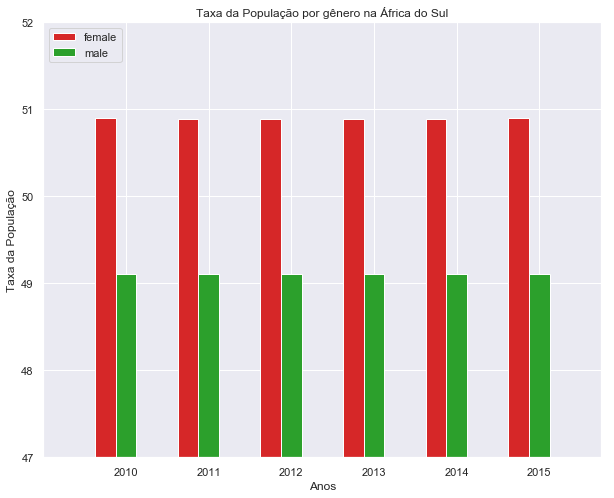

In [83]:
generate_chart_rate_population_gen(gsa, "Taxa da População", "Anos", "Taxa da População por gênero na África do Sul",male_female_colors,47,52,0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



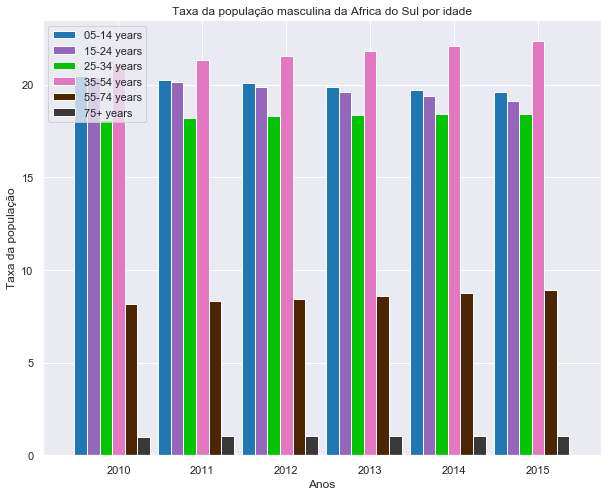

In [84]:
generate_chart_rate_population_age(southAfrica_male, "Taxa da população", "Anos", "Taxa da população masculina da Africa do Sul por idade", "totalPopulationMale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



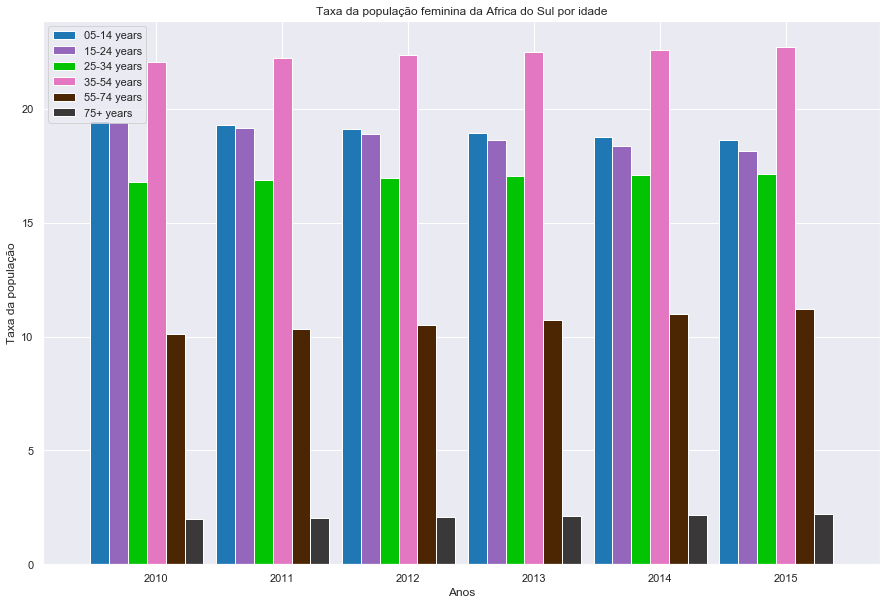

In [85]:
generate_chart_rate_population_age(southAfrica_female, "Taxa da população", "Anos", "Taxa da população feminina da Africa do Sul por idade", "totalPopulationFemale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



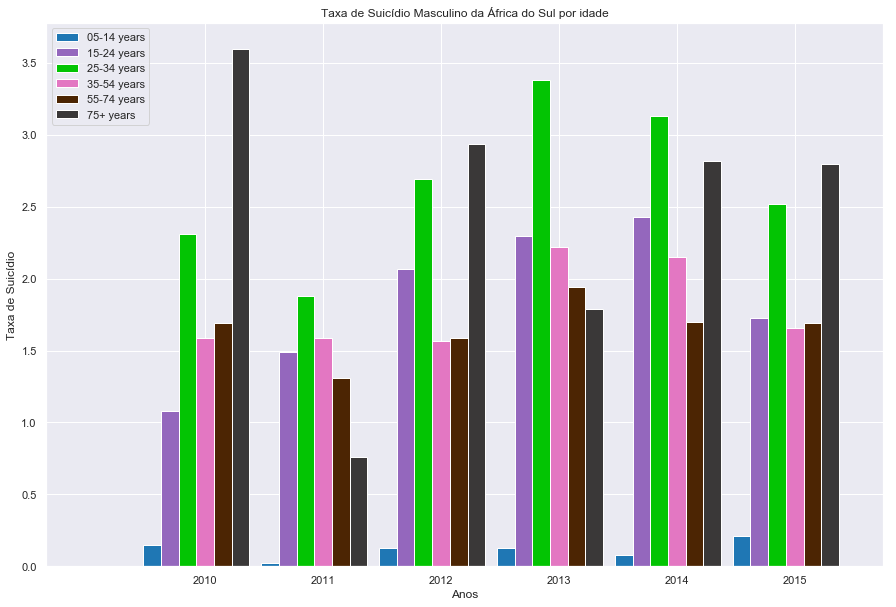

In [86]:
generate_chart_suicide_age(southAfrica_male, "Taxa de Suicídio", "Anos", "Taxa de Suicídio Masculino da África do Sul por idade",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



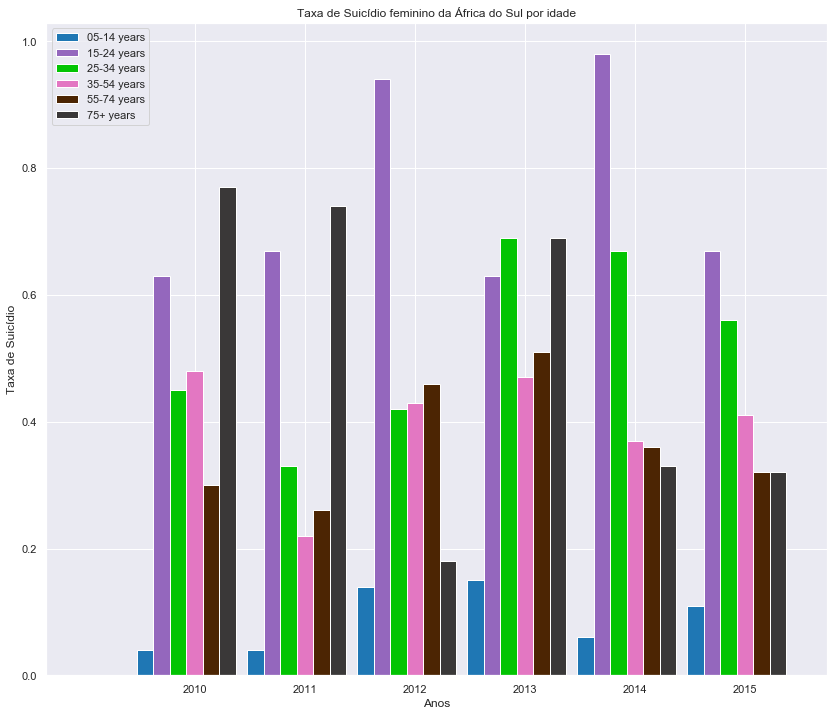

In [87]:
generate_chart_suicide_age(southAfrica_female, "Taxa de Suicídio", "Anos", "Taxa de Suicídio feminino da África do Sul por idade",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



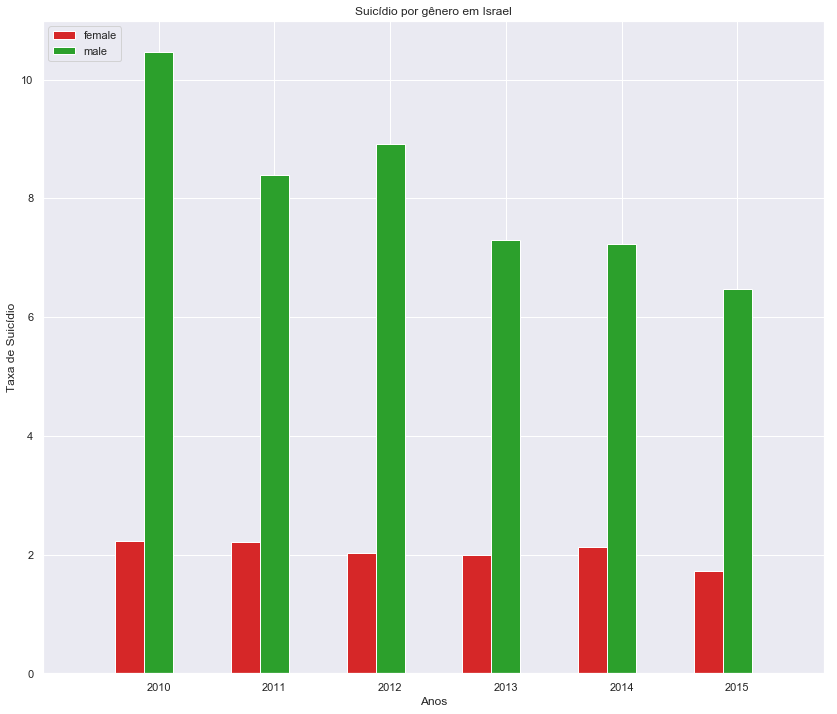

In [88]:
generate_chart_suicide_gen(gis, "Taxa de Suicídio", "Anos", "Suicídio por gênero em Israel",male_female_colors, 0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



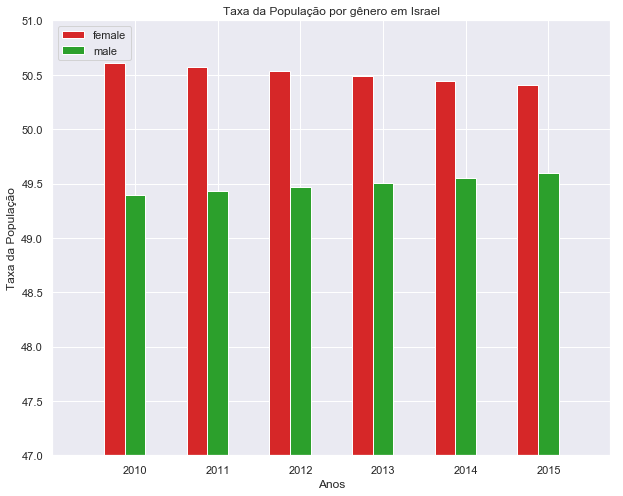

In [89]:
generate_chart_rate_population_gen(gis, "Taxa da População", "Anos", "Taxa da População por gênero em Israel",male_female_colors,47,51,0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



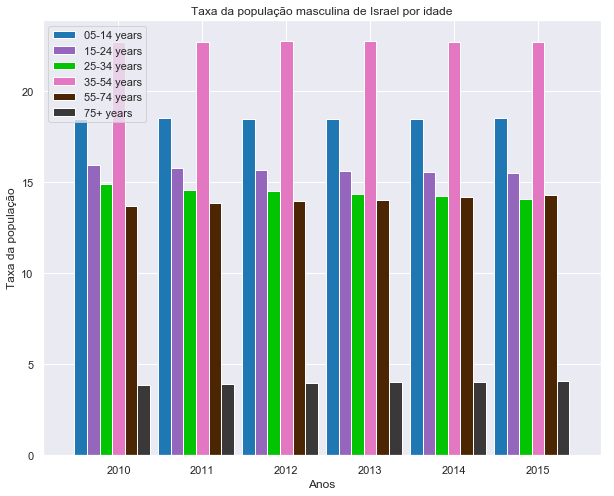

In [90]:
generate_chart_rate_population_age(israel_male, "Taxa da população", "Anos", "Taxa da população masculina de Israel por idade", "totalPopulationMale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



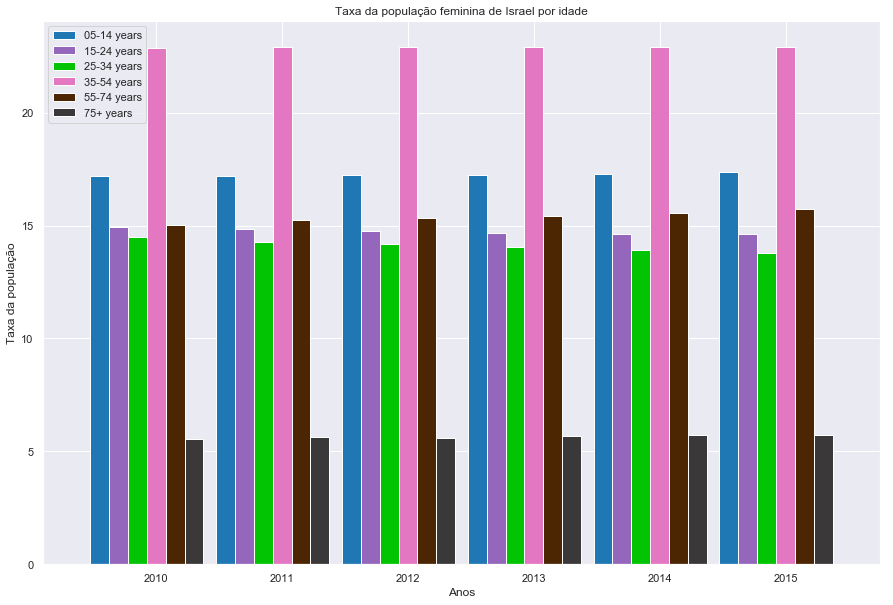

In [91]:
generate_chart_rate_population_age(israel_female, "Taxa da população", "Anos", "Taxa da população feminina de Israel por idade", "totalPopulationFemale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



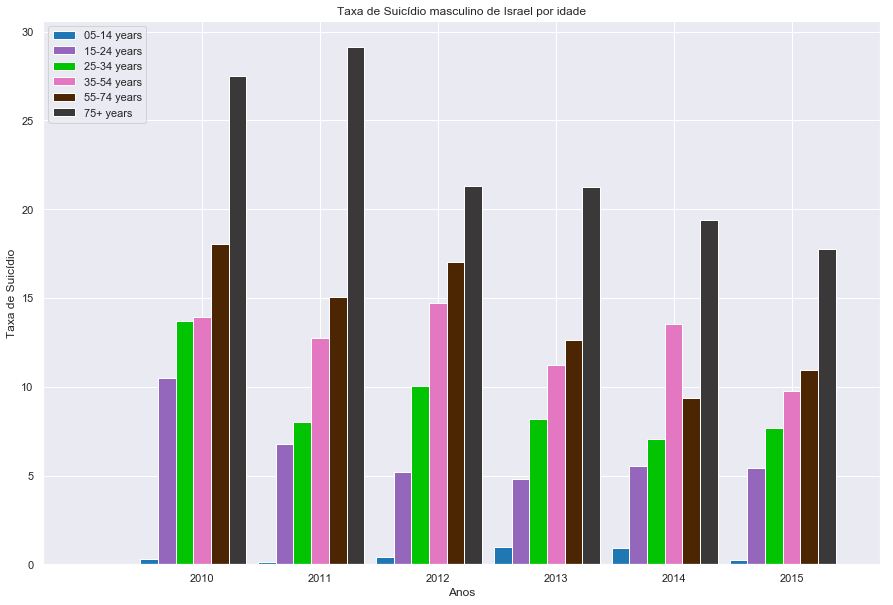

In [92]:
generate_chart_suicide_age(israel_male, "Taxa de Suicídio", "Anos", "Taxa de Suicídio masculino de Israel por idade",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



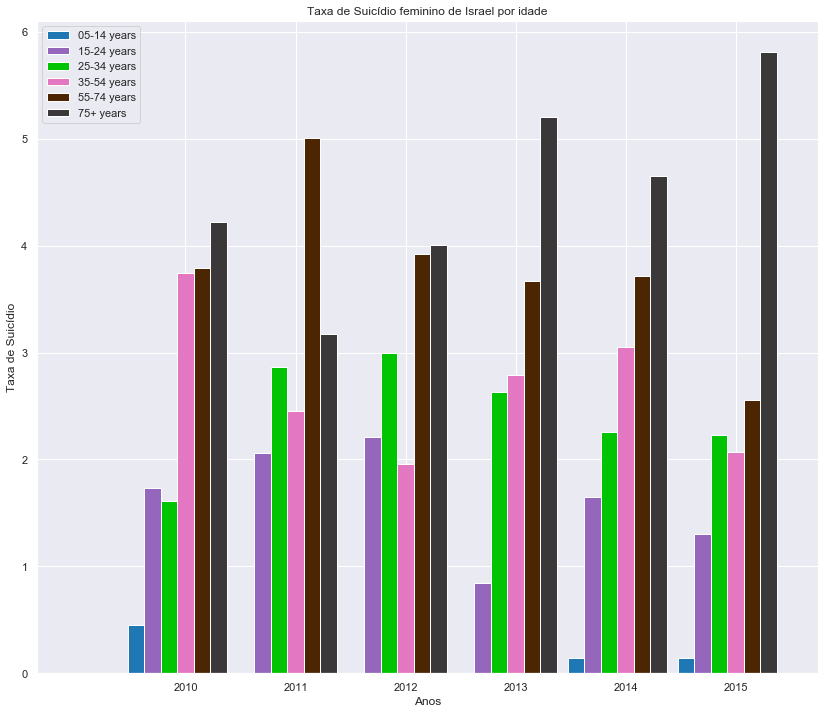

In [93]:
generate_chart_suicide_age(israel_female, "Taxa de Suicídio", "Anos", "Taxa de Suicídio feminino de Israel por idade",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



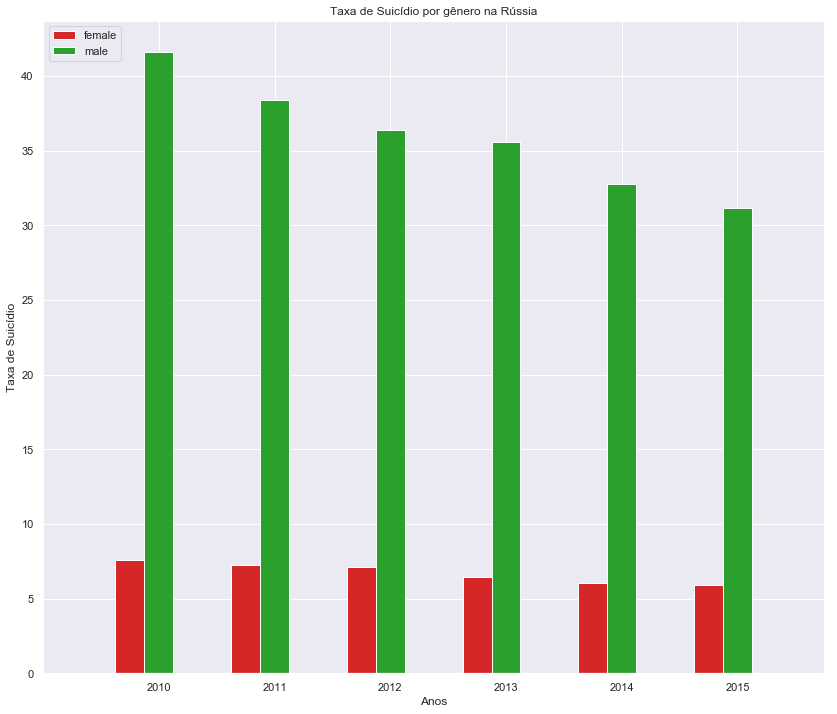

In [94]:
generate_chart_suicide_gen(gru, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero na Rússia",male_female_colors, 0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



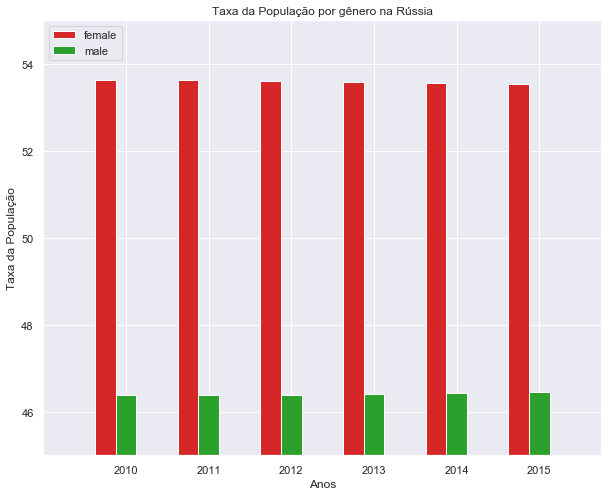

In [95]:
generate_chart_rate_population_gen(gru, "Taxa da População", "Anos", "Taxa da População por gênero na Rússia",male_female_colors,45,55,0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



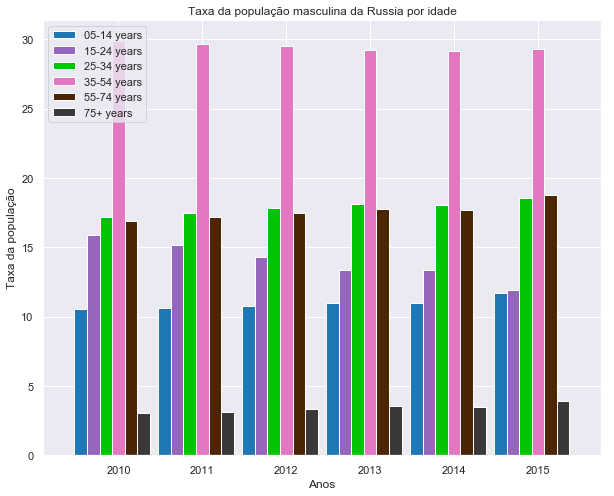

In [96]:
generate_chart_rate_population_age(russia_male, "Taxa da população", "Anos", "Taxa da população masculina da Russia por idade", "totalPopulationMale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



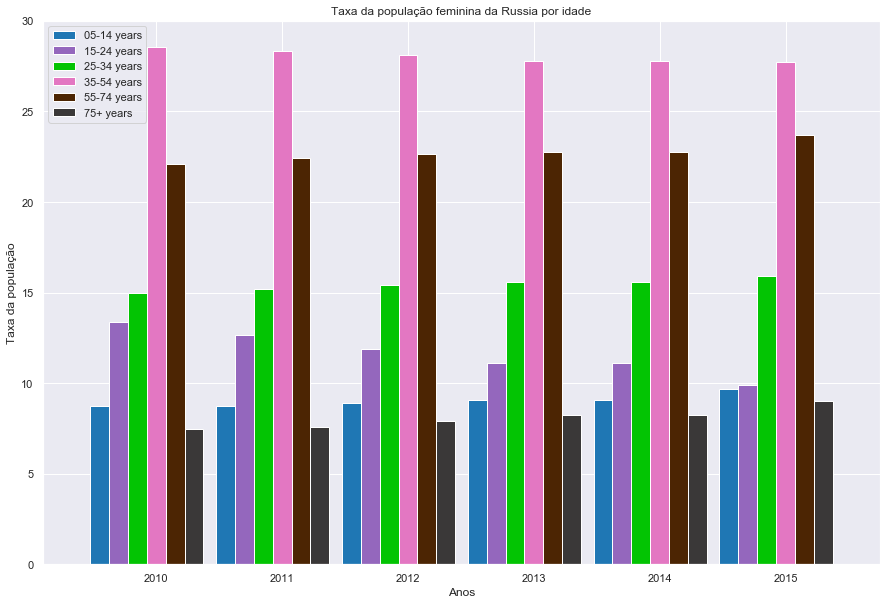

In [97]:
generate_chart_rate_population_age(russia_female, "Taxa da população", "Anos", "Taxa da população feminina da Russia por idade", "totalPopulationFemale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



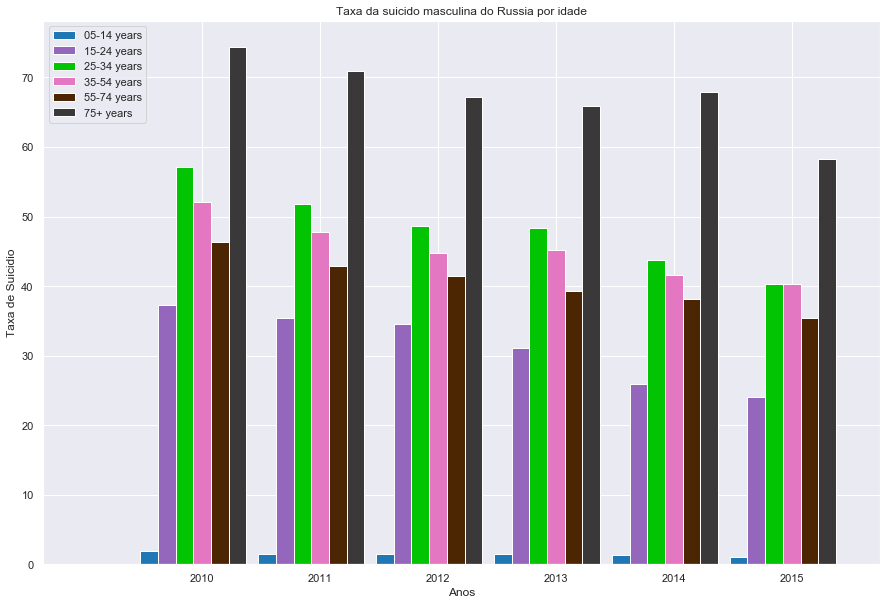

In [98]:
generate_chart_suicide_age(russia_male, "Taxa de Suicidio", "Anos", "Taxa da suicido masculina do Russia por idade",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



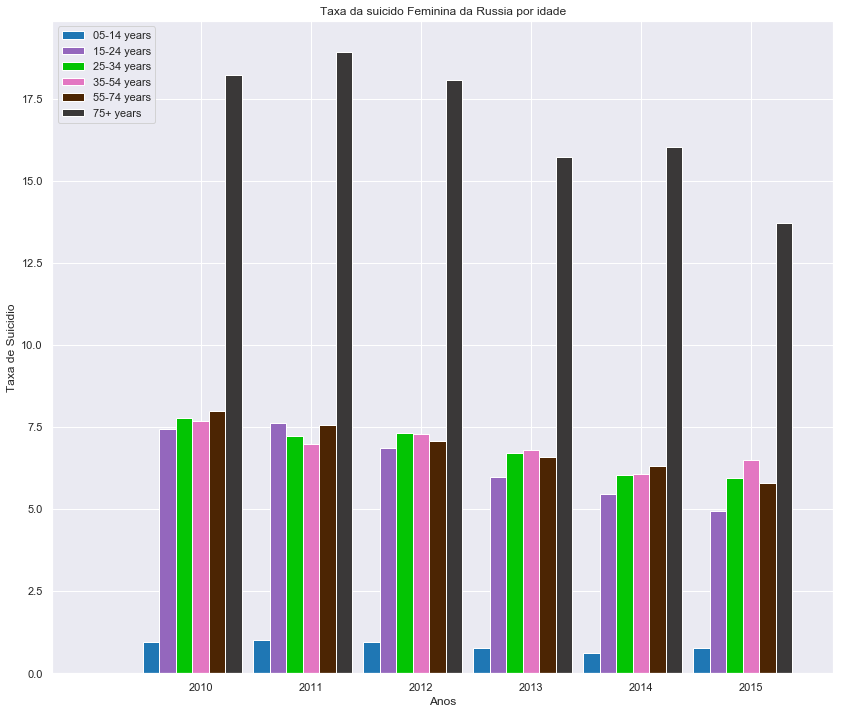

In [99]:
generate_chart_suicide_age(russia_female, "Taxa de Suicidio", "Anos", "Taxa da suicido Feminina da Russia por idade",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



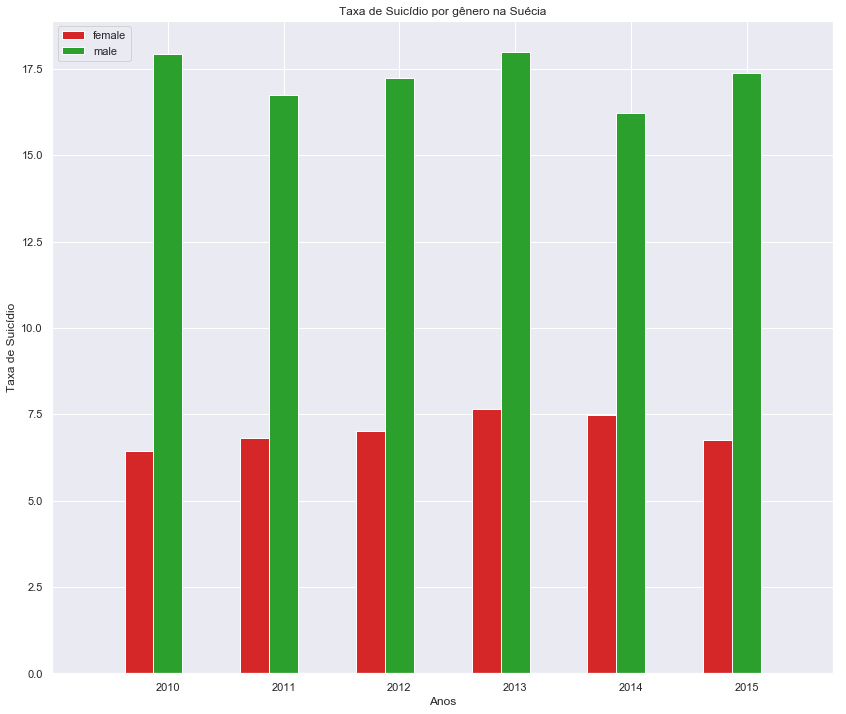

In [100]:
generate_chart_suicide_gen(gsw, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero na Suécia",male_female_colors, 0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



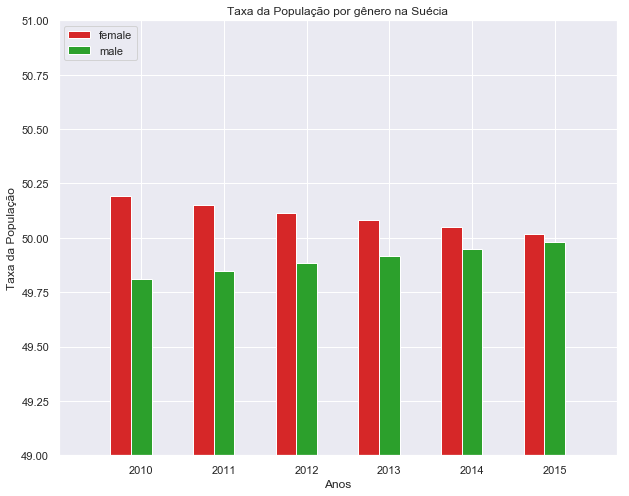

In [101]:
generate_chart_rate_population_gen(gsw, "Taxa da População", "Anos", "Taxa da População por gênero na Suécia",male_female_colors,49,51,0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



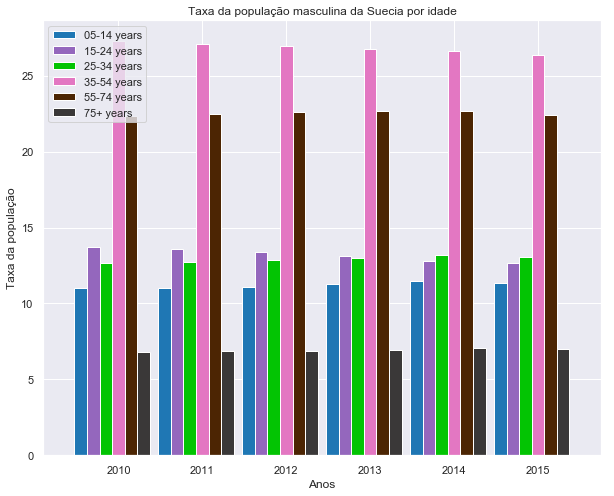

In [102]:
generate_chart_rate_population_age(sweden_male, "Taxa da população", "Anos", "Taxa da população masculina da Suecia por idade", "totalPopulationMale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



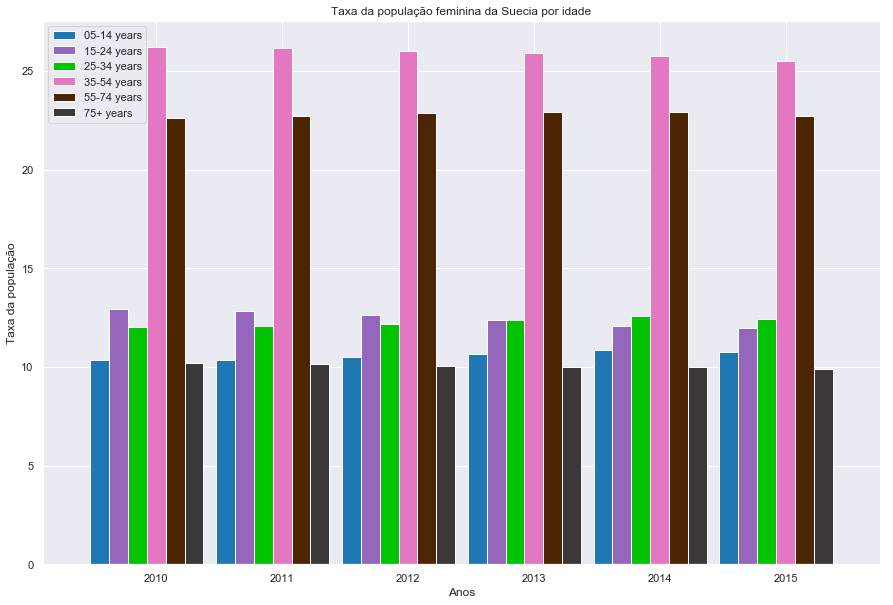

In [103]:
generate_chart_rate_population_age(sweden_female, "Taxa da população", "Anos", "Taxa da população feminina da Suecia por idade", "totalPopulationFemale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



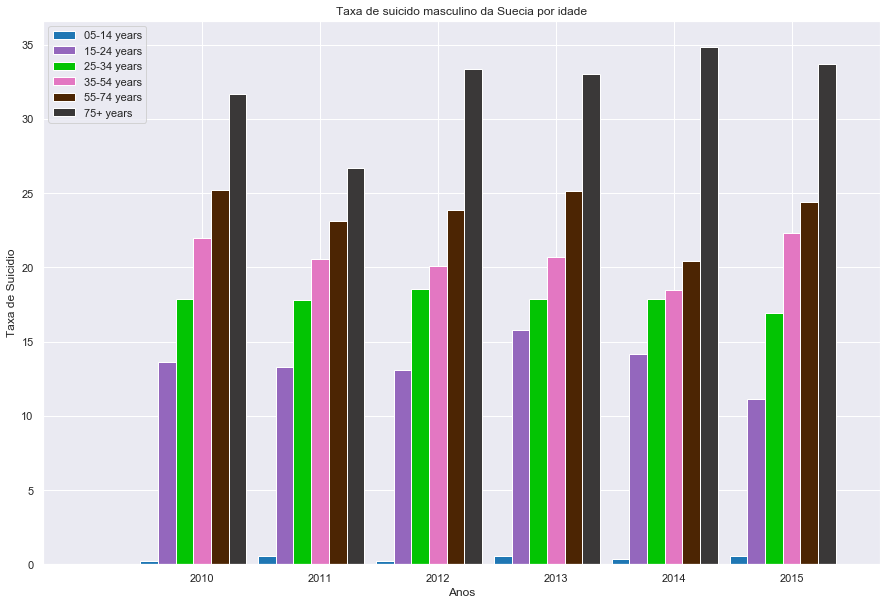

In [104]:
generate_chart_suicide_age(sweden_male, "Taxa de Suicidio", "Anos", "Taxa de suicido masculino da Suecia por idade",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



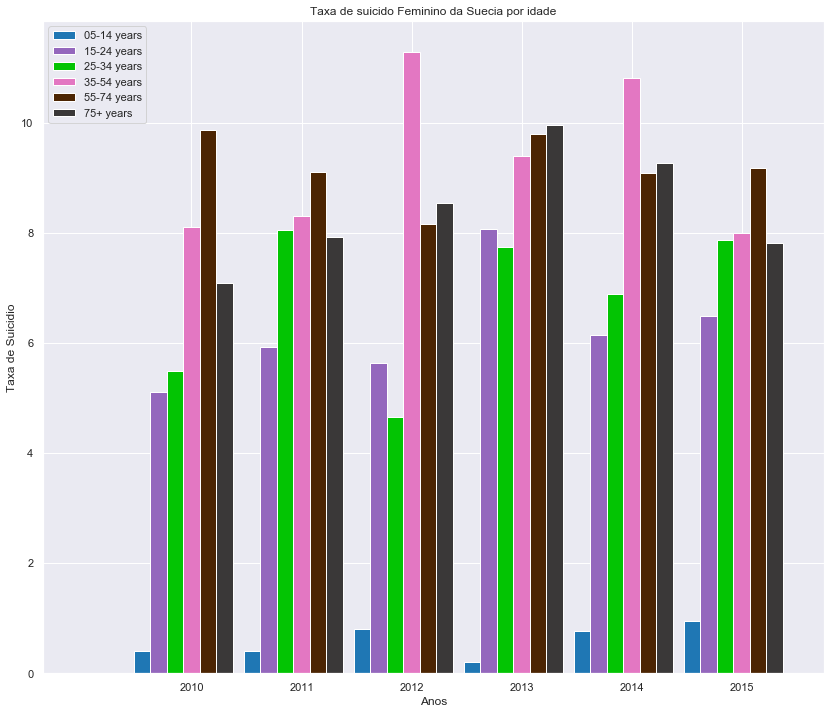

In [105]:
generate_chart_suicide_age(sweden_female, "Taxa de Suicidio", "Anos", "Taxa de suicido Feminino da Suecia por idade",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



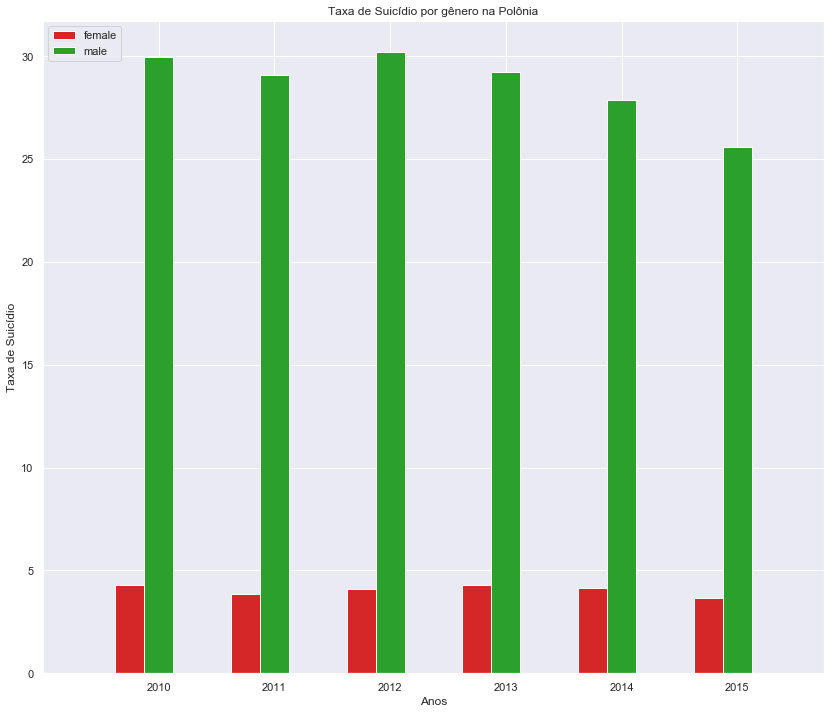

In [106]:
generate_chart_suicide_gen(gpo, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero na Polônia",male_female_colors, 0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



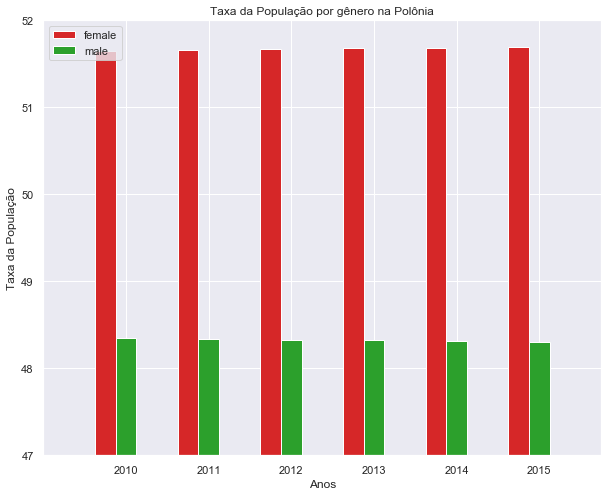

In [107]:
generate_chart_rate_population_gen(gpo, "Taxa da População", "Anos", "Taxa da População por gênero na Polônia",male_female_colors,47,52,0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



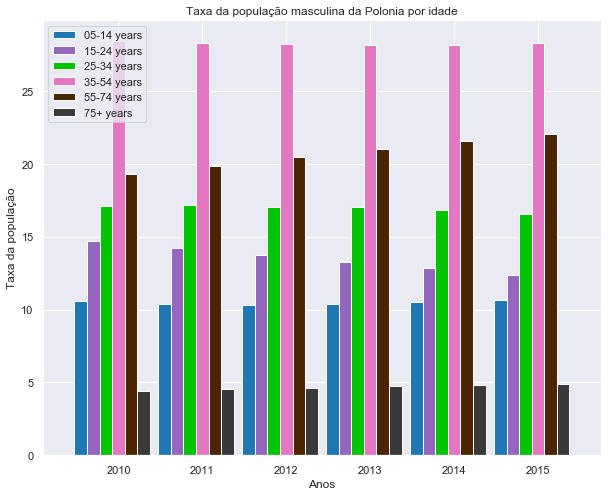

In [108]:
generate_chart_rate_population_age(poland_male, "Taxa da população", "Anos", "Taxa da população masculina da Polonia por idade", "totalPopulationMale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



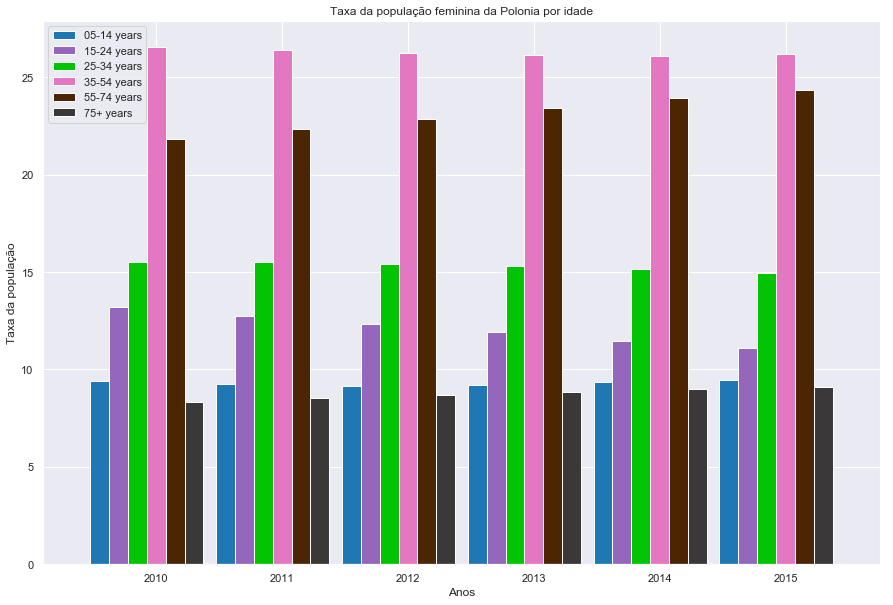

In [109]:
generate_chart_rate_population_age(poland_female, "Taxa da população", "Anos", "Taxa da população feminina da Polonia por idade", "totalPopulationFemale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



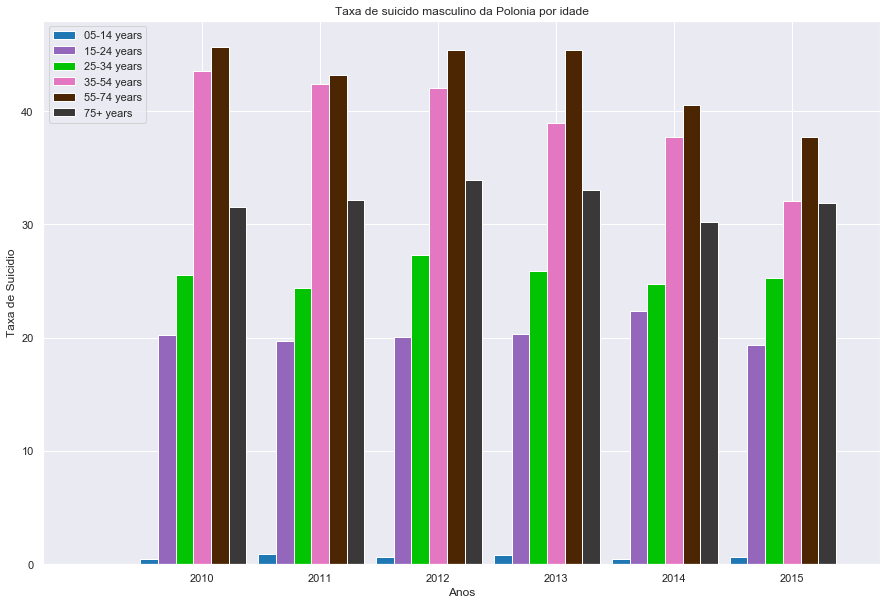

In [110]:
generate_chart_suicide_age(poland_male, "Taxa de Suicidio", "Anos", "Taxa de suicido masculino da Polonia por idade",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



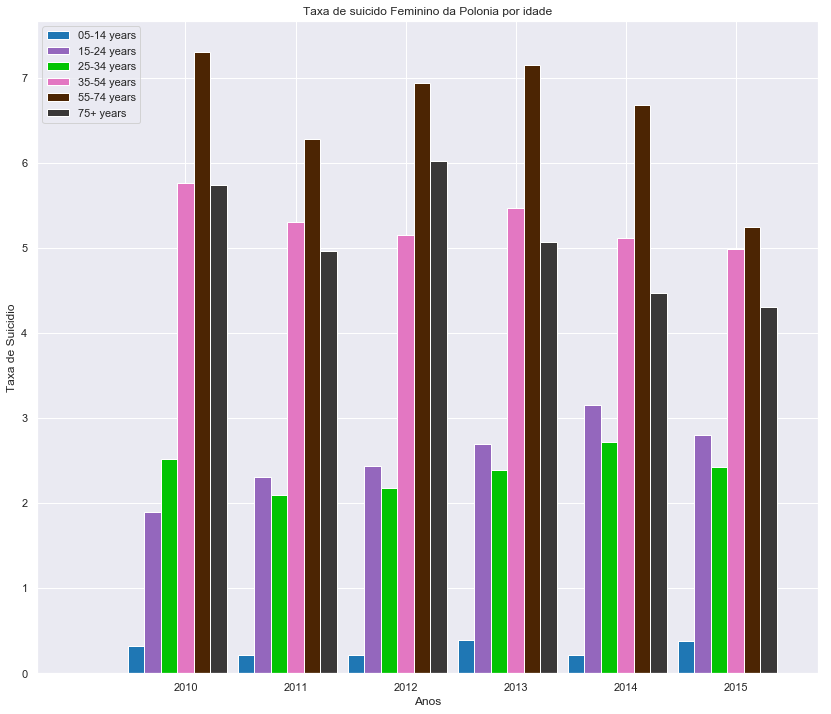

In [111]:
generate_chart_suicide_age(poland_female, "Taxa de Suicidio", "Anos", "Taxa de suicido Feminino da Polonia por idade",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



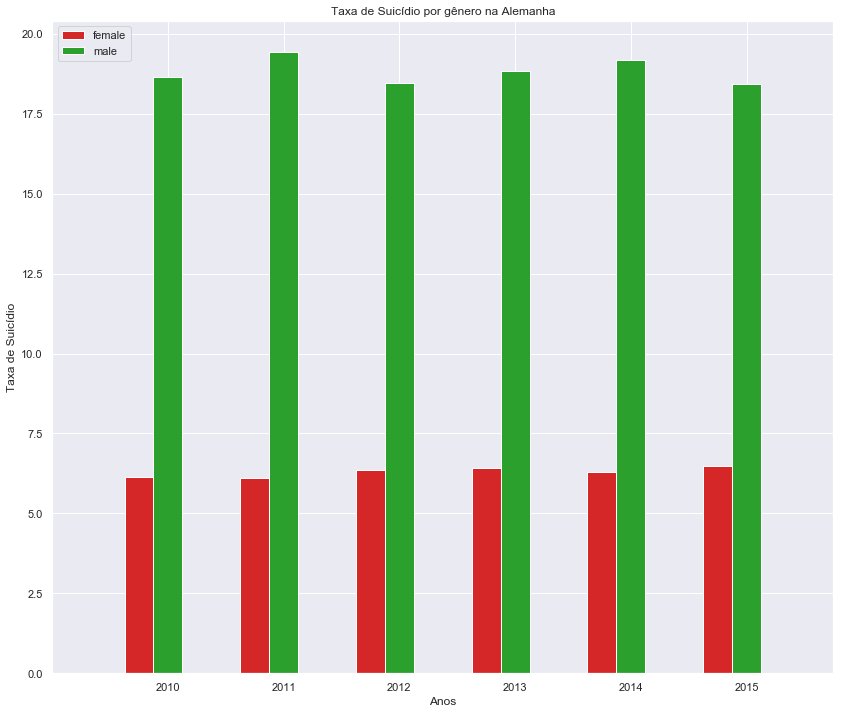

In [112]:
generate_chart_suicide_gen(gge, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero na Alemanha",male_female_colors, 0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



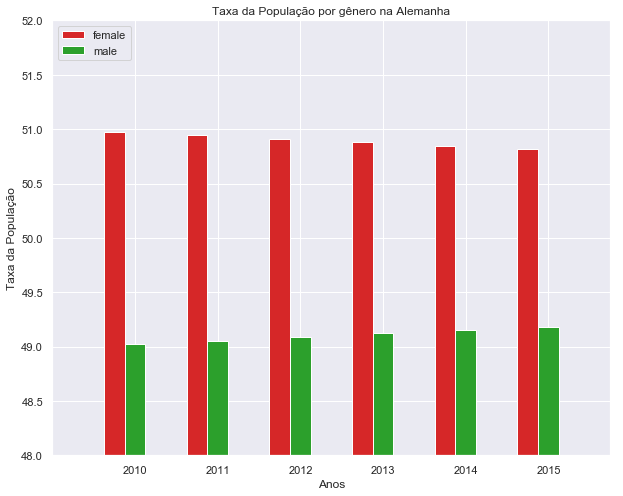

In [113]:
generate_chart_rate_population_gen(gge, "Taxa da População", "Anos", "Taxa da População por gênero na Alemanha",male_female_colors,48,52,0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



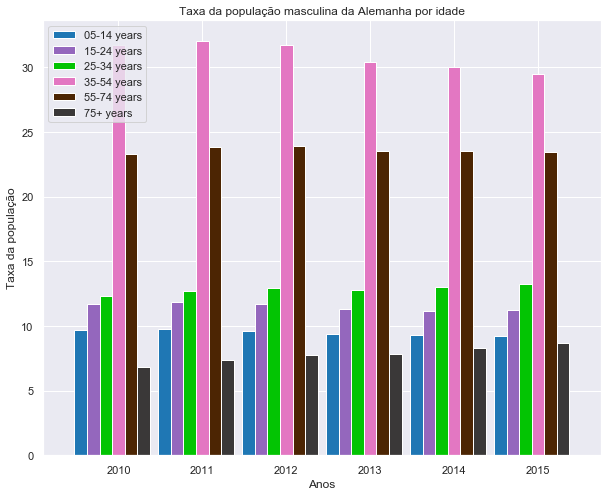

In [114]:
generate_chart_rate_population_age(germany_male, "Taxa da população", "Anos", "Taxa da população masculina da Alemanha por idade", "totalPopulationMale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



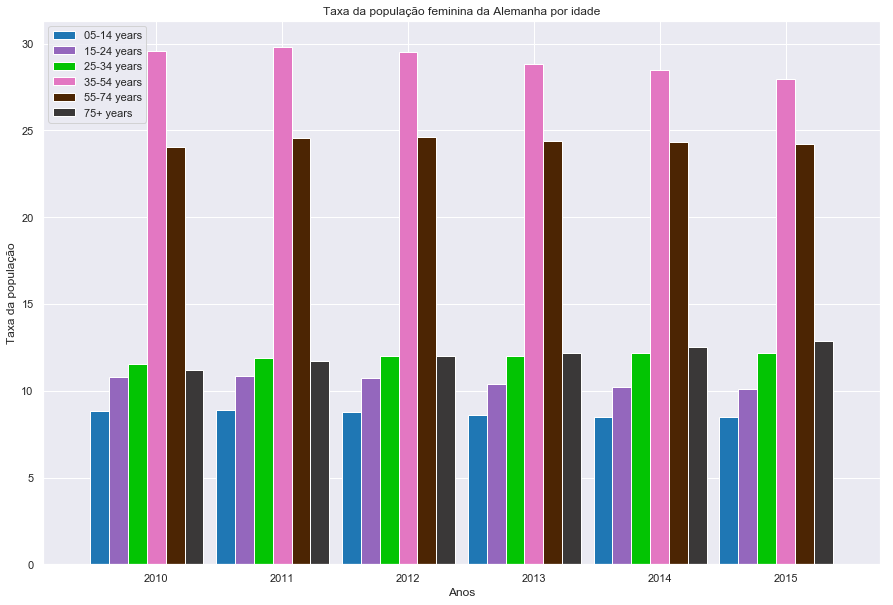

In [115]:
generate_chart_rate_population_age(germany_female, "Taxa da população", "Anos", "Taxa da população feminina da Alemanha por idade", "totalPopulationFemale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



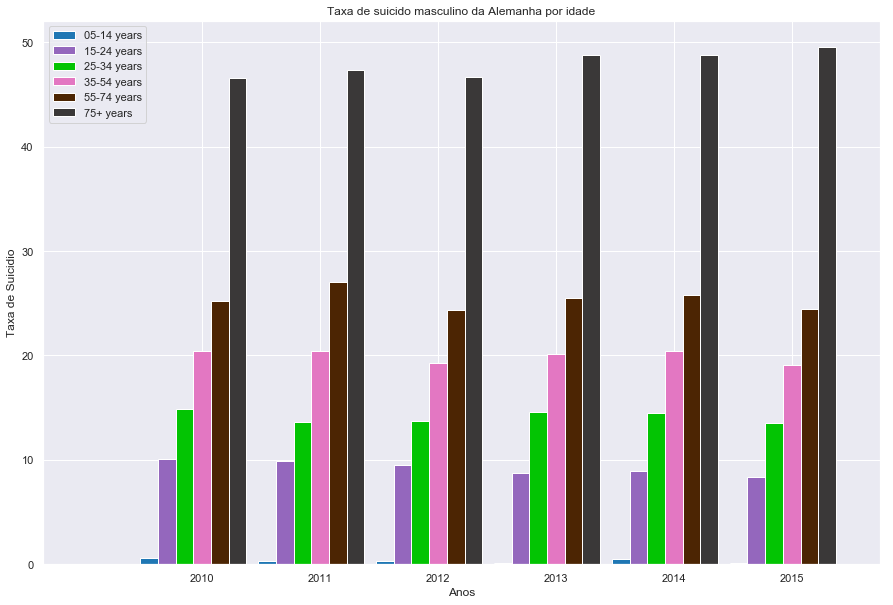

In [116]:
generate_chart_suicide_age(germany_male, "Taxa de Suicidio", "Anos", "Taxa de suicido masculino da Alemanha por idade",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



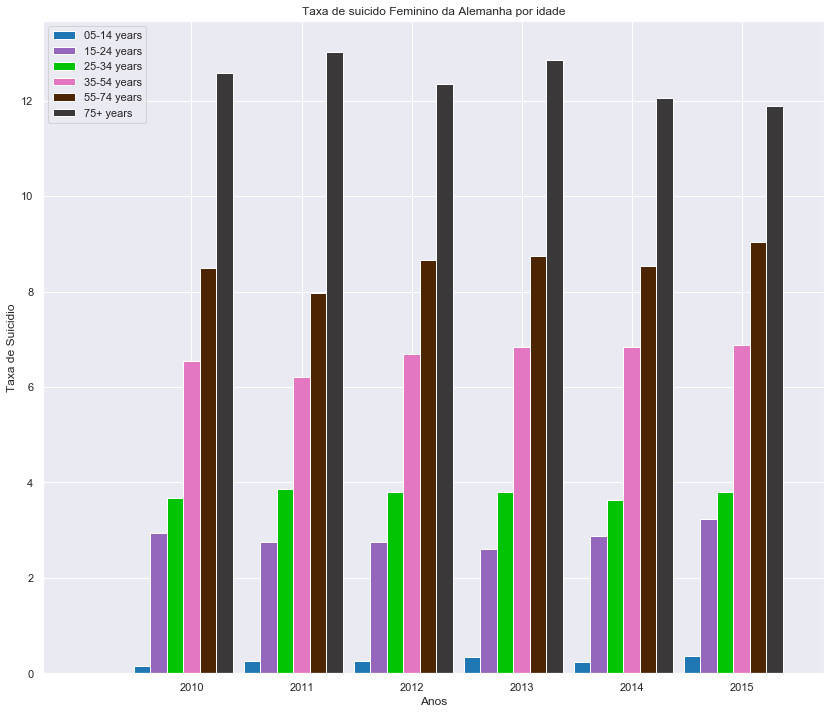

In [117]:
generate_chart_suicide_age(germany_female, "Taxa de Suicidio", "Anos", "Taxa de suicido Feminino da Alemanha por idade",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



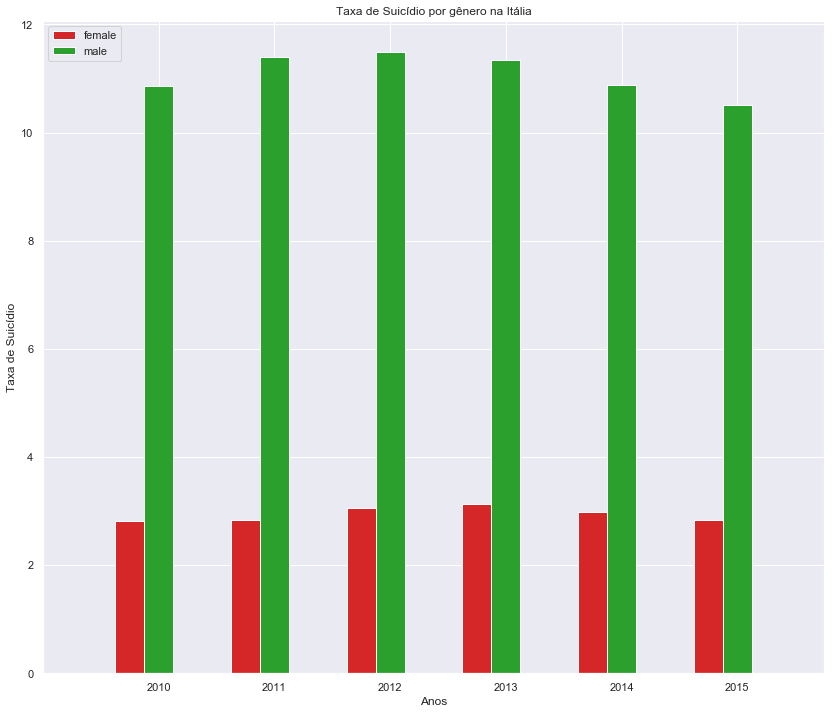

In [118]:
generate_chart_suicide_gen(git, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero na Itália",male_female_colors, 0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



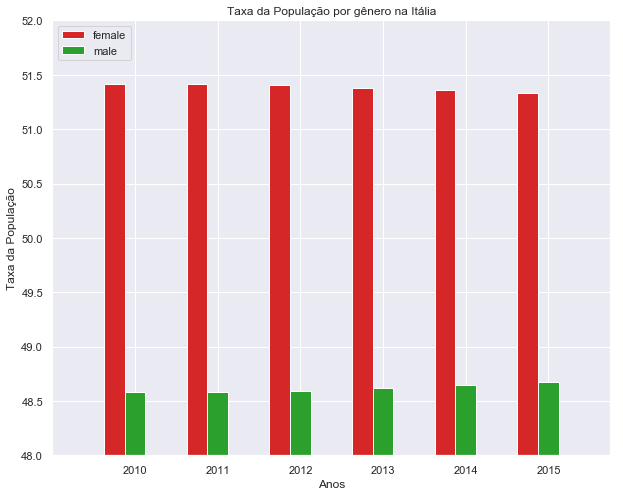

In [119]:
generate_chart_rate_population_gen(git, "Taxa da População", "Anos", "Taxa da População por gênero na Itália",male_female_colors,48,52,0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



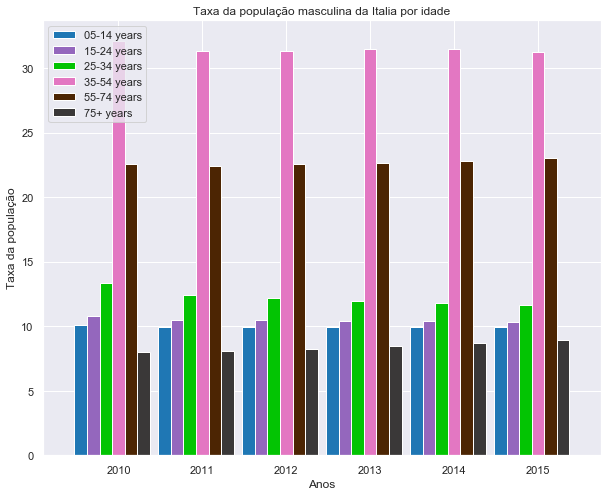

In [120]:
generate_chart_rate_population_age(italy_male, "Taxa da população", "Anos", "Taxa da população masculina da Italia por idade", "totalPopulationMale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



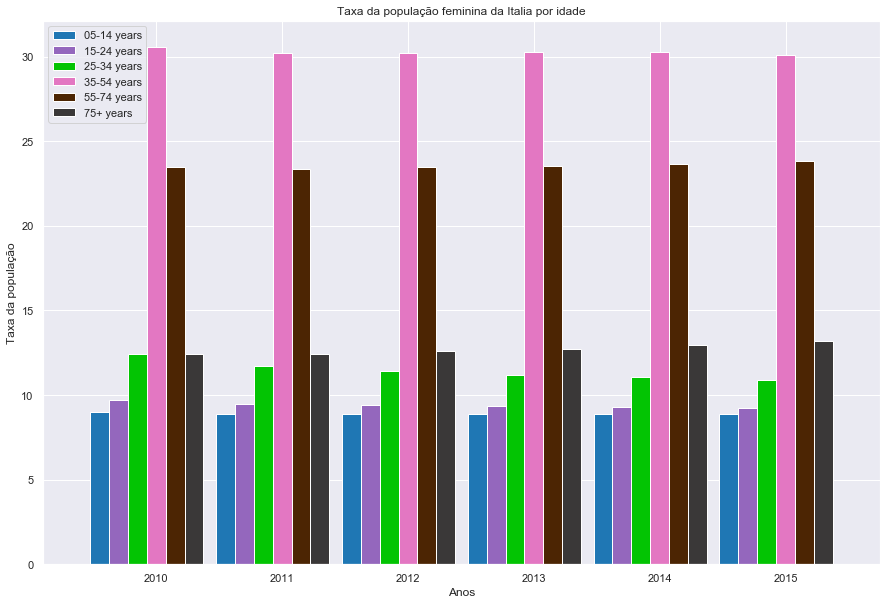

In [121]:
generate_chart_rate_population_age(italy_female, "Taxa da população", "Anos", "Taxa da população feminina da Italia por idade", "totalPopulationFemale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



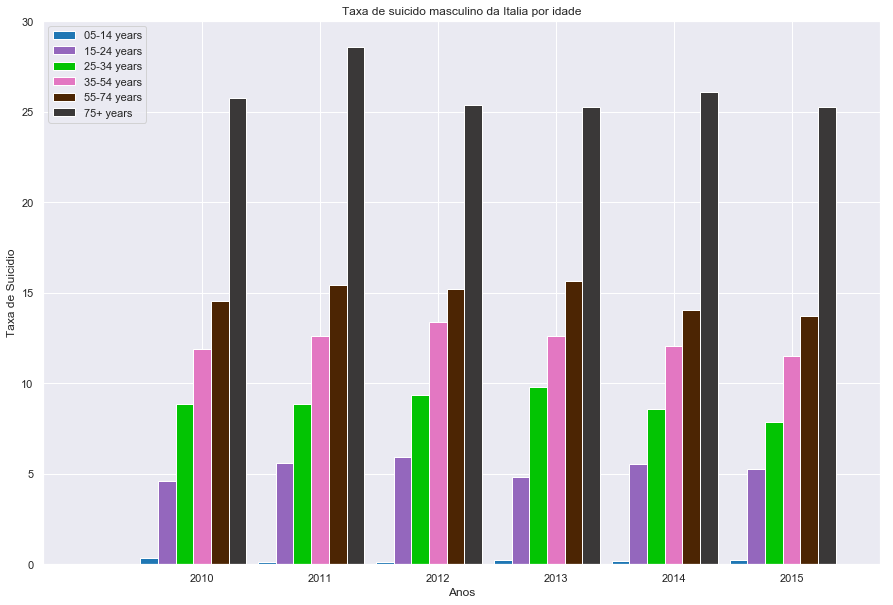

In [122]:
generate_chart_suicide_age(italy_male, "Taxa de Suicidio", "Anos", "Taxa de suicido masculino da Italia por idade",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



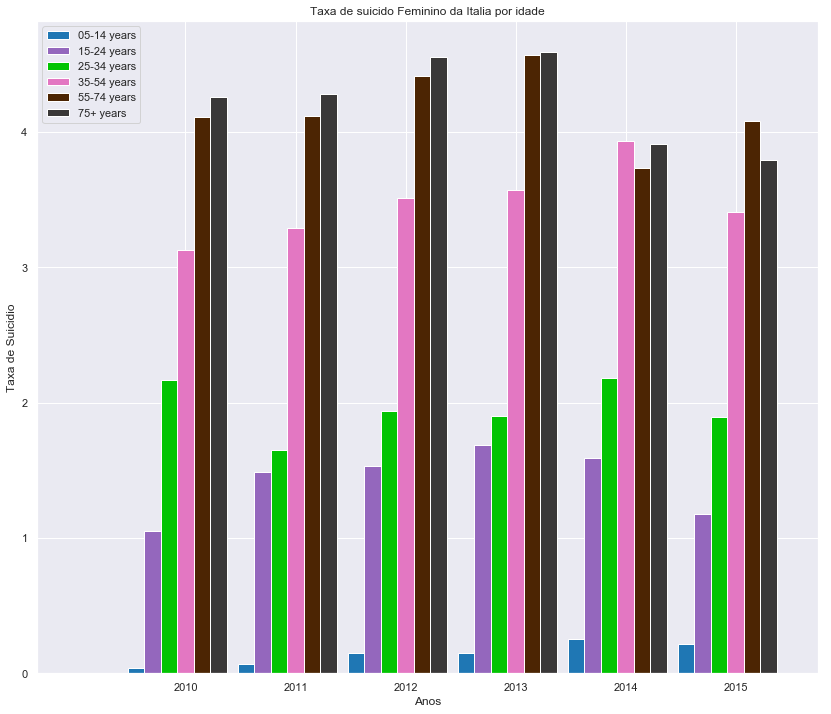

In [123]:
generate_chart_suicide_age(italy_female, "Taxa de Suicidio", "Anos", "Taxa de suicido Feminino da Italia por idade",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



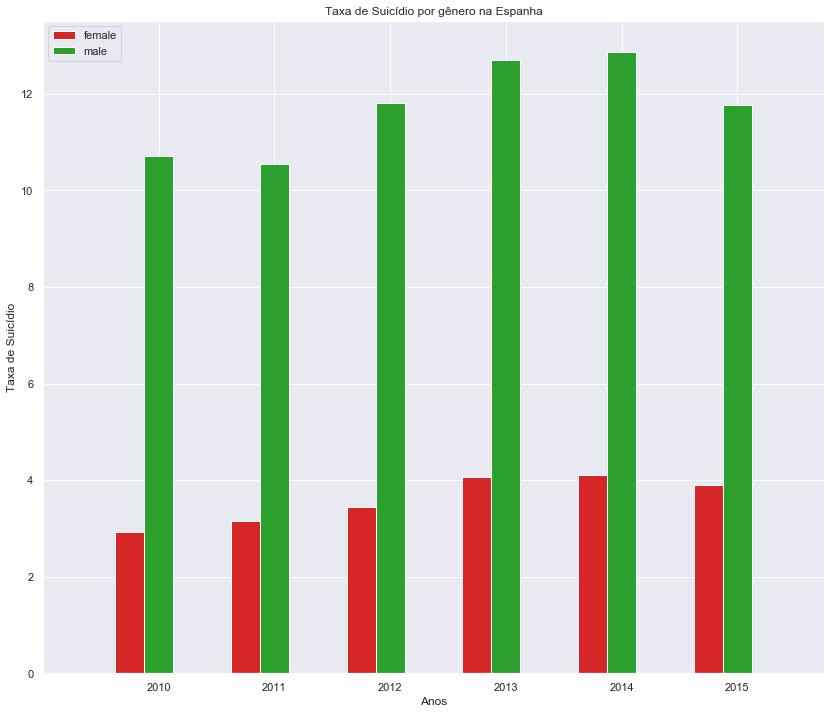

In [124]:
generate_chart_suicide_gen(gsp, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero na Espanha",male_female_colors, 0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



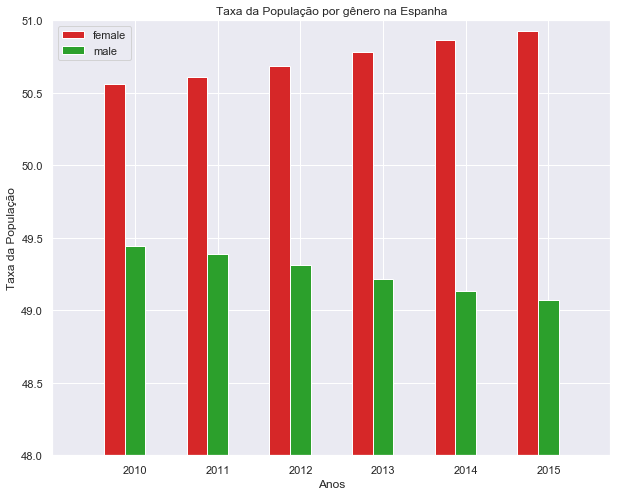

In [125]:
generate_chart_rate_population_gen(gsp, "Taxa da População", "Anos", "Taxa da População por gênero na Espanha",male_female_colors,48,51,0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



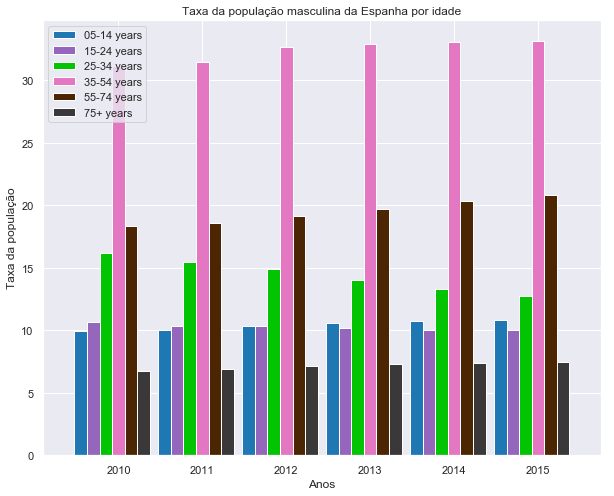

In [126]:
generate_chart_rate_population_age(spain_male, "Taxa da população", "Anos", "Taxa da população masculina da Espanha por idade", "totalPopulationMale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



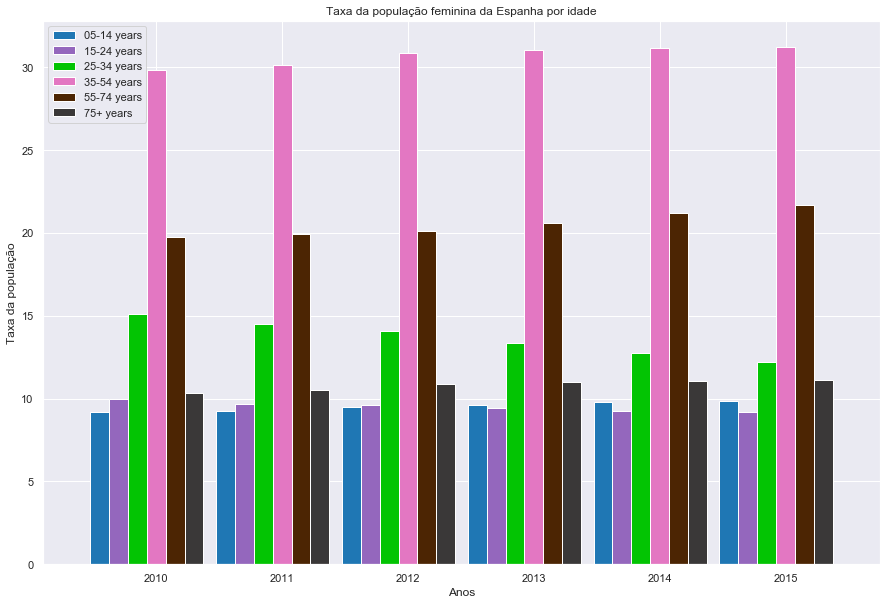

In [127]:
generate_chart_rate_population_age(spain_female, "Taxa da população", "Anos", "Taxa da população feminina da Espanha por idade", "totalPopulationFemale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



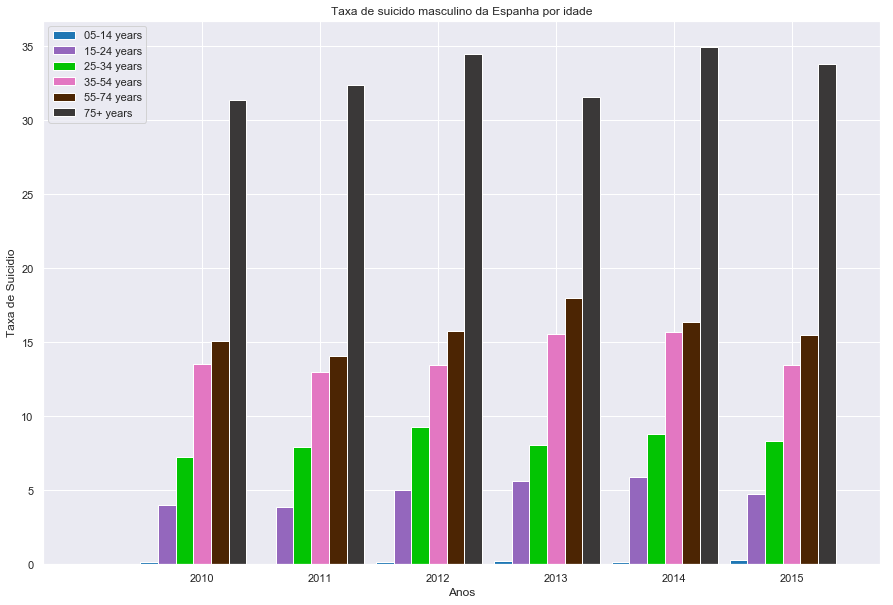

In [128]:
generate_chart_suicide_age(spain_male, "Taxa de Suicidio", "Anos", "Taxa de suicido masculino da Espanha por idade",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



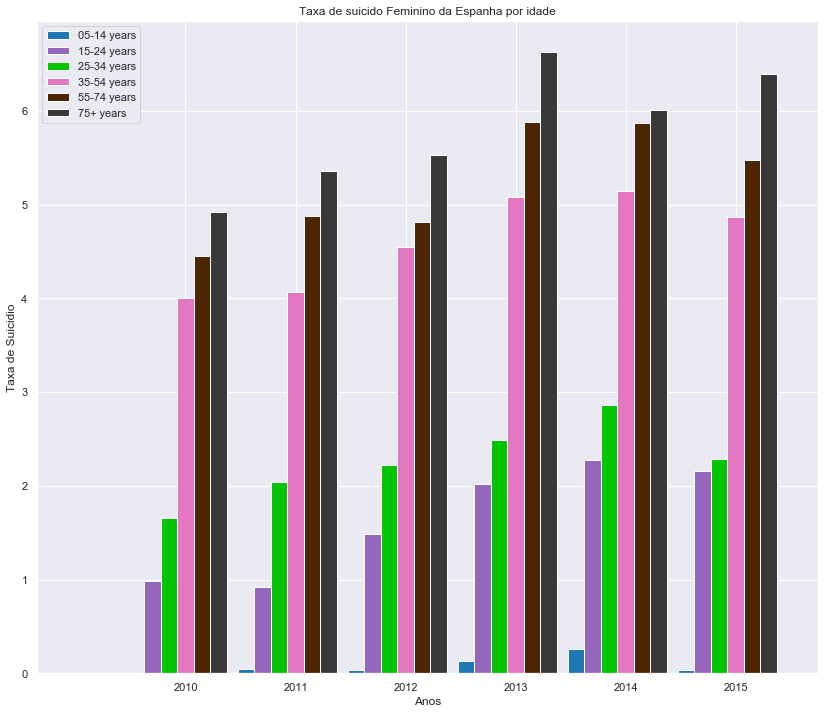

In [129]:
generate_chart_suicide_age(spain_female, "Taxa de Suicidio", "Anos", "Taxa de suicido Feminino da Espanha por idade",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



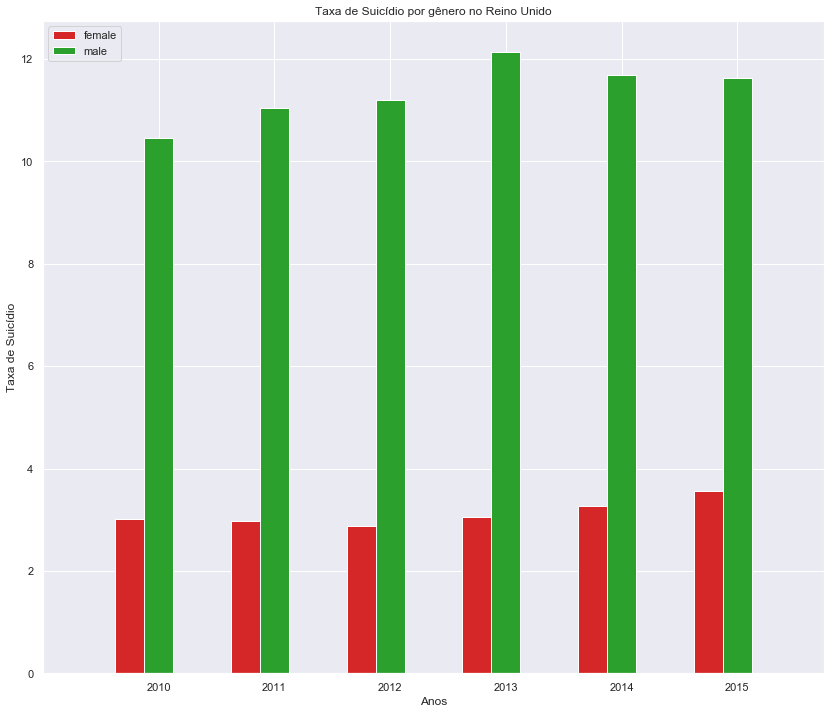

In [130]:
generate_chart_suicide_gen(guk, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero no Reino Unido",male_female_colors, 0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



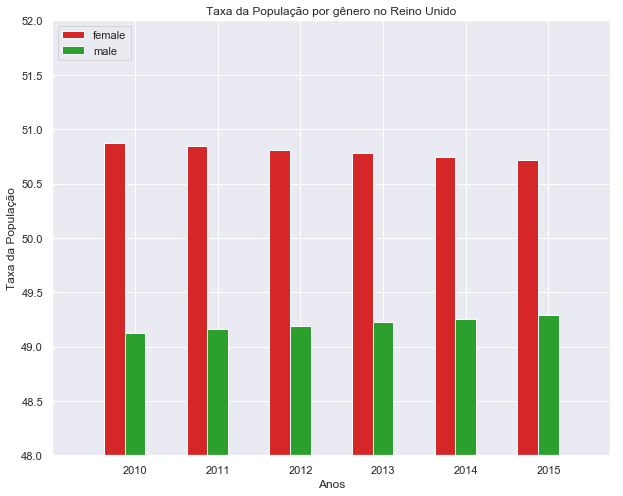

In [131]:
generate_chart_rate_population_gen(guk, "Taxa da População", "Anos", "Taxa da População por gênero no Reino Unido",male_female_colors,48,52,0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



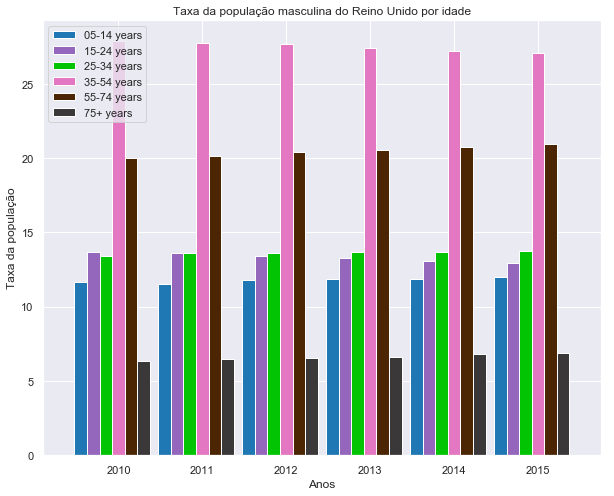

In [132]:
generate_chart_rate_population_age(unitedKingdom_male, "Taxa da população", "Anos", "Taxa da população masculina do Reino Unido por idade", "totalPopulationMale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



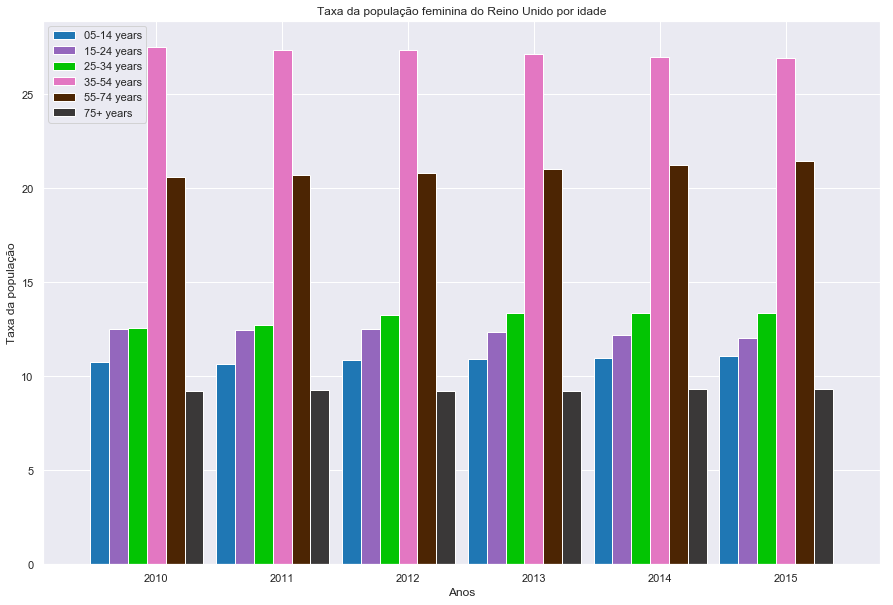

In [133]:
generate_chart_rate_population_age(unitedKingdom_female, "Taxa da população", "Anos", "Taxa da população feminina do Reino Unido por idade", "totalPopulationFemale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



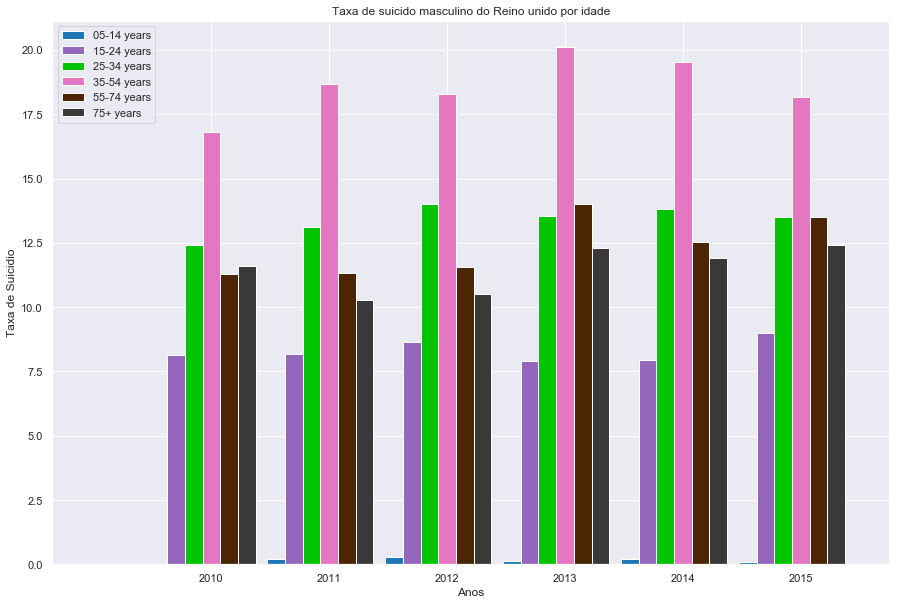

In [134]:
generate_chart_suicide_age(unitedKingdom_male, "Taxa de Suicidio", "Anos", "Taxa de suicido masculino do Reino unido por idade",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



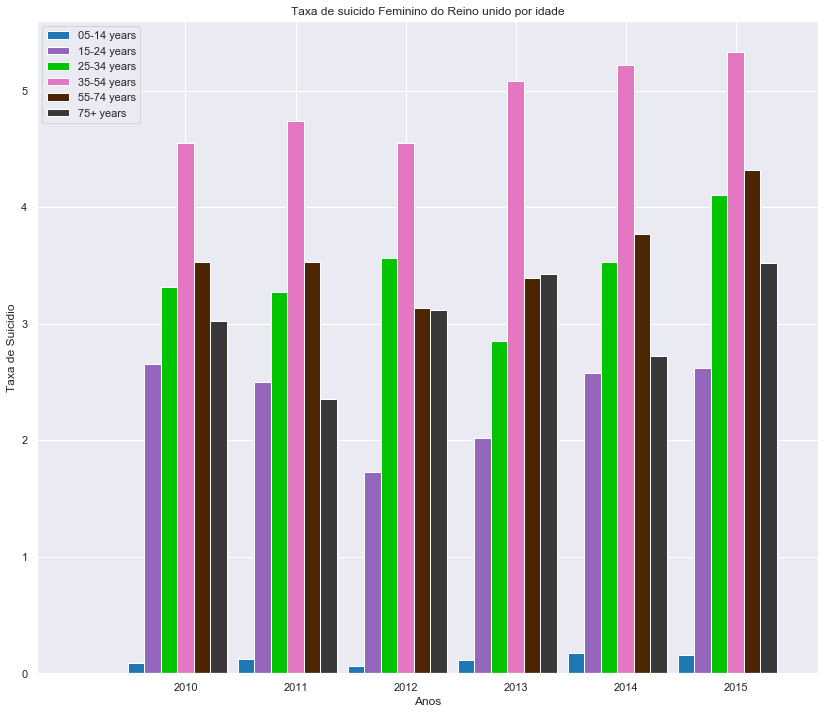

In [135]:
generate_chart_suicide_age(unitedKingdom_female, "Taxa de Suicidio", "Anos", "Taxa de suicido Feminino do Reino unido por idade",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



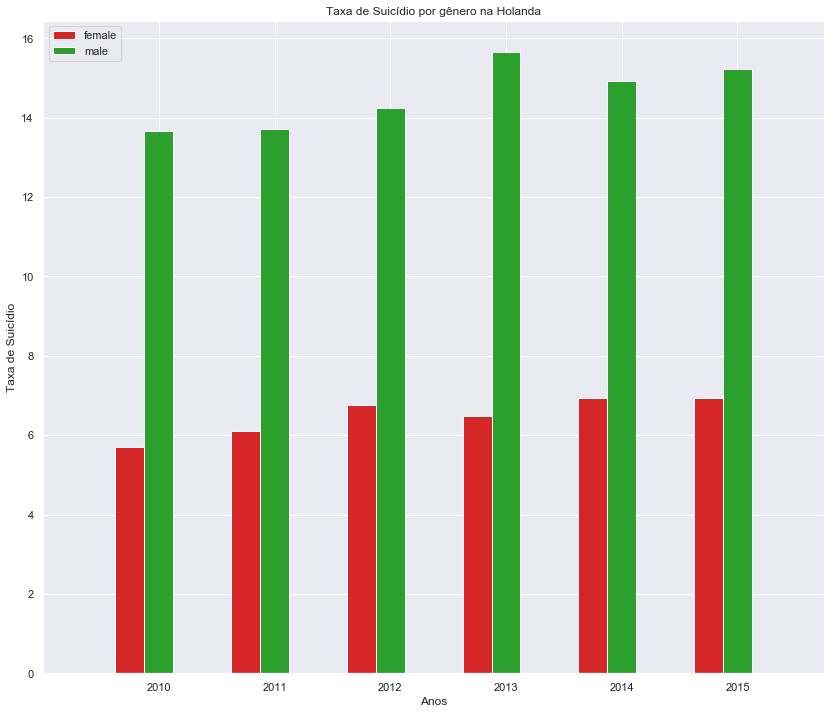

In [136]:
generate_chart_suicide_gen(gne, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero na Holanda",male_female_colors, 0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



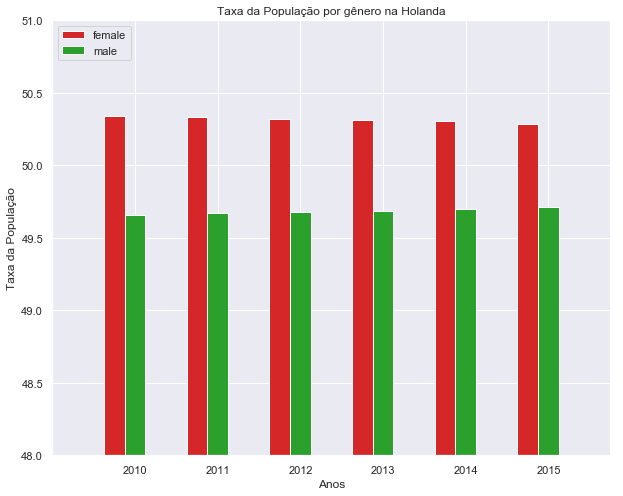

In [137]:
generate_chart_rate_population_gen(gne, "Taxa da População", "Anos", "Taxa da População por gênero na Holanda",male_female_colors,48,51,0.25)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



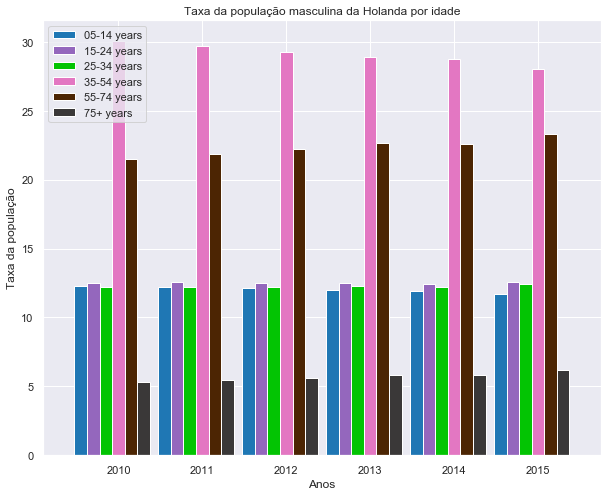

In [138]:
generate_chart_rate_population_age(netherlands_male, "Taxa da população", "Anos", "Taxa da população masculina da Holanda por idade", "totalPopulationMale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



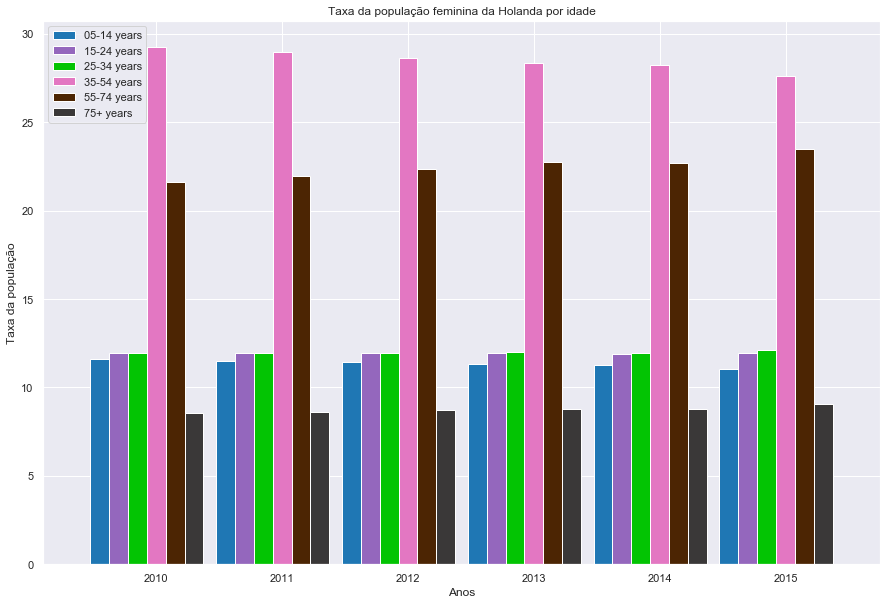

In [139]:
generate_chart_rate_population_age(netherlands_female, "Taxa da população", "Anos", "Taxa da população feminina da Holanda por idade", "totalPopulationFemale",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



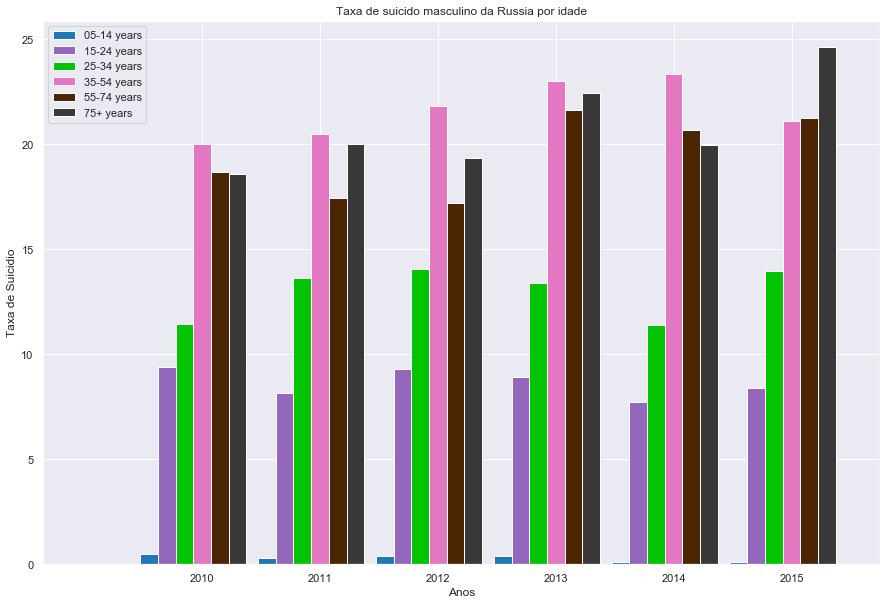

In [140]:
generate_chart_suicide_age(netherlands_male, "Taxa de Suicidio", "Anos", "Taxa de suicido masculino da Russia por idade",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



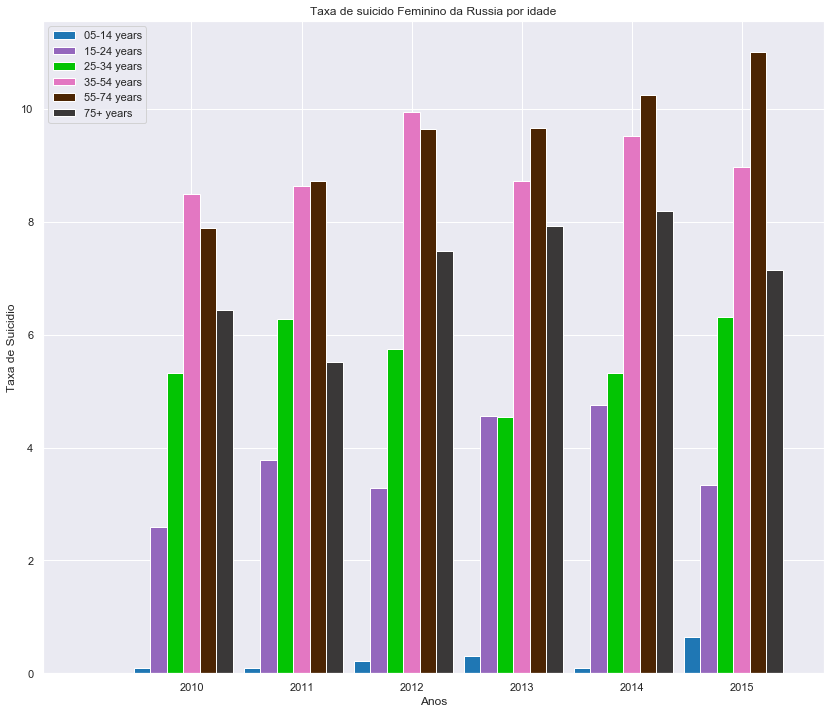

In [141]:
generate_chart_suicide_age(netherlands_female, "Taxa de Suicidio", "Anos", "Taxa de suicido Feminino da Russia por idade",age_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



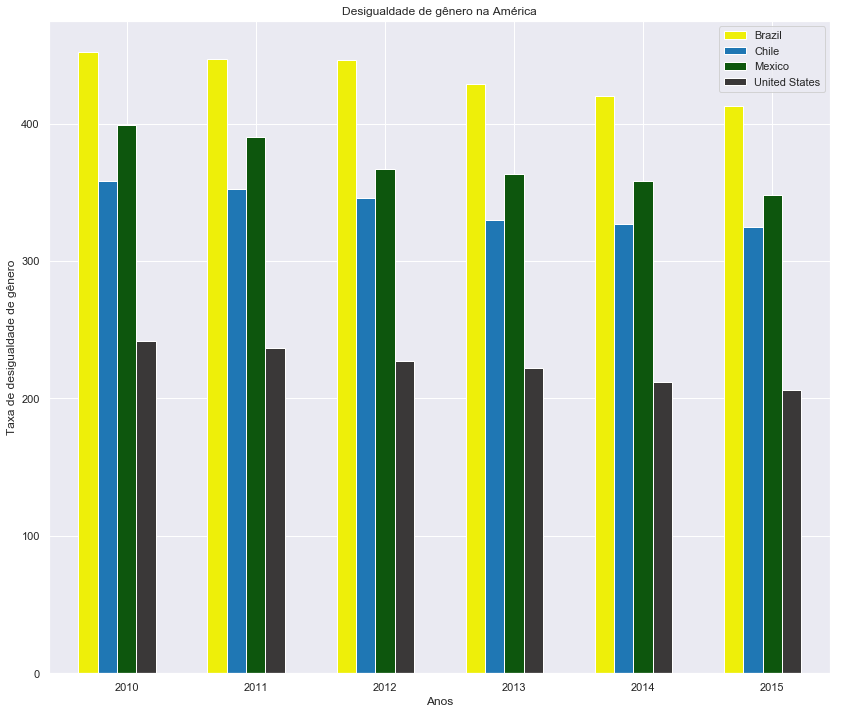

In [142]:
generate_chart_gender_inequality(gamerica,"Taxa de desigualdade de gênero","Anos","Desigualdade de gênero na América", america_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



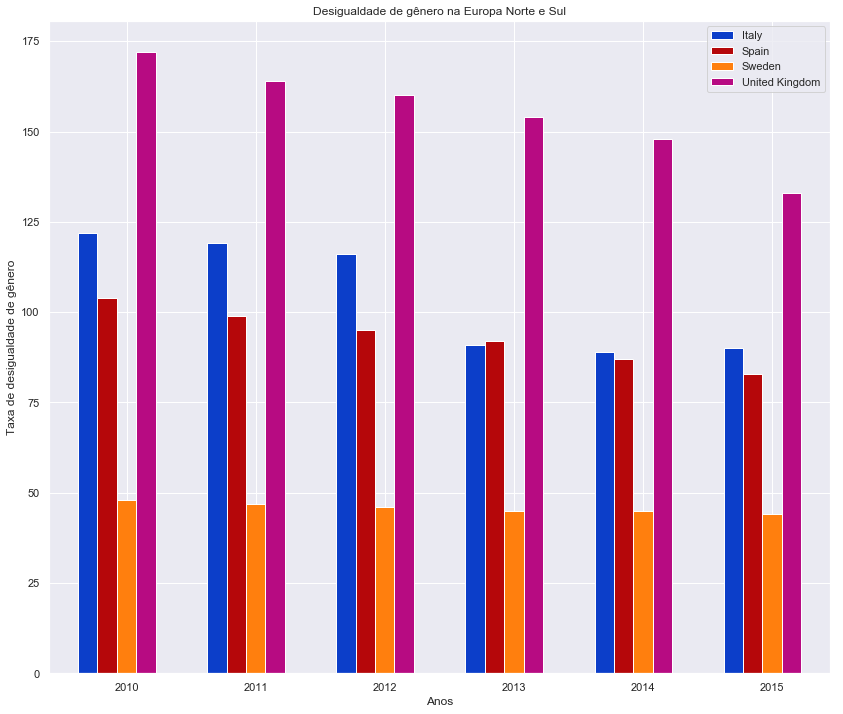

In [143]:
generate_chart_gender_inequality(geurons,"Taxa de desigualdade de gênero","Anos","Desigualdade de gênero na Europa Norte e Sul", europe_ns_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



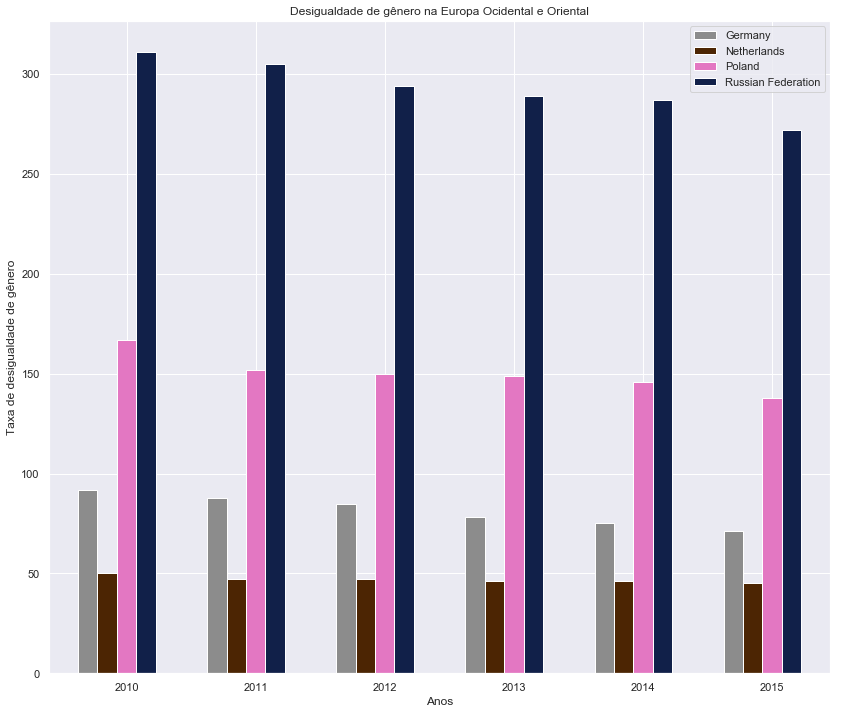

In [144]:
generate_chart_gender_inequality(geurowe,"Taxa de desigualdade de gênero","Anos","Desigualdade de gênero na Europa Ocidental e Oriental", europe_we_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



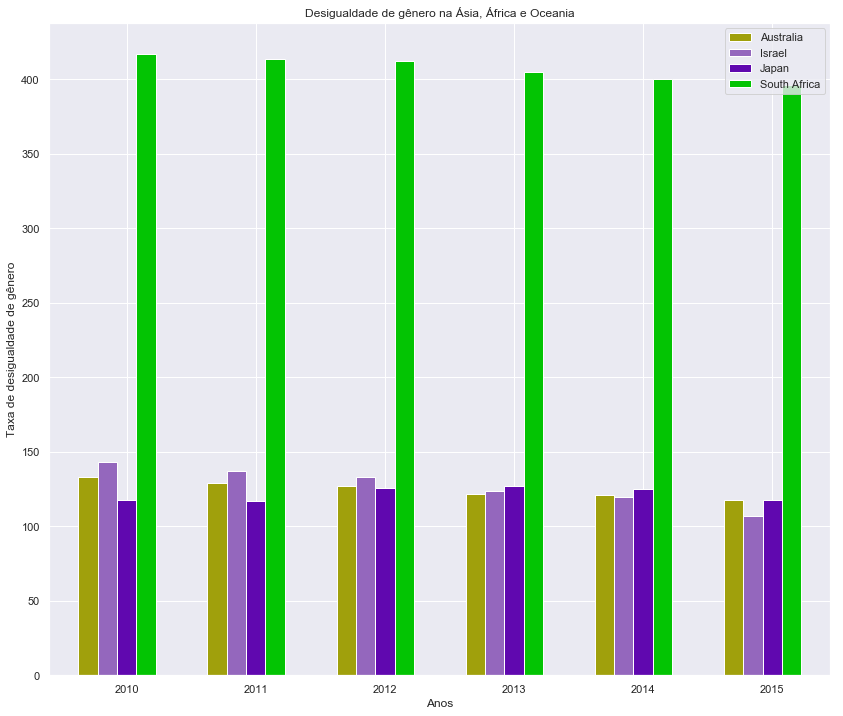

In [145]:
generate_chart_gender_inequality(gaao,"Taxa de desigualdade de gênero","Anos","Desigualdade de gênero na Ásia, África e Oceania", aao_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



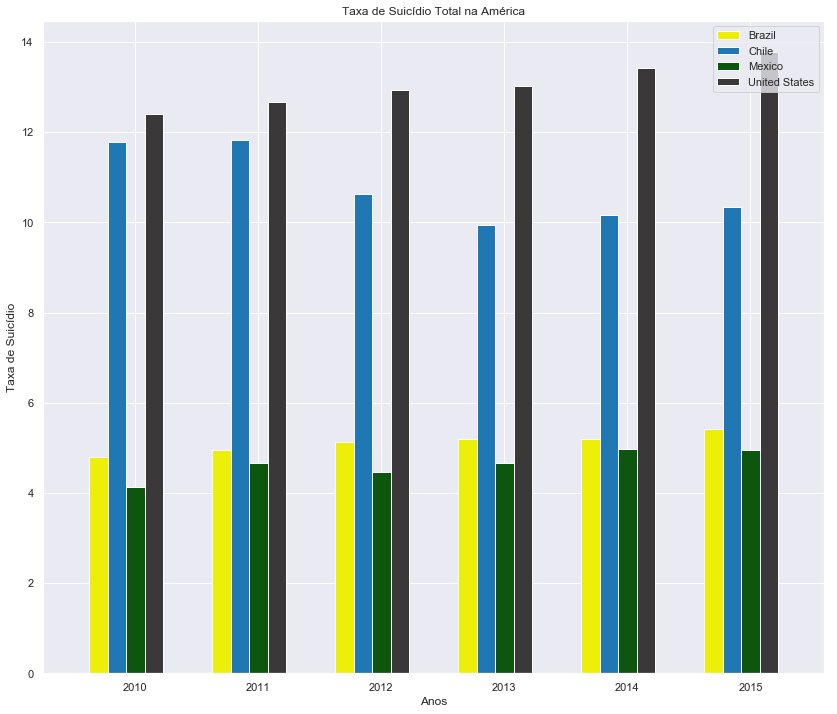

In [146]:
generate_chart_suicide_total(gamerica, "Taxa de Suicídio", "Anos", "Taxa de Suicídio Total na América",america_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



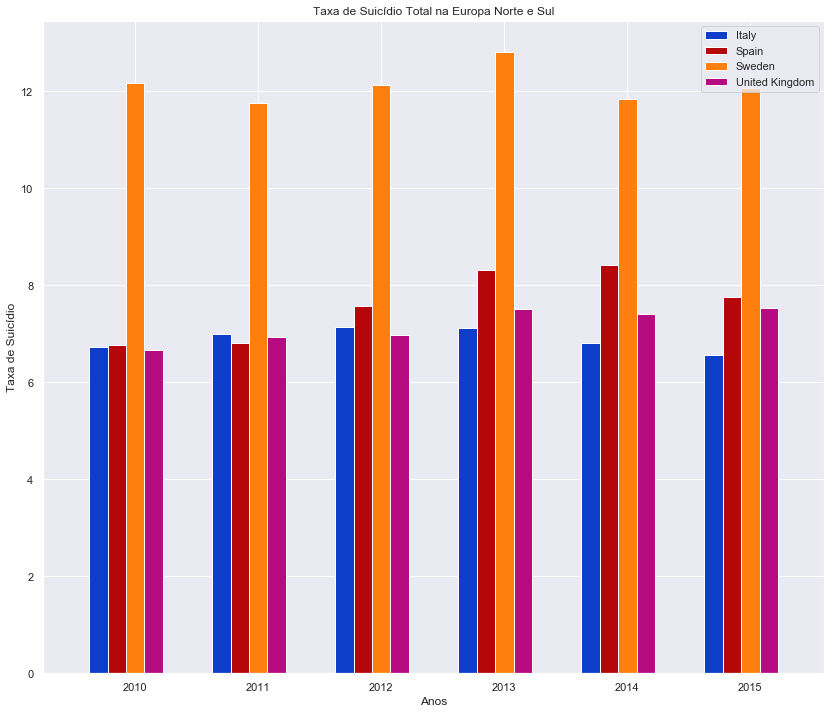

In [147]:
generate_chart_suicide_total(geurons, "Taxa de Suicídio", "Anos", "Taxa de Suicídio Total na Europa Norte e Sul",europe_ns_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



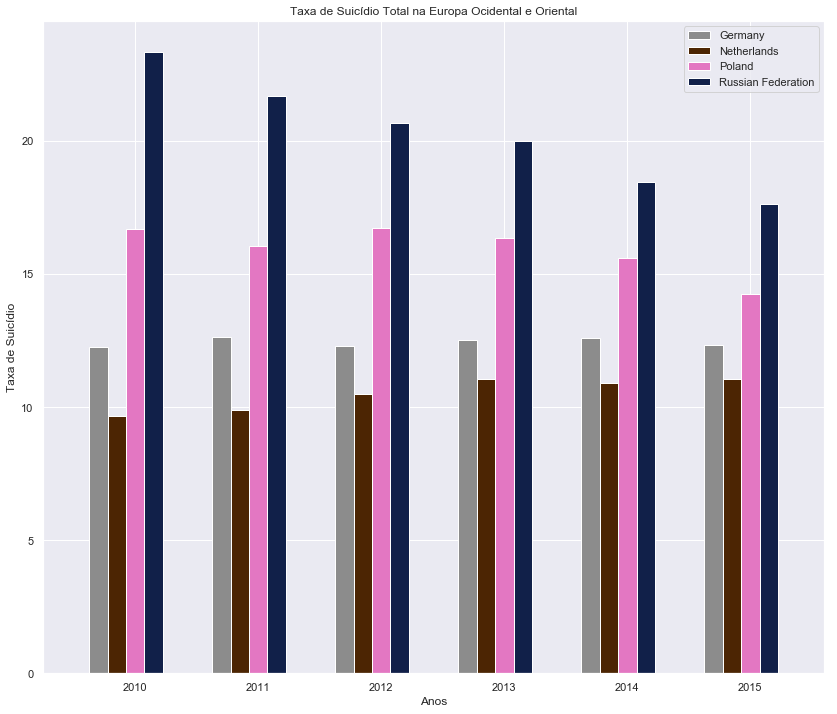

In [148]:
generate_chart_suicide_total(geurowe, "Taxa de Suicídio", "Anos", "Taxa de Suicídio Total na Europa Ocidental e Oriental",europe_we_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



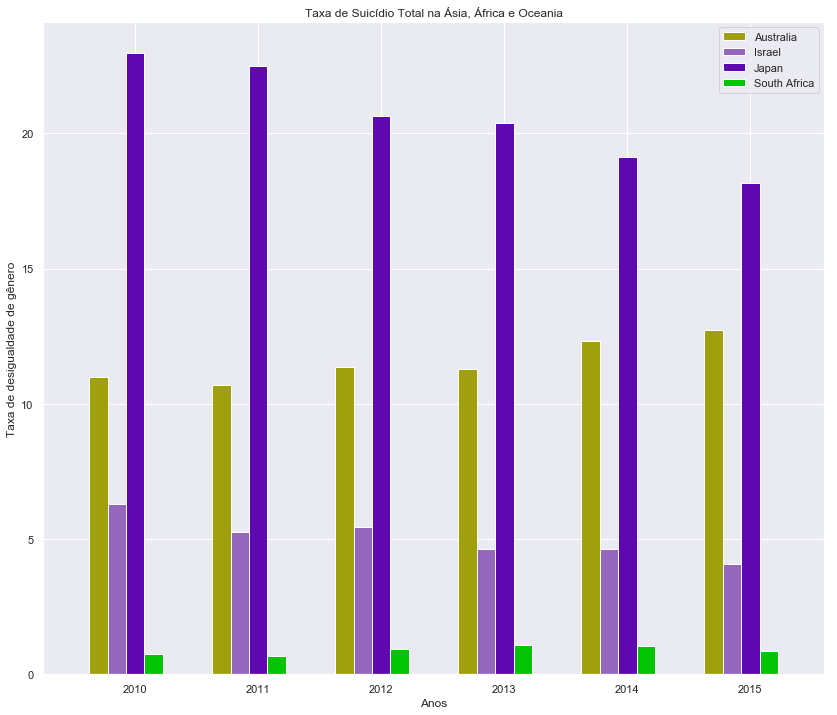

In [149]:
generate_chart_suicide_total(gaao,"Taxa de desigualdade de gênero","Anos","Taxa de Suicídio Total na Ásia, África e Oceania", aao_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



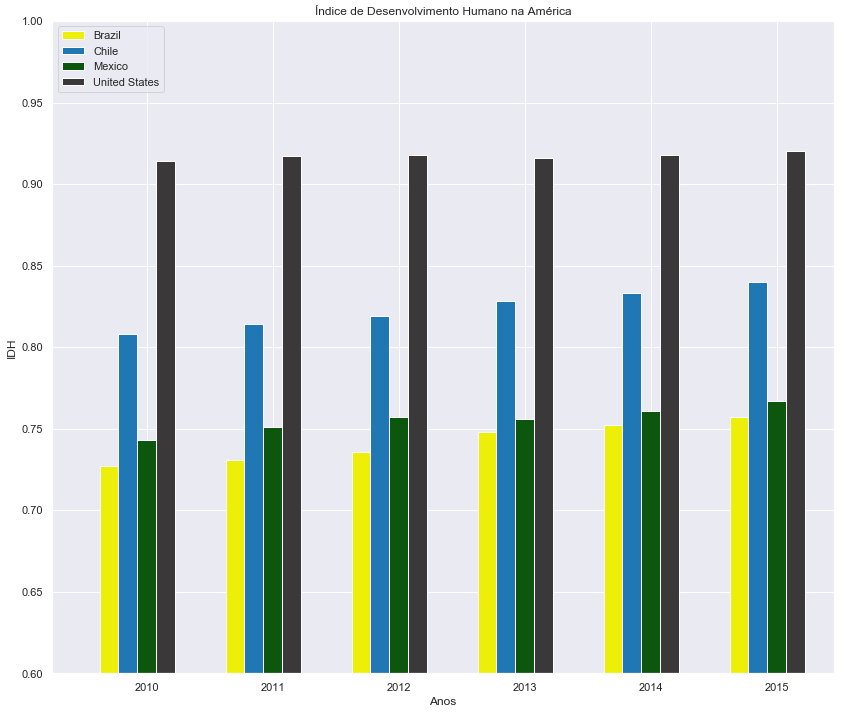

In [150]:
generate_chart_hdi_total(gamerica, "IDH", "Anos", "Índice de Desenvolvimento Humano na América",america_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



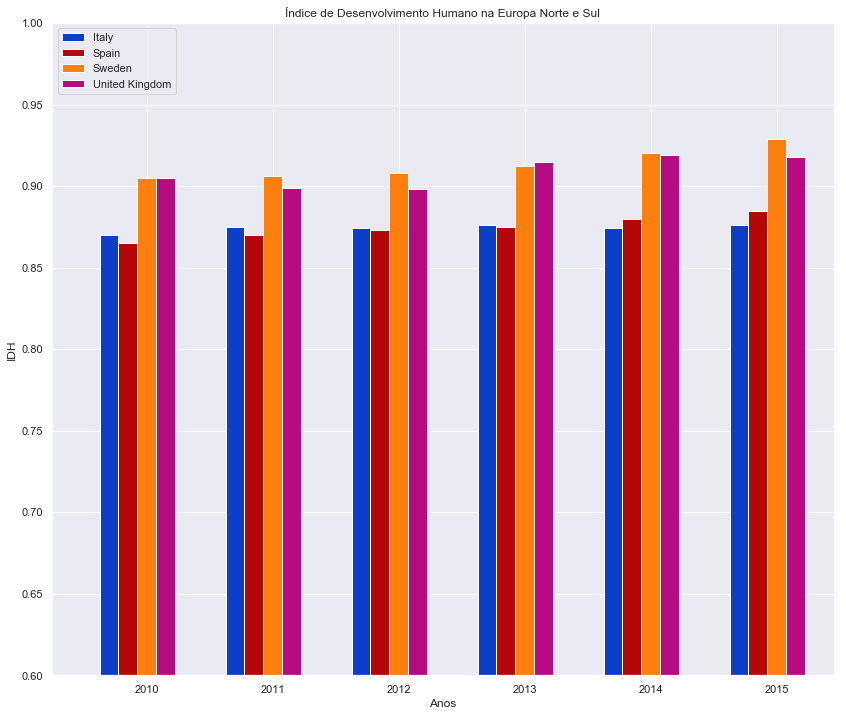

In [151]:
generate_chart_hdi_total(geurons, "IDH", "Anos", "Índice de Desenvolvimento Humano na Europa Norte e Sul",europe_ns_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



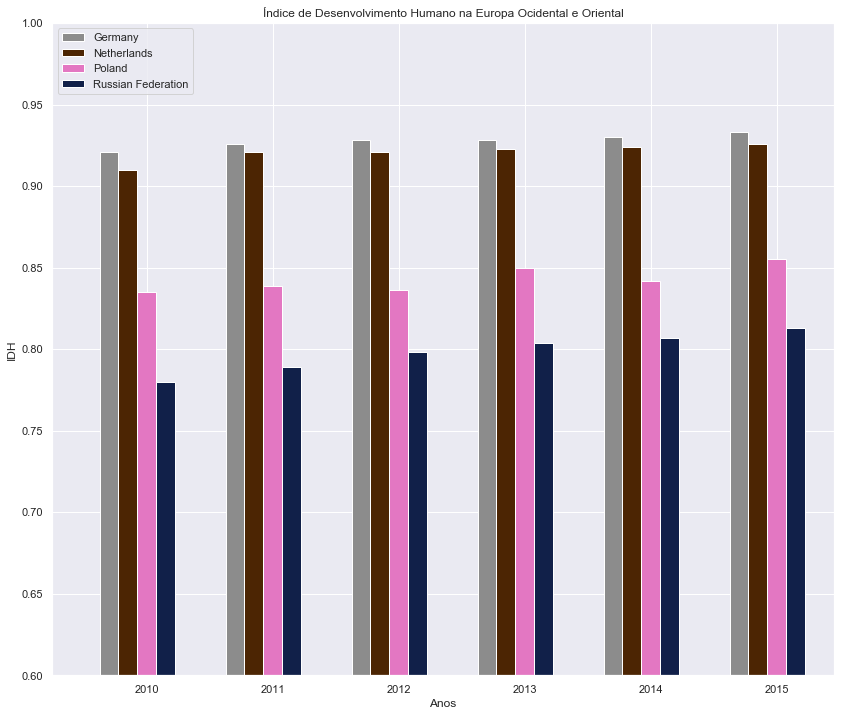

In [152]:
generate_chart_hdi_total(geurowe, "IDH", "Anos", "Índice de Desenvolvimento Humano na Europa Ocidental e Oriental",europe_we_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



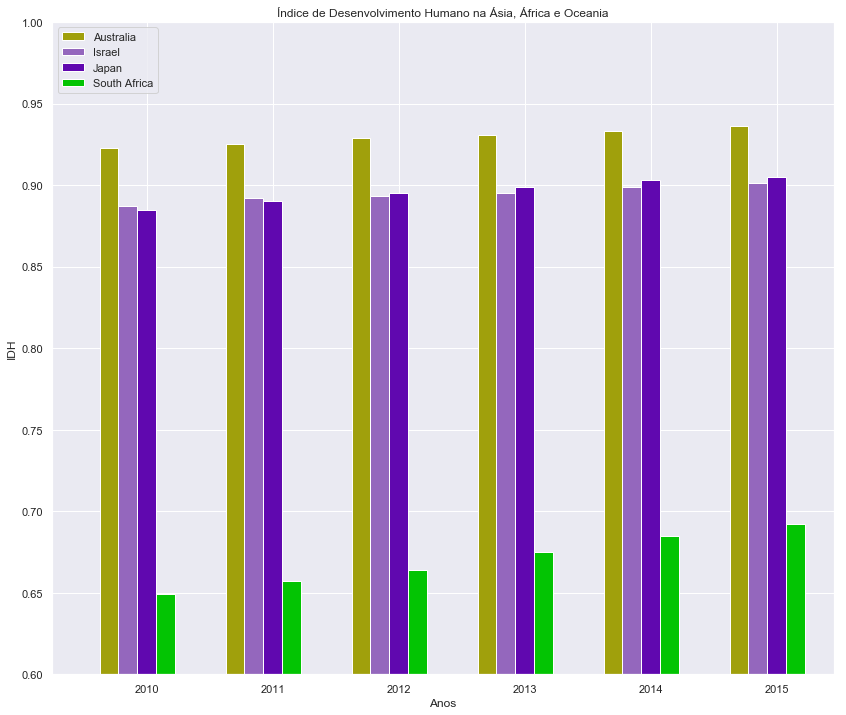

In [153]:
generate_chart_hdi_total(gaao,"IDH","Anos","Índice de Desenvolvimento Humano na Ásia, África e Oceania", aao_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



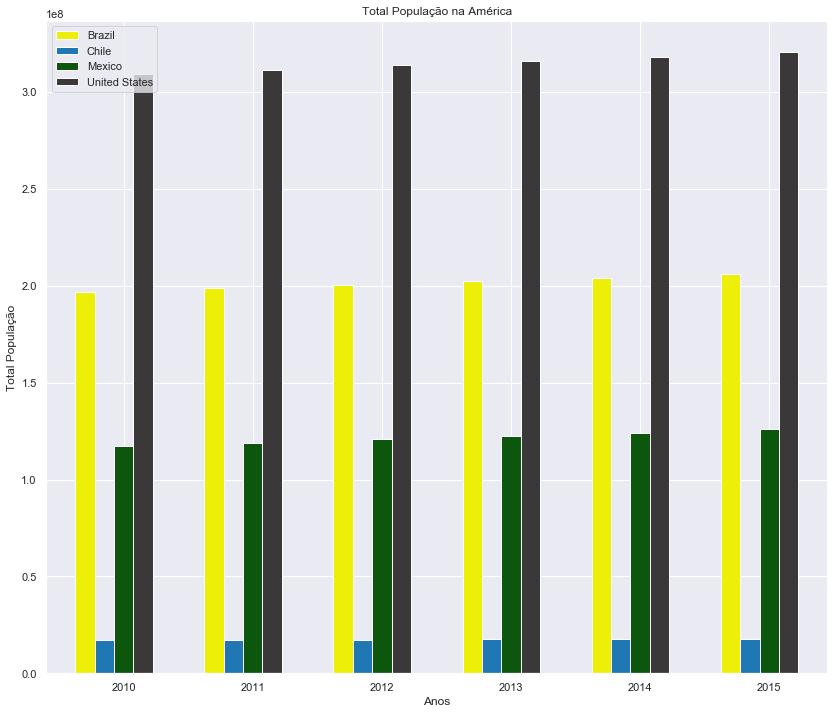

In [154]:
generate_chart_total_pop(gamerica, "Total População", "Anos", "Total População na América",america_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



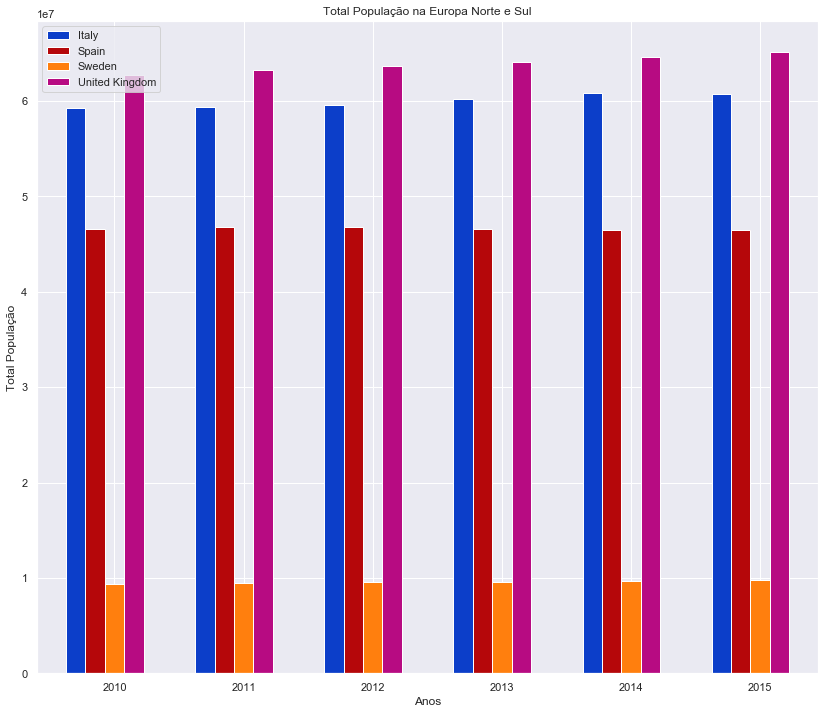

In [155]:
generate_chart_total_pop(geurons, "Total População", "Anos", "Total População na Europa Norte e Sul",europe_ns_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



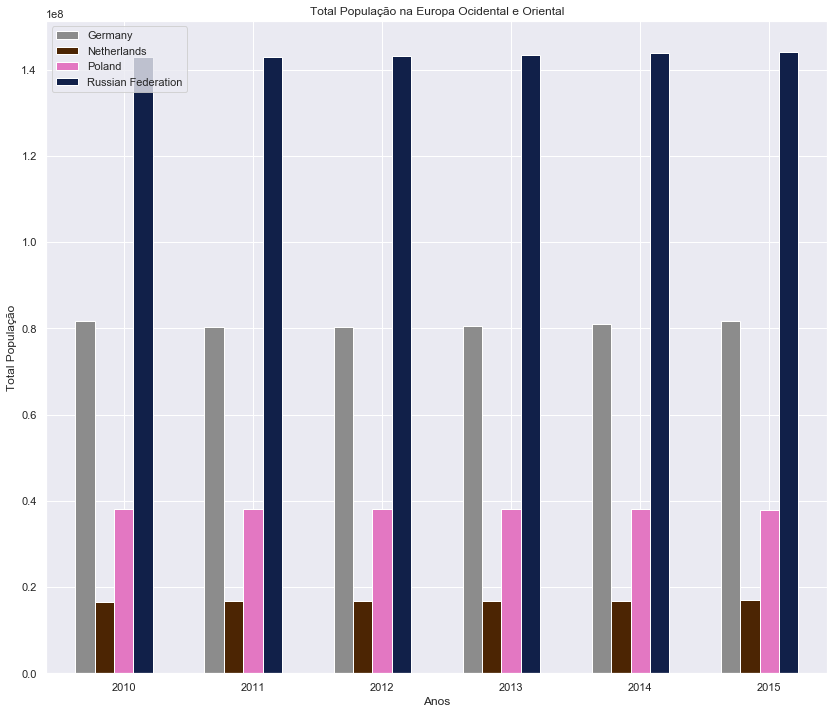

In [156]:
generate_chart_total_pop(geurowe, "Total População", "Anos", "Total População na Europa Ocidental e Oriental",europe_we_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



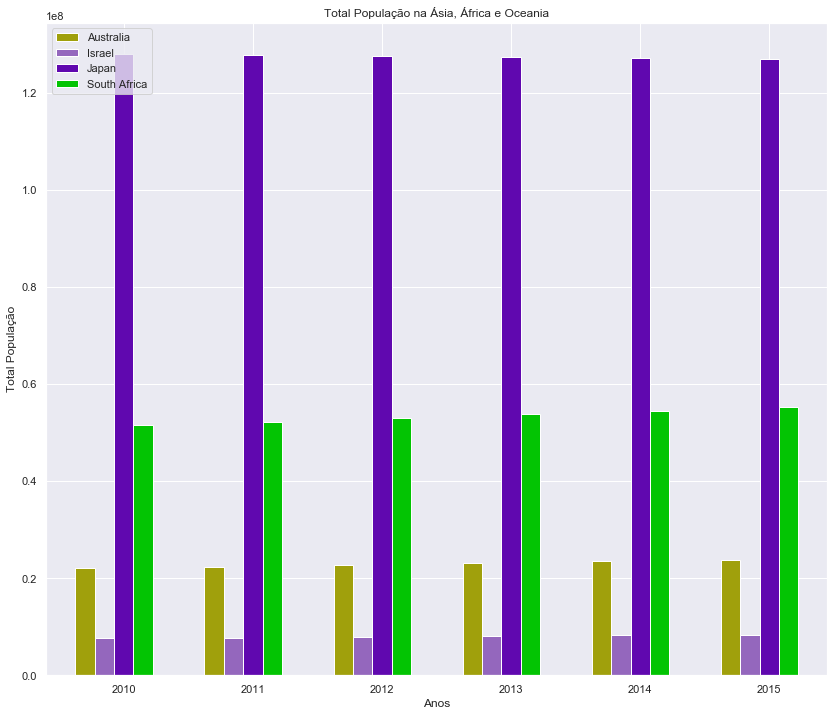

In [157]:
generate_chart_total_pop(gaao,"Total População","Anos","Total População na Ásia, África e Oceania", aao_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



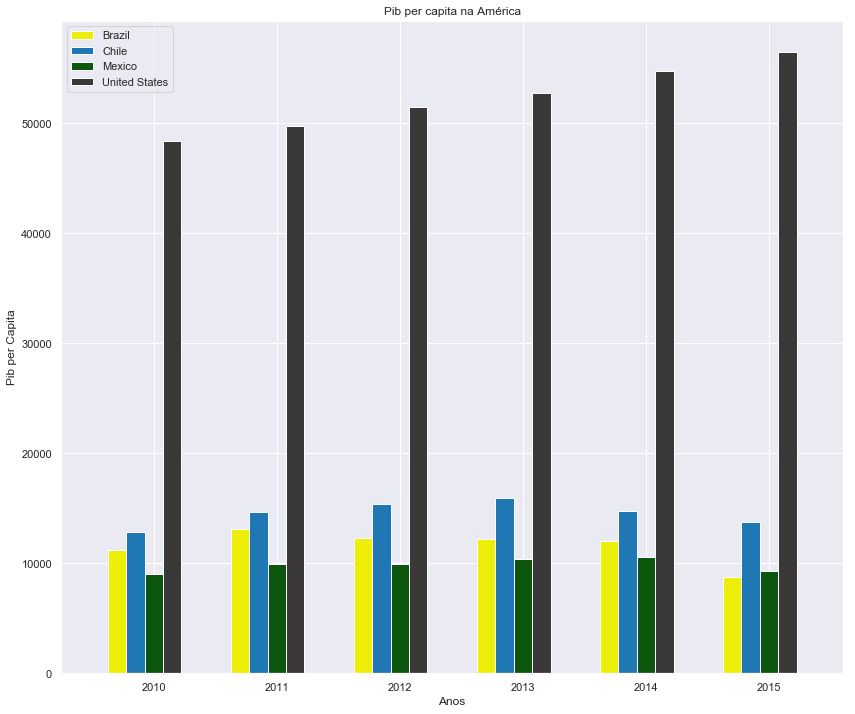

In [158]:
generate_chart_gdp_pc(gamerica, "Pib per Capita", "Anos", "Pib per capita na América",america_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



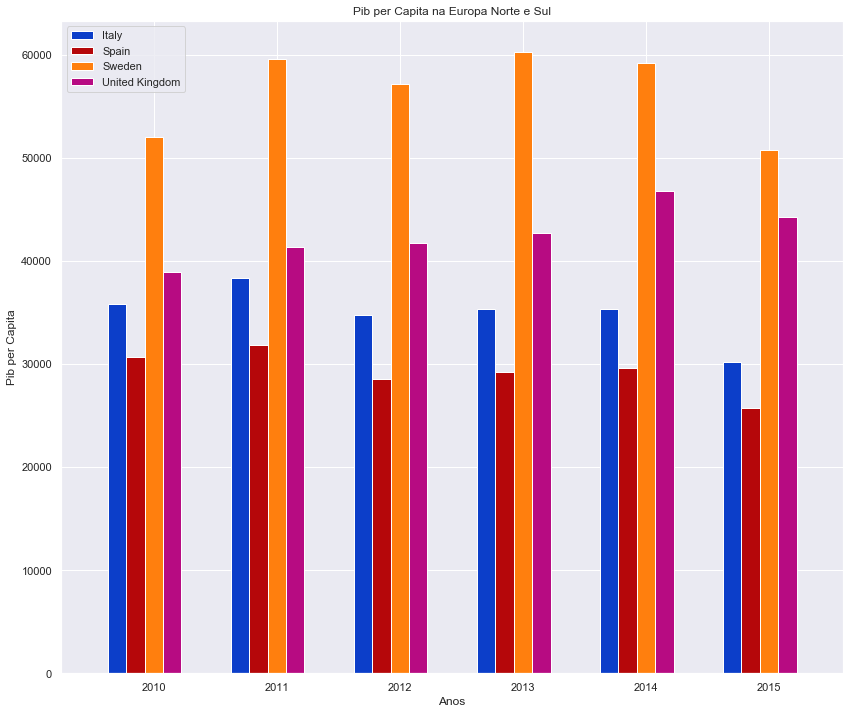

In [159]:
generate_chart_gdp_pc(geurons, "Pib per Capita", "Anos", "Pib per Capita na Europa Norte e Sul",europe_ns_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



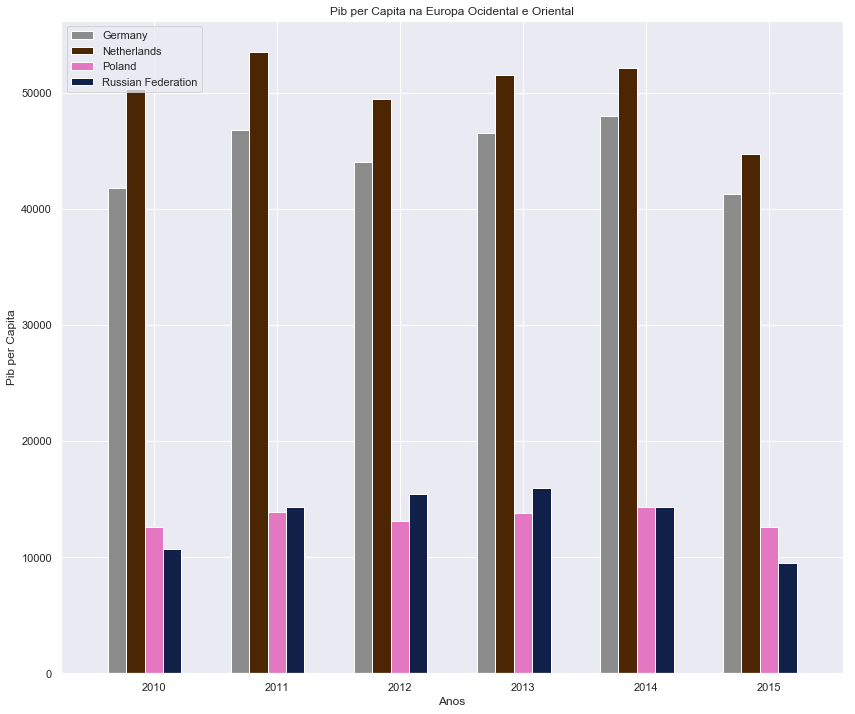

In [160]:
generate_chart_gdp_pc(geurowe, "Pib per Capita", "Anos", "Pib per Capita na Europa Ocidental e Oriental",europe_we_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



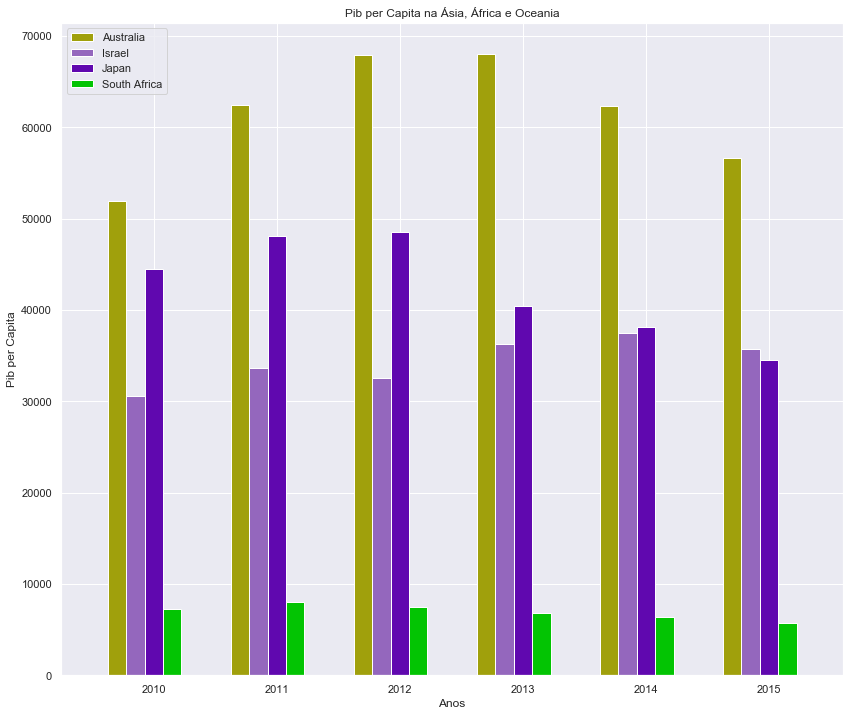

In [161]:
generate_chart_gdp_pc(gaao,"Pib per Capita","Anos","Pib per Capita na Ásia, África e Oceania", aao_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



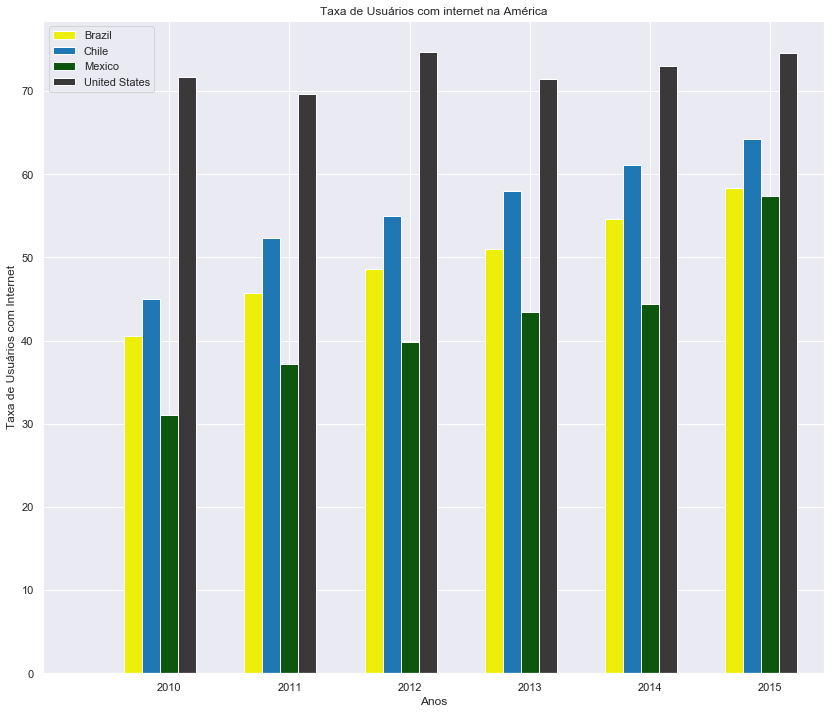

In [162]:
generate_chart_users_internet(gamerica, "Taxa de Usuários com Internet", "Anos", "Taxa de Usuários com internet na América", america_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



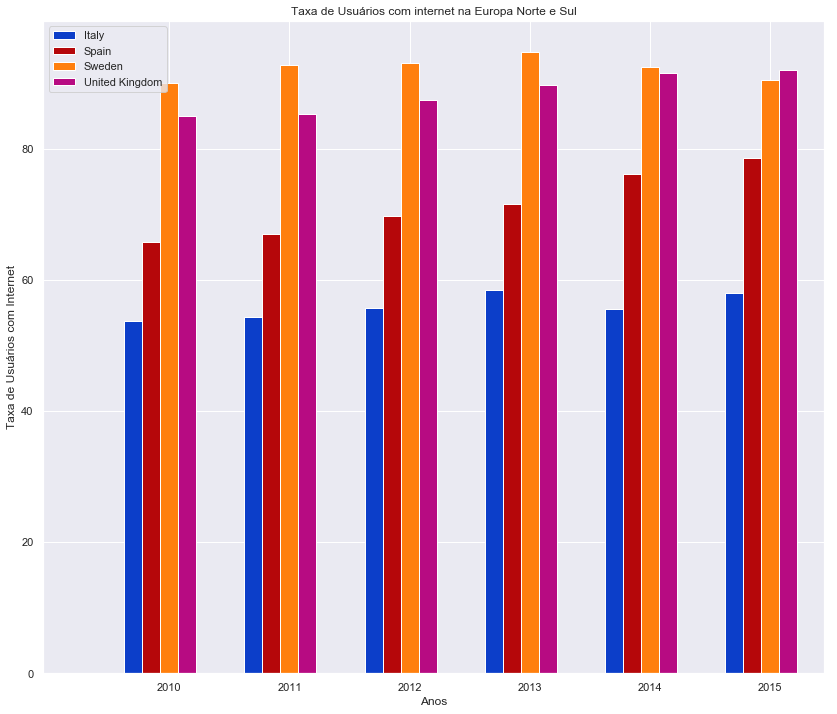

In [163]:
generate_chart_users_internet(geurons, "Taxa de Usuários com Internet", "Anos", "Taxa de Usuários com internet na Europa Norte e Sul", europe_ns_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



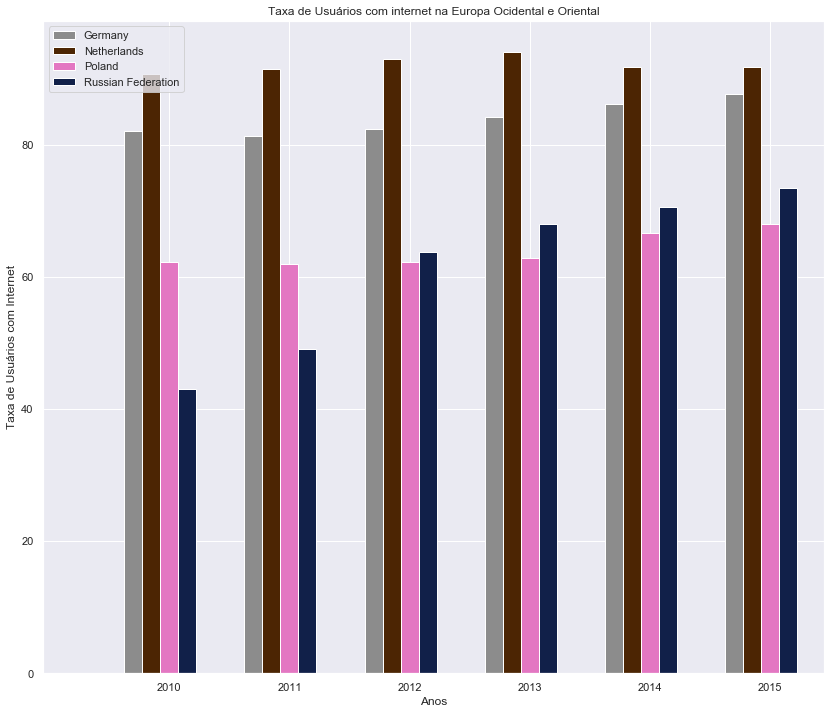

In [164]:
generate_chart_users_internet(geurowe, "Taxa de Usuários com Internet", "Anos", "Taxa de Usuários com internet na Europa Ocidental e Oriental", europe_we_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



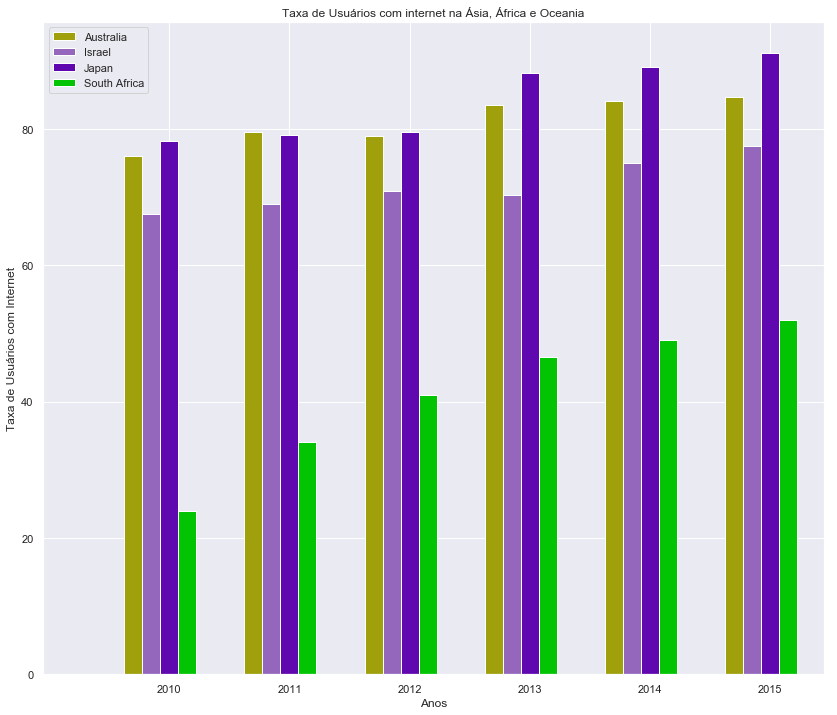

In [165]:
generate_chart_users_internet(gaao, "Taxa de Usuários com Internet", "Anos", "Taxa de Usuários com internet na Ásia, África e Oceania", aao_colors)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



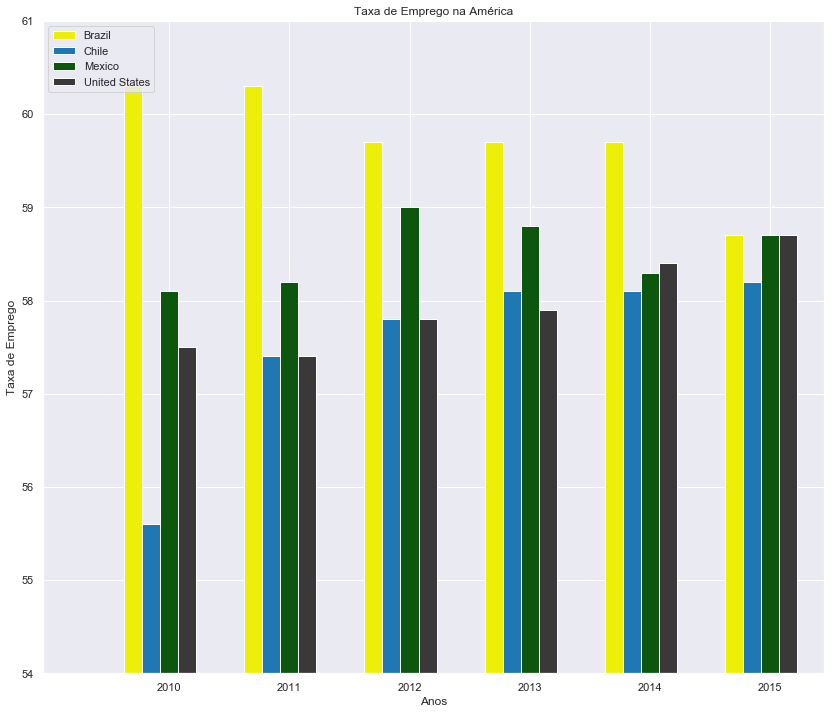

In [166]:
generate_chart_employment(gamerica, "Taxa de Emprego", "Anos", "Taxa de Emprego na América",america_colors,54,61)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



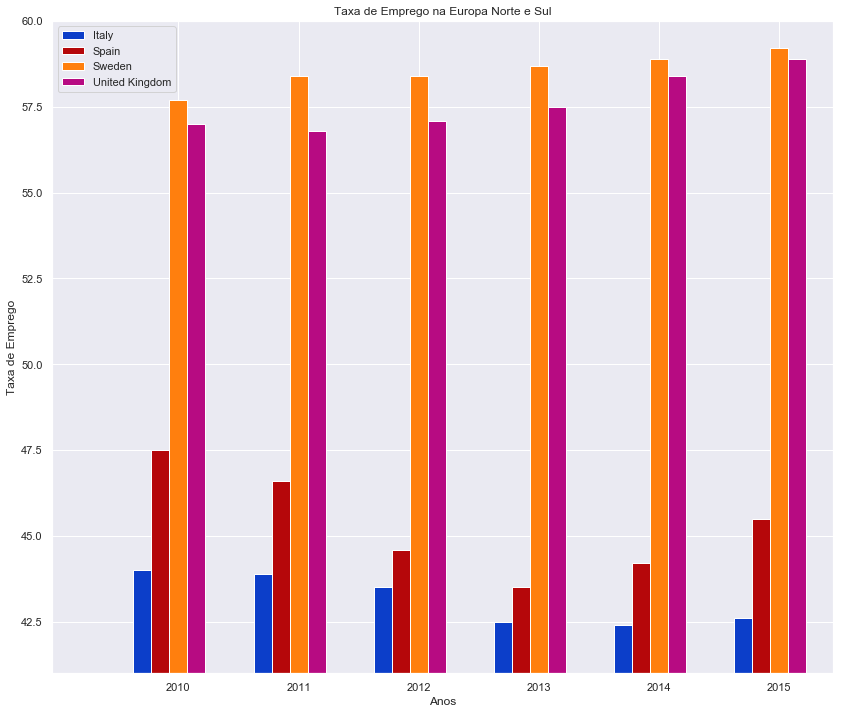

In [167]:
generate_chart_employment(geurons, "Taxa de Emprego", "Anos", "Taxa de Emprego na Europa Norte e Sul",europe_ns_colors,41,60)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



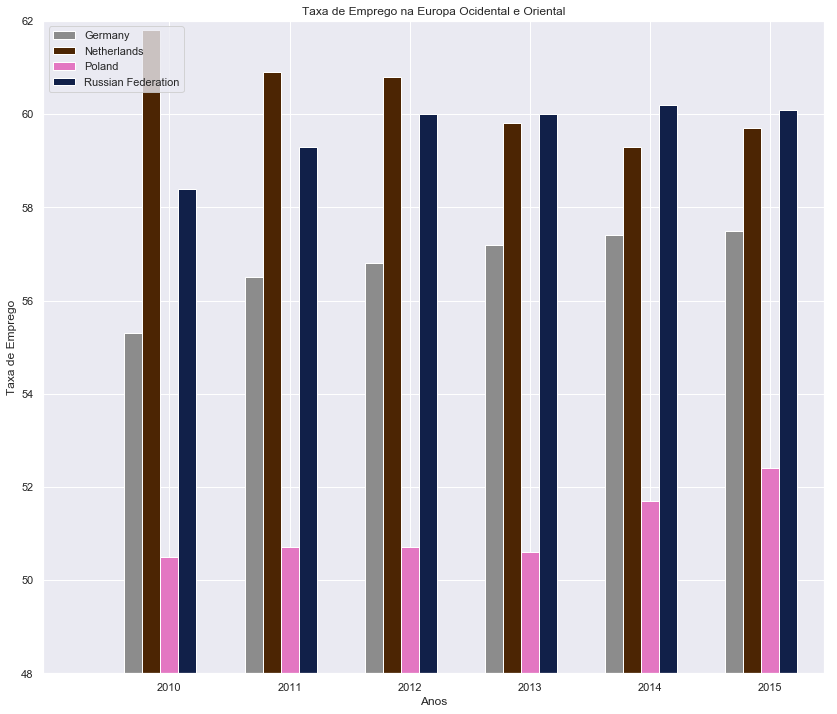

In [168]:
generate_chart_employment(geurowe, "Taxa de Emprego", "Anos", "Taxa de Emprego na Europa Ocidental e Oriental",europe_we_colors,48,62)

C:\Users\Eliana-DEV\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



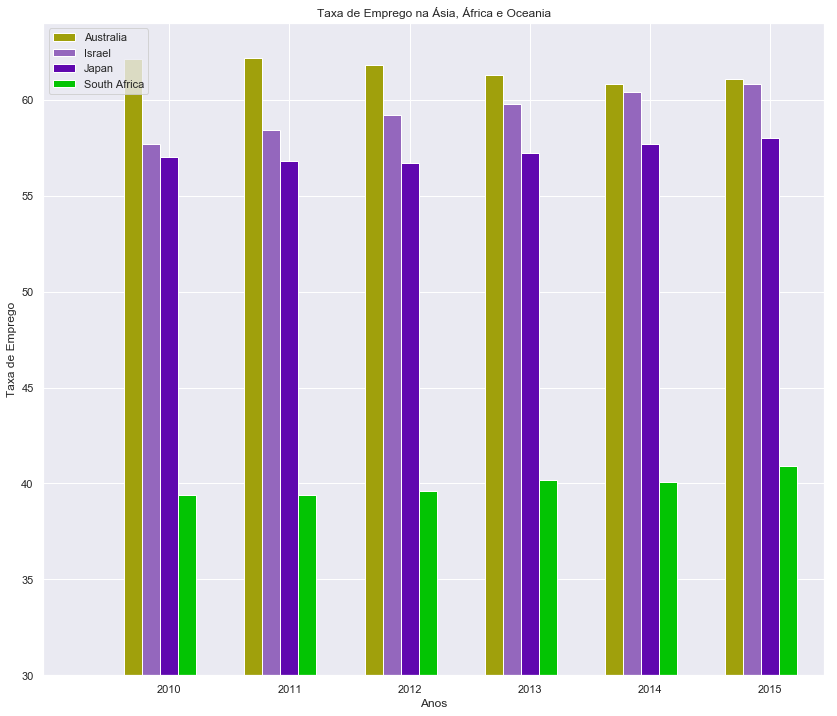

In [169]:
generate_chart_employment(gaao, "Taxa de Emprego", "Anos", "Taxa de Emprego na Ásia, África e Oceania",aao_colors,30,64)

In [170]:
def generate_growth_pop_age_lin(df, col_y, col_f, col_m, x_limit, x_label, y_label, legend, title):
    plt.plot(df[col_y],df[col_f], color='red' )
    plt.plot (df[col_y],df[col_m], color='green' )
    plt.xlim(x_limit)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(legend)
    plt.title(title)
    plt.show()

